In [666]:
#TODO:GoSliming?
import subprocess
import pandas as pd
import mygene
import pickle
import gseapy
from collections import defaultdict
from time import sleep
from IPython.display import display
from tqdm import tqdm
import pandas as pd, seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

In [8]:
id_name_mapping = pd.read_csv("~/fantom6/F6_CAT.gene.info.tsv", sep="\t")[['geneID', 'geneName']]

In [9]:
id_name_mapping = {i: name for i, name in zip(id_name_mapping['geneID'], id_name_mapping['geneName'])}

In [13]:
def id_2_name(ids):
    return [id_name_mapping[i] for i in ids]

In [415]:
targets = [("H3K27ac", "_narrow"), ("H3K36me3", ""), 
           ("H3K4me1", "_narrow"), ("H3K4me2", "_narrow"), ("H3K4me3", "_narrow"), ("H3K79me2", ""), 
           ("H3K9ac", "_narrow"), ("H3K9me3", ""), ("H4K20me1", ""), ("H3K27me3", ""), ("Methylation", "")]

In [35]:
names = gseapy.get_library_name() # default: Human

In [60]:
def merge_methylation_gene_association_files():
    res = {}
    for i in range(0, 19):
        with open("../all_marks/methylation/our_fantom_fantom_aso_genes_association_" + str(i) + ".pickle", 'rb') as f:
            our_fantom_genes = pickle.load(f)
            res.update(our_fantom_genes)

    with open("../all_marks/methylation/our_fantom_fantom_aso_genes_association.pickle", 'wb') as f:
        pickle.dump(res, f) 

In [61]:
merge_methylation_gene_association_files()

In [403]:
all_lncRNAs_names = {}
for target in targets:
    print(target[0])
    # our_fantom_fantom_aso_genes_association_pvalues.tsv
    p_values = pd.read_csv("../all_marks/" + target[0] + "/" + "our_fantom_fantom_aso_genes_association_pvalues" + ".tsv", sep = "\t") 
    all_lncRNAs_names.update({i: j for i, j in zip(list(p_values['lncRNAId']), list(p_values['lncRNAName']))})

H3K27ac
H3K36me3
H3K4me1
H3K4me2
H3K4me3
H3K79me2
H3K9ac
H3K9me3
H4K20me1
H3K27me3
methylation


In [318]:
with open("../all_marks/" + "H3K4me2" + "/" + "our_fantom_fantom_aso_genes_association" + ".pickle", 'rb') as f:
    our_fantom_genes = pickle.load(f)

In [320]:
[k for k in our_fantom_genes.keys() if 'ENSG00000253352' in k]

['ENSG00000253352_ASO_G0253352_AD_07',
 'ENSG00000253352_ASO_G0253352_02',
 'ENSG00000253352_ASO_G0253352_AD_08',
 'ENSG00000253352_ASO_G0253352_01']

In [321]:
pd.read_csv("../all_marks/" + "H3K4me2" + "/our_fantom" + "_fantom_aso" + "_genes_association.tsv", sep="\t", index_col=None)

lncRNAId     lncRNAName    our  our_p  our_m  \
0      ENSG00000245937_ASO_G0245937_01   CTC-228N24.3   1452    413   1057   
1   ENSG00000260032_ASO_G0260032_AD_01      LINC00657   4374   1681   3005   
2      ENSG00000234546_ASO_G0234546_07   RP3-510D11.2   1537     58   1484   
3   ENSG00000256268_ASO_G0256268_AD_03  RP11-221N13.3   4399   2801   1905   
4   ENSG00000269834_ASO_G0269834_AD_06  CTD-3018O17.3   2762    988   1806   
5   ENSG00000244625_ASO_G0244625_AD_09    CTA-211A9.5     77     11     67   
6      ENSG00000212978_ASO_G0212978_01     AC016747.3   6694   2550   5006   
7      ENSG00000240875_ASO_G0240875_10      LINC00886   8990   4452   6065   
8   ENSG00000253352_ASO_G0253352_AD_07           TUG1    837    206    635   
9      ENSG00000226950_ASO_G0226950_04          DANCR     85     20     65   
10     ENSG00000269834_ASO_G0269834_02  CTD-3018O17.3   2762    988   1806   
11  ENSG00000227036_ASO_G0227036_AD_07      LINC00511   3964   1412   2772   
12  ENSG00000256268_ASO_G0256268_AD_07  RP11-221N13.3   4399   2801   1905   
13     ENSG00000234546_ASO_G0234546_02   RP3-510D11.2   1537     58   1484   
14  ENSG00000245937_ASO_G0245937_AD_05   CTC-228N24.3   1452    413   1057   
15      ENSG00000253161_ASO_C013368_01  RP11-150O12.1   4987   3022   2329   
16  ENSG00000246067_ASO_G0246067_AD_09      RAB30-AS1   3561   2762    855   
17  ENSG00000225733_ASO_G0225733_AD_03       FGD5-AS1   4918   2229   3099   
18     ENSG00000233117_ASO_G0233117_02      LINC00702  10576   5970   6822   
19  ENSG00000256268_ASO_G0256268_AD_06  RP11-221N13.3   4399   2801   1905   
20     ENSG00000223478_ASO_G0223478_03  RP11-545E17.3   6083   1883   4533   
21     ENSG00000225791_ASO_G0225791_05      TRAM2-AS1   1556    644    935   
22     ENSG00000203721_ASO_G0203721_02      LINC00862      2      2      0   
23  ENSG00000250786_ASO_G0250786_AD_10         SNHG18   5176   2904   2622   
24     ENSG00000227053_ASO_G0227053_03   RP11-395B7.4     74      8     66   
25     ENSG00000212978_ASO_G0212978_02     AC016747.3   6694   2550   5006   
26      ENSG00000253161_ASO_C013368_02  RP11-150O12.1   4987   3022   2329   
27     ENSG00000234456_ASO_G0234456_04      MAGI2-AS3   3300   1883   1542   
28     ENSG00000254682_ASO_G0254682_06  RP11-660L16.2   3131   1089   2147   
29     ENSG00000226950_ASO_G0226950_05          DANCR     85     20     65   
30     ENSG00000240875_ASO_G0240875_02      LINC00886   8990   4452   6065   
31  ENSG00000246067_ASO_G0246067_AD_04      RAB30-AS1   3561   2762    855   
32     ENSG00000233117_ASO_G0233117_04      LINC00702  10576   5970   6822   
33  ENSG00000225733_ASO_G0225733_AD_06       FGD5-AS1   4918   2229   3099   
34  ENSG00000269834_ASO_G0269834_AD_02  CTD-3018O17.3   2762    988   1806   
35     ENSG00000270069_ASO_G0270069_05     RP6-99M1.2   5584   3339   2633   
36  ENSG00000260032_ASO_G0260032_AD_06      LINC00657   4374   1681   3005   
37     ENSG00000240875_ASO_G0240875_04      LINC00886   8990   4452   6065   
38     ENSG00000237187_ASO_G0237187_03      NR2F1-AS1  11056   6223   7285   
39  ENSG00000230630_ASO_G0230630_AD_04         DNM3OS   3701   2163   1701   
40     ENSG00000227036_ASO_G0227036_04      LINC00511   3964   1412   2772   
41  ENSG00000237187_ASO_G0237187_AD_08      NR2F1-AS1  11056   6223   7285   
42     ENSG00000234456_ASO_G0234456_01      MAGI2-AS3   3300   1883   1542   
43     ENSG00000225439_ASO_G0225439_06      BOLA3-AS1    200     78    122   
44  ENSG00000246067_ASO_G0246067_AD_06      RAB30-AS1   3561   2762    855   
45     ENSG00000215039_ASO_G0215039_01       CD27-AS1      5      1      4   
46     ENSG00000225733_ASO_G0225733_03       FGD5-AS1   4918   2229   3099   
47  ENSG00000251580_ASO_G0251580_AD_05  RP11-539L10.3     38      2     36   
48     ENSG00000246067_ASO_G0246067_05      RAB30-AS1   3561   2762    855   
49     ENSG00000204054_ASO_G0204054_06      LINC00963   1678    742    967   
50     ENSG00000231312_ASO_G0231312_02     AC007246.

In [17]:
def get_counts_for_EA(pvalues_file_name, gene_association_name):
    groups = ['mm', 'mp', 'pm', 'pp']
    gene_lists_for_EA = defaultdict(dict)
    for target in targets:
        print(target[0])
        # our_fantom_fantom_aso_genes_association_pvalues.tsv
        p_values = pd.read_csv("../all_marks/" + target[0] + "/" + pvalues_file_name + ".tsv", sep = "\t") 
        lncRNAs = list(p_values['lncRNAId'].unique())

        with open("../all_marks/" + target[0] + "/" + gene_association_name + ".pickle", 'rb') as f:
            our_fantom_genes = pickle.load(f)

        for l in lncRNAs:
            for group in groups:
                if p_values[(p_values['lncRNAId'] == l)&(p_values[group + "_pvalue"] < 0.05)].shape[0] > 0:
                    if "mm" in group:
                        genes = set(our_fantom_genes[l]['fantom_minus']).intersection(set(our_fantom_genes[l]['our_minus']))
                        gene_lists_for_EA[l][target[0] + "_mm"] = id_2_name(genes)
                    if "mp" in group:
                        genes = set(our_fantom_genes[l]['fantom_plus']).intersection(set(our_fantom_genes[l]['our_minus']))
                        gene_lists_for_EA[l][target[0] + "_mp"] = id_2_name(genes)
                    if "pm" in group:
                        genes = set(our_fantom_genes[l]['fantom_minus']).intersection(set(our_fantom_genes[l]['our_plus']))
                        gene_lists_for_EA[l][target[0] + "_pm"] = id_2_name(genes)
                    if "pp" in group:
                        genes = set(our_fantom_genes[l]['fantom_plus']).intersection(set(our_fantom_genes[l]['our_plus']))
                        gene_lists_for_EA[l][target[0] + "_pp"] = id_2_name(genes)
                        
    return gene_lists_for_EA

In [18]:
gene_lists_for_EA = get_counts_for_EA("our_fantom_fantom_aso_genes_association_pvalues", 
                                      "our_fantom_fantom_aso_genes_association")

H3K27ac
H3K36me3
H3K4me1
H3K4me2
H3K4me3
H3K79me2
H3K9ac
H3K9me3
H4K20me1
H3K27me3
methylation


In [26]:
def GO_enrichment(counts, output_file_name):
    go_biological_process = defaultdict(dict)
    for lncRNA, typed_genes in tqdm(counts.items()):
        for t, genes in typed_genes.items():
            print(lncRNA + "_" + t)
            #mg = mygene.MyGeneInfo()
            #out = mg.querymany(genes, scopes='ensembl.gene', fields="entrezgene,symbol", species='human', 
            #                       returnall=True, as_dataframe=True)
            #with_symbol = out['out']
            #del with_symbol.index.name
            #with_symbol['ensembl_id'] = with_symbol.index
            #if 'entrezgene' in with_symbol.columns:
            #    with_symbol = with_symbol.reset_index()[['ensembl_id', 'entrezgene', 'symbol']]
            #    with_symbol = with_symbol[with_symbol['entrezgene'].notnull()]
            try:
                r = gseapy.enrichr(gene_list=genes, gene_sets='GO_Biological_Process_2018, \
                                    GO_Cellular_Component_2018, GO_Molecular_Function_2018', outdir='test')
                r = r.results.sort_values(['Adjusted P-value'])
                if r[r['Adjusted P-value'] < 0.05].shape[0] > 0:
                    go_biological_process[lncRNA][t] = r[r['Adjusted P-value'] < 0.05]
                sleep(5)
            except ConnectionRefusedError:
                print(lncRNA + "_" + t + " REFUSED!!!,sleep 10 secs")
                sleep(100)
            #else:
            #    print(lncRNA + "_" + t + " NO entrezgene!")
    
    with open(output_file_name, 'wb') as f:
        pickle.dump(go_biological_process, f) 
    
    return go_biological_process

In [27]:
GO_enrichment(gene_lists_for_EA, "../all_marks/GO/fantom_aso_go_all_lncRNAs.pickle")


  0%|          | 0/82 [00:00<?, ?it/s]

ENSG00000268895_ASO_G0268895_01_H3K27ac_mm


2020-04-14 08:10:26,683 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:10:33,141 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_01_H3K27ac_pm
ENSG00000268895_ASO_G0268895_01_H3K36me3_pm


2020-04-14 08:10:56,517 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:11:01,927 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_01_H3K4me1_pm


2020-04-14 08:11:09,975 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:11:12,600 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:11:15,232 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

  1%|          | 1/82 [00:57<1:17:52, 57.69s/it]

ENSG00000271270_ASO_G0271270_09_H3K27ac_pm


2020-04-14 08:11:23,424 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:11:26,215 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:11:28,846 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000271270_ASO_G0271270_09_H3K4me1_mm


2020-04-14 08:11:37,018 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:11:39,656 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:11:42,291 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000271270_ASO_G0271270_09_methylation_mm


2020-04-14 08:12:06,511 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05
2020-04-14 08:14:03,415 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:14:06,060 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:14:08,765 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_AD_05_H3K4me1_pm


2020-04-14 08:14:17,006 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:14:19,624 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:14:22,267 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_AD_05_H3K4me3_pm


2020-04-14 08:14:30,492 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:14:33,118 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:14:35,767 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_AD_05_H3K4me3_pp


2020-04-14 08:14:43,872 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:14:46,501 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:14:49,240 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_AD_05_H3K79me2_pm


2020-04-14 08:14:57,437 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:15:00,075 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:15:02,730 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

  5%|▍         | 4/82 [04:45<1:32:01, 70.79s/it]

ENSG00000240875_ASO_G0240875_10_H3K27ac_pp


2020-04-14 08:15:10,783 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:15:13,401 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:15:16,044 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

  6%|▌         | 5/82 [04:58<1:08:42, 53.54s/it]

ENSG00000214548_ASO_G0214548_01_H3K27ac_mm


2020-04-14 08:15:24,931 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:15:30,937 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K27ac_mp
ENSG00000214548_ASO_G0214548_01_H3K27ac_pm


2020-04-14 08:15:56,219 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:15:58,966 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:16:01,811 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K36me3_pm


2020-04-14 08:16:10,022 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:16:12,678 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:16:15,330 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K4me1_pm


2020-04-14 08:16:23,969 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:16:26,715 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:16:29,566 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K4me3_pm


2020-04-14 08:16:37,839 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:16:40,498 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:16:43,149 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K79me2_pm


2020-04-14 08:16:51,516 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:16:54,169 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:16:56,828 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_01_H3K9me3_pm


2020-04-14 08:17:04,894 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:17:07,528 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:17:10,165 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

  7%|▋         | 6/82 [06:52<1:30:50, 71.72s/it]

ENSG00000256268_ASO_G0256268_AD_07_H3K27ac_mm


2020-04-14 08:17:18,594 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:17:21,240 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:17:23,923 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me1_pm


2020-04-14 08:17:32,142 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:17:34,778 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:17:37,437 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me2_pm


2020-04-14 08:17:45,841 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:17:48,522 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:17:51,206 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me2_pp


2020-04-14 08:17:59,662 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:18:02,331 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:18:05,137 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_mm


2020-04-14 08:18:17,201 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:18:20,195 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_mp


2020-04-14 08:18:32,580 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:18:35,689 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_pm


2020-04-14 08:18:47,530 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:18:50,427 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_pp
ENSG00000256268_ASO_G0256268_AD_07_H3K27me3_mm


2020-04-14 08:19:13,876 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:19:16,541 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:19:19,196 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

  9%|▊         | 7/82 [09:01<1:51:08, 88.91s/it]

ENSG00000229647_ASO_G0229647_06_H3K27ac_mm


2020-04-14 08:19:27,431 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:19:30,072 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:19:32,717 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000229647_ASO_G0229647_06_H3K27ac_pm


2020-04-14 08:19:40,961 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:19:43,612 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:19:46,257 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000229647_ASO_G0229647_06_H3K36me3_pm


2020-04-14 08:19:54,379 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:19:57,294 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:19:59,909 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000229647_ASO_G0229647_06_H3K4me1_pm


2020-04-14 08:20:08,156 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:20:10,814 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:20:13,484 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000229647_ASO_G0229647_06_H3K4me3_mm


2020-04-14 08:20:21,913 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:20:24,584 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:20:27,406 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000229647_ASO_G0229647_06_H3K79me2_pm


2020-04-14 08:20:35,587 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:20:38,239 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:20:40,880 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 10%|▉         | 8/82 [10:23<1:46:59, 86.74s/it]

ENSG00000246430_ASO_G0246430_03_H3K27ac_mm
ENSG00000246430_ASO_G0246430_03_H3K4me1_mm


2020-04-14 08:21:04,413 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:21:07,105 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:21:09,718 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246430_ASO_G0246430_03_H3K4me1_pm


2020-04-14 08:21:17,949 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:21:20,627 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:21:23,286 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246430_ASO_G0246430_03_H3K79me2_pm


2020-04-14 08:21:31,471 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:21:34,107 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:21:36,747 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 11%|█         | 9/82 [11:19<1:34:16, 77.48s/it]

ENSG00000229852_ASO_G0229852_05_H3K27ac_pm


2020-04-14 08:21:44,961 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:21:47,599 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:21:50,227 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 12%|█▏        | 10/82 [11:32<1:09:56, 58.28s/it]

ENSG00000225733_ASO_G0225733_AD_03_H3K27ac_mm


2020-04-14 08:21:58,927 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:22:01,667 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:22:04,533 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K27ac_pm


2020-04-14 08:22:18,961 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K4me1_pm


2020-04-14 08:22:27,032 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:22:29,669 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:22:32,323 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K4me2_mm


2020-04-14 08:22:40,966 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:22:43,698 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:22:46,531 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K4me2_pm


2020-04-14 08:22:55,141 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:22:57,846 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K4me3_mm


2020-04-14 08:23:09,683 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:23:15,919 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K4me3_pm


2020-04-14 08:23:27,144 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:23:29,822 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K9ac_mm


2020-04-14 08:23:38,067 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:23:40,822 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:23:43,489 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H3K9ac_pm


2020-04-14 08:23:51,696 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:23:54,335 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:23:56,986 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_03_H4K20me1_pm


2020-04-14 08:24:07,959 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:24:10,599 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 13%|█▎        | 11/82 [13:53<1:38:06, 82.91s/it]

ENSG00000233117_ASO_G0233117_02_H3K27ac_mm
ENSG00000233117_ASO_G0233117_02_H3K27ac_mp


2020-04-14 08:24:34,089 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:24:36,753 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:24:39,410 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K27ac_pm
ENSG00000233117_ASO_G0233117_02_H3K4me1_mm


2020-04-14 08:25:02,392 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:25:08,152 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me1_pm


2020-04-14 08:25:17,068 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:25:23,307 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me1_pp


2020-04-14 08:25:31,993 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:25:34,681 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:25:37,509 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me2_mm


2020-04-14 08:25:46,436 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me2_pm


2020-04-14 08:26:01,977 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me2_pp


2020-04-14 08:26:20,185 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:26:23,064 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K4me3_pm


2020-04-14 08:26:31,475 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:26:34,139 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:26:36,793 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K9ac_mm


2020-04-14 08:26:48,078 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:26:50,794 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K9ac_pm


2020-04-14 08:26:59,189 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:27:01,853 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:27:04,640 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233117_ASO_G0233117_02_H3K9me3_mm


2020-04-14 08:27:12,732 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:27:15,455 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:27:18,066 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 15%|█▍        | 12/82 [17:00<2:13:19, 114.28s/it]

ENSG00000256268_ASO_G0256268_AD_06_H3K27ac_pm


2020-04-14 08:27:26,263 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:27:28,900 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:27:31,548 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_06_H3K4me1_pm


2020-04-14 08:27:39,619 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:27:42,268 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:27:44,901 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_06_H3K4me2_pm


2020-04-14 08:27:53,166 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:27:55,883 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:27:58,496 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_06_H3K4me3_mm


2020-04-14 08:28:06,904 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:28:09,574 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:28:12,371 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_06_H3K4me3_pm


2020-04-14 08:28:20,961 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:28:23,645 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:28:26,323 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_06_H3K27me3_mm


2020-04-14 08:28:34,401 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:28:37,019 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:28:39,654 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 16%|█▌        | 13/82 [18:22<2:00:08, 104.47s/it]

ENSG00000234608_ASO_G0234608_06_H3K27ac_mm


2020-04-14 08:28:47,716 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:28:50,319 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:28:53,002 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K36me3_mm


2020-04-14 08:29:01,083 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:29:03,723 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:29:06,344 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K4me1_mm


2020-04-14 08:29:19,390 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:29:22,743 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K4me1_pm


2020-04-14 08:29:34,738 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K4me3_mm


2020-04-14 08:29:46,493 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:29:49,389 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:29:52,404 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K4me3_pm


2020-04-14 08:30:01,100 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:30:04,025 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K9me3_mm


2020-04-14 08:30:15,557 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:30:18,242 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:30:21,170 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K9me3_pm


2020-04-14 08:30:29,525 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:30:32,212 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:30:34,865 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K27me3_mm


2020-04-14 08:30:43,575 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:30:46,502 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:30:49,457 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_06_H3K27me3_pm


2020-04-14 08:30:58,236 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:31:01,140 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:31:04,094 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 17%|█▋        | 14/82 [20:46<2:11:59, 116.46s/it]

ENSG00000227053_ASO_G0227053_03_H3K27ac_mm


2020-04-14 08:31:12,388 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:31:15,058 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:31:17,740 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K27ac_pm


2020-04-14 08:31:26,172 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:31:28,847 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:31:31,529 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K79me2_mm


2020-04-14 08:31:40,243 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:31:43,215 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:31:46,088 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K79me2_pm


2020-04-14 08:31:54,781 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:32:00,480 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K9me3_mm


2020-04-14 08:32:16,891 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K9me3_pm


2020-04-14 08:32:32,774 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_03_H3K27me3_mm


2020-04-14 08:32:40,833 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:32:43,487 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:32:46,114 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 18%|█▊        | 15/82 [22:28<2:05:12, 112.13s/it]

ENSG00000205181_ASO_G0205181_01_H3K27ac_mm


2020-04-14 08:32:54,349 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:32:56,997 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:32:59,625 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000205181_ASO_G0205181_01_H3K4me1_pm


2020-04-14 08:33:07,836 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:33:10,468 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:33:13,108 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 20%|█▉        | 16/82 [22:55<1:35:14, 86.59s/it] 

ENSG00000212978_ASO_G0212978_02_H3K27ac_mm


2020-04-14 08:33:21,156 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:33:23,800 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:33:26,431 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K27ac_pm


2020-04-14 08:33:34,644 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:33:37,291 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:33:39,932 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K36me3_pm


2020-04-14 08:33:48,162 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:33:50,852 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:33:53,514 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K4me2_pm


2020-04-14 08:34:01,741 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:34:04,377 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:34:06,990 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K4me3_pm


2020-04-14 08:34:17,942 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:34:20,572 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K79me2_pm


2020-04-14 08:34:28,770 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:34:31,401 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:34:34,101 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_02_H3K27me3_mm


2020-04-14 08:34:42,292 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:34:44,921 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:34:47,543 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 21%|██        | 17/82 [24:30<1:36:21, 88.94s/it]

ENSG00000229852_ASO_G0229852_03_H3K27ac_pm


2020-04-14 08:34:55,925 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:34:58,582 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:35:01,248 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 22%|██▏       | 18/82 [24:43<1:10:47, 66.37s/it]

ENSG00000253161_ASO_C013368_02_H3K27ac_mm


2020-04-14 08:35:12,951 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:35:15,807 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K27ac_pm


2020-04-14 08:35:24,599 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:35:27,534 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:35:30,504 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K36me3_pm


2020-04-14 08:35:38,714 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:35:41,384 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:35:44,045 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me1_pm


2020-04-14 08:35:52,777 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:35:55,485 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:35:58,381 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me1_pp


2020-04-14 08:36:07,046 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:36:09,779 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:36:12,636 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me2_mm


2020-04-14 08:36:24,299 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:36:27,191 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me2_pm


2020-04-14 08:36:35,943 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:36:38,869 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:36:41,837 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me2_pp


2020-04-14 08:36:50,616 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:36:53,536 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me3_mm


2020-04-14 08:37:06,180 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:37:09,518 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:37:13,060 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me3_mp
ENSG00000253161_ASO_C013368_02_H3K4me3_pm


2020-04-14 08:37:38,765 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:37:41,621 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:37:44,613 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K4me3_pp


2020-04-14 08:37:56,269 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:37:59,166 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000253161_ASO_C013368_02_H3K27me3_mm


2020-04-14 08:38:10,691 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:38:13,544 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 23%|██▎       | 19/82 [27:56<1:49:21, 104.15s/it]

ENSG00000234456_ASO_G0234456_04_H3K27ac_pm


2020-04-14 08:38:21,792 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:38:24,417 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:38:27,047 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234456_ASO_G0234456_04_H3K4me2_pm


2020-04-14 08:38:35,255 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:38:37,898 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:38:40,558 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234456_ASO_G0234456_04_H4K20me1_pm


2020-04-14 08:38:48,663 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:38:51,296 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:38:53,933 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 24%|██▍       | 20/82 [28:36<1:27:51, 85.02s/it] 

ENSG00000240875_ASO_G0240875_02_H3K27ac_mm


2020-04-14 08:39:02,155 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:39:04,775 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:39:07,430 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_02_H3K4me2_mm


2020-04-14 08:39:15,873 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:39:18,537 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:39:21,338 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_02_H3K4me2_pm


2020-04-14 08:39:29,731 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:39:32,411 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:39:35,231 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_02_H3K9ac_mm


2020-04-14 08:39:43,459 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:39:46,087 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:39:48,716 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 26%|██▌       | 21/82 [29:31<1:17:12, 75.95s/it]

ENSG00000225733_ASO_G0225733_AD_06_H3K27ac_mm


2020-04-14 08:39:56,959 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:39:59,604 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:40:02,238 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K27ac_pm


2020-04-14 08:40:10,492 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:40:13,169 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:40:15,803 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K4me2_mm


2020-04-14 08:40:24,030 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:40:26,909 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:40:29,559 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K4me2_pm


2020-04-14 08:40:38,158 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:40:40,928 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:40:43,587 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K4me3_mm


2020-04-14 08:40:51,975 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:40:54,847 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:40:57,637 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K4me3_pm


2020-04-14 08:41:06,183 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:41:08,835 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H3K9ac_pm


2020-04-14 08:41:19,723 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:41:22,362 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_AD_06_H4K20me1_pm


2020-04-14 08:41:33,164 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:41:35,795 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:41:38,416 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 27%|██▋       | 22/82 [31:20<1:26:04, 86.07s/it]

ENSG00000260032_ASO_G0260032_AD_06_H3K27ac_mp


2020-04-14 08:41:46,606 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:41:52,028 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000260032_ASO_G0260032_AD_06_H3K27ac_pm


2020-04-14 08:42:00,091 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:42:02,847 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:42:05,502 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 28%|██▊       | 23/82 [31:47<1:07:14, 68.38s/it]

ENSG00000230630_ASO_G0230630_AD_04_H3K27ac_mm


2020-04-14 08:42:14,845 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:42:17,940 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:42:21,166 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K27ac_pm


2020-04-14 08:42:29,904 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:42:32,794 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:42:35,667 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K4me1_pm


2020-04-14 08:42:44,059 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:42:46,735 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:42:49,548 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K4me2_mm


2020-04-14 08:42:58,007 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:43:00,669 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:43:03,500 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K4me2_pm


2020-04-14 08:43:12,207 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:43:15,110 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:43:18,004 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K4me3_pm


2020-04-14 08:43:26,397 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:43:29,084 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:43:31,777 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K9ac_pm


2020-04-14 08:43:39,850 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:43:42,485 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:43:45,147 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H3K9me3_pm


2020-04-14 08:43:53,215 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:43:55,835 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:43:58,447 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_H4K20me1_pm


2020-04-14 08:44:06,500 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:44:09,138 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:44:11,766 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230630_ASO_G0230630_AD_04_methylation_pm


2020-04-14 08:44:20,500 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:44:23,406 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:44:26,323 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 29%|██▉       | 24/82 [34:08<1:27:06, 90.11s/it]

ENSG00000227036_ASO_G0227036_04_H3K27ac_mm


2020-04-14 08:44:34,691 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:44:37,349 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000227036_ASO_G0227036_04_H3K27ac_pm


2020-04-14 08:44:48,392 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:44:51,027 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:44:53,730 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227036_ASO_G0227036_04_H3K4me2_mm


2020-04-14 08:45:04,995 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000227036_ASO_G0227036_04_H3K4me2_pm


2020-04-14 08:45:16,451 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:45:19,093 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:45:21,769 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227036_ASO_G0227036_04_H3K4me2_pp


2020-04-14 08:45:29,958 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:45:32,585 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:45:35,221 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 30%|███       | 25/82 [35:17<1:19:33, 83.75s/it]

ENSG00000214548_ASO_G0214548_AD_09_H3K27ac_mp


2020-04-14 08:45:44,817 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:45:48,089 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:45:51,463 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K27ac_pp


2020-04-14 08:46:00,229 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:46:03,041 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:46:06,031 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K36me3_pp


2020-04-14 08:46:14,279 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:46:16,988 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:46:19,644 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K4me1_mm


2020-04-14 08:46:28,274 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:46:34,022 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K4me1_mp


2020-04-14 08:46:42,755 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:46:45,533 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:46:48,435 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K4me1_pp


2020-04-14 08:46:57,225 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:47:00,037 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:47:02,965 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K4me3_pp


2020-04-14 08:47:11,286 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:47:14,068 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:47:16,738 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K79me2_mm


2020-04-14 08:47:24,811 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:47:27,431 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:47:30,080 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K79me2_pp


2020-04-14 08:47:38,395 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:47:41,076 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:47:43,755 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_H3K9me3_mp


2020-04-14 08:47:52,020 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:47:54,673 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:47:57,320 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_methylation_mm


2020-04-14 08:48:05,579 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:48:08,235 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:48:10,896 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_methylation_mp


2020-04-14 08:48:19,186 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:48:21,830 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:48:24,475 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000214548_ASO_G0214548_AD_09_methylation_pp


2020-04-14 08:48:32,796 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:48:35,472 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:48:38,160 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 32%|███▏      | 26/82 [38:20<1:45:56, 113.50s/it]

ENSG00000233901_ASO_G0233901_05_H3K27ac_mm


2020-04-14 08:48:46,236 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:48:48,864 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:48:51,484 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233901_ASO_G0233901_05_H4K20me1_pm


2020-04-14 08:48:59,526 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:49:02,158 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:49:04,777 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233901_ASO_G0233901_05_methylation_pm


2020-04-14 08:49:13,740 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:49:16,702 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05

 33%|███▎      | 27/82 [39:02<1:24:17, 91.96s/it] 

ENSG00000233396_ASO_G0233396_07_H3K27ac_mp


2020-04-14 08:49:36,488 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K27ac_pm


2020-04-14 08:49:45,309 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:49:48,262 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:49:51,293 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K36me3_mm


2020-04-14 08:50:02,139 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:50:04,764 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K4me1_mm
ENSG00000233396_ASO_G0233396_07_H3K4me1_pm


2020-04-14 08:50:45,716 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:50:48,891 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:50:52,222 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K4me3_mm
ENSG00000233396_ASO_G0233396_07_H3K4me3_mp
ENSG00000233396_ASO_G0233396_07_H3K4me3_pm
ENSG00000233396_ASO_G0233396_07_H3K4me3_pp


2020-04-14 08:52:15,944 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:52:23,015 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K27me3_mm


2020-04-14 08:52:35,190 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K27me3_pm


2020-04-14 08:52:47,604 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:52:54,020 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000233396_ASO_G0233396_07_H3K27me3_pp



 34%|███▍      | 28/82 [42:53<2:00:23, 133.78s/it]

ENSG00000204054_ASO_G0204054_06_H3K27ac_mm


2020-04-14 08:53:19,682 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:53:22,380 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:53:25,194 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000204054_ASO_G0204054_06_H3K27ac_pm


2020-04-14 08:53:33,594 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:53:36,265 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:53:39,058 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000204054_ASO_G0204054_06_H3K4me1_pm


2020-04-14 08:53:47,277 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:53:49,929 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:53:52,563 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000204054_ASO_G0204054_06_H3K4me2_mm


2020-04-14 08:54:00,945 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:54:03,624 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:54:06,293 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000204054_ASO_G0204054_06_H3K4me2_pm


2020-04-14 08:54:17,487 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000204054_ASO_G0204054_06_H3K9ac_mm


2020-04-14 08:54:28,578 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:54:31,238 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:54:33,915 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 35%|███▌      | 29/82 [44:16<1:44:38, 118.46s/it]

ENSG00000225733_ASO_G0225733_04_H3K27ac_pm


2020-04-14 08:54:42,171 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:54:44,823 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:54:47,481 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_04_H3K27ac_pp


2020-04-14 08:54:55,705 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:54:58,344 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:55:00,980 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_04_H3K4me3_mm


2020-04-14 08:55:09,377 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_04_H3K4me3_pp


2020-04-14 08:55:23,109 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:55:25,763 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:55:28,410 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_04_H3K9ac_pm


2020-04-14 08:55:36,466 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:55:39,083 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:55:41,720 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000225733_ASO_G0225733_04_H4K20me1_pp


2020-04-14 08:55:49,795 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:55:52,424 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:55:55,043 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 37%|███▋      | 30/82 [45:37<1:32:57, 107.26s/it]

ENSG00000268895_ASO_G0268895_03_H3K27ac_mm


2020-04-14 08:56:08,341 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_03_H3K27ac_pm


2020-04-14 08:56:21,111 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:56:24,097 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_03_H3K36me3_pm


2020-04-14 08:56:35,750 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:56:38,406 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:56:41,067 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_03_H3K4me1_pm


2020-04-14 08:56:49,127 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:56:51,744 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:56:54,391 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000268895_ASO_G0268895_03_H3K4me3_mm


2020-04-14 08:57:02,475 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:57:05,107 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:57:07,764 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 38%|███▊      | 31/82 [46:50<1:22:21, 96.90s/it] 

ENSG00000223485_ASO_G0223485_01_H3K27ac_mm


2020-04-14 08:57:24,986 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K27ac_mp


2020-04-14 08:57:34,081 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:57:37,119 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:57:40,120 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K27ac_pm
ENSG00000223485_ASO_G0223485_01_H3K27ac_pp


2020-04-14 08:58:05,510 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:58:08,262 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:58:11,161 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K36me3_pm


2020-04-14 08:58:19,202 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:58:21,834 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:58:24,470 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K4me1_mm


2020-04-14 08:58:32,981 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:58:35,669 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:58:38,456 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K4me1_pm


2020-04-14 08:58:54,502 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K4me1_pp


2020-04-14 08:59:02,980 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:59:05,660 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:59:08,481 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K4me3_mm


2020-04-14 08:59:16,852 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:59:19,526 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:59:22,192 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_01_H3K4me3_pm
ENSG00000223485_ASO_G0223485_01_H3K4me3_pp


2020-04-14 08:59:46,510 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 08:59:49,247 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 08:59:52,099 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 39%|███▉      | 32/82 [49:34<1:37:36, 117.13s/it]

ENSG00000223485_ASO_G0223485_AD_04_H3K27ac_mm


2020-04-14 09:00:05,708 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_AD_04_H3K27ac_pm
ENSG00000223485_ASO_G0223485_AD_04_H3K4me1_mm


2020-04-14 09:00:34,307 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:00:37,015 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:00:39,883 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_AD_04_H3K4me1_pm
ENSG00000223485_ASO_G0223485_AD_04_H3K4me3_mm


2020-04-14 09:01:03,607 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:01:06,285 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000223485_ASO_G0223485_AD_04_H3K4me3_pm



 40%|████      | 33/82 [51:07<1:29:40, 109.80s/it]

ENSG00000240875_ASO_G0240875_03_H3K27ac_mm


2020-04-14 09:01:33,024 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_03_H3K4me2_mm


2020-04-14 09:01:53,565 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_03_H3K4me2_pm


2020-04-14 09:02:02,272 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:02:05,001 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:02:07,827 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_03_H3K4me2_pp


2020-04-14 09:02:16,474 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:02:22,337 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000240875_ASO_G0240875_03_H3K9ac_pp


2020-04-14 09:02:30,800 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:02:36,274 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 41%|████▏     | 34/82 [52:18<1:18:38, 98.30s/it] 

ENSG00000212978_ASO_G0212978_03_H3K27ac_mm


2020-04-14 09:02:45,090 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:02:47,861 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:02:50,769 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K27ac_pm


2020-04-14 09:03:02,354 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K4me1_mm


2020-04-14 09:03:14,103 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:03:16,773 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K4me1_pm


2020-04-14 09:03:28,203 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:03:30,869 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:03:33,676 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K4me2_mm


2020-04-14 09:03:42,435 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:03:45,351 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:03:48,262 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K4me2_pm


2020-04-14 09:03:56,698 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:03:59,374 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:04:02,212 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K4me3_mm


2020-04-14 09:04:10,834 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:04:13,634 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:04:16,461 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K9ac_mm


2020-04-14 09:04:24,700 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:04:27,330 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:04:29,956 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000212978_ASO_G0212978_03_H3K27me3_mm


2020-04-14 09:04:38,427 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:04:41,150 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05

 43%|████▎     | 35/82 [54:26<1:23:57, 107.19s/it]

ENSG00000227053_ASO_G0227053_04_H3K27ac_mm


2020-04-14 09:04:52,290 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:04:54,925 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:04:57,595 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_04_H3K27ac_pm


2020-04-14 09:05:05,754 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:05:08,377 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:05:11,012 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_04_H3K79me2_pm


2020-04-14 09:05:19,432 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:05:24,927 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_04_H3K9me3_mm


2020-04-14 09:05:33,707 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:05:36,445 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:05:39,325 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000227053_ASO_G0227053_04_H3K9me3_pm


2020-04-14 09:05:47,809 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:05:50,502 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:05:53,338 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 44%|████▍     | 36/82 [55:35<1:13:25, 95.77s/it] 

ENSG00000267577_ASO_G0267577_01_H3K36me3_mm


2020-04-14 09:06:01,775 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:06:04,456 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:06:07,272 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000267577_ASO_G0267577_01_H3K36me3_pm


2020-04-14 09:06:18,745 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:06:21,568 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000267577_ASO_G0267577_01_H3K36me3_pp


2020-04-14 09:06:29,841 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:06:32,475 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:06:35,118 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 45%|████▌     | 37/82 [56:17<59:40, 79.58s/it]  

ENSG00000234456_ASO_G0234456_01_H3K36me3_pm


2020-04-14 09:06:43,188 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:06:45,824 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:06:48,456 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234456_ASO_G0234456_01_H3K4me1_pm


2020-04-14 09:06:56,663 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:06:59,286 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:07:01,919 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 46%|████▋     | 38/82 [56:44<46:44, 63.74s/it]

ENSG00000257219_ASO_G0257219_09_H3K36me3_pm


2020-04-14 09:07:09,986 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:07:12,622 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:07:15,265 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_09_H3K79me2_pm


2020-04-14 09:07:23,288 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:07:25,911 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:07:28,518 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000257219_ASO_G0257219_09_H3K9ac_pm


2020-04-14 09:07:36,588 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:07:39,225 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:07:41,842 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 48%|████▊     | 39/82 [57:24<40:33, 56.60s/it]

ENSG00000267577_ASO_G0267577_03_H3K36me3_pm


2020-04-14 09:07:53,053 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:07:55,843 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 49%|████▉     | 40/82 [57:38<30:40, 43.82s/it]

ENSG00000180769_ASO_G0180769_08_H3K4me1_pm


2020-04-14 09:08:03,891 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:08:06,505 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:08:09,134 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000180769_ASO_G0180769_08_methylation_pm


2020-04-14 09:08:17,185 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:08:19,821 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:08:22,450 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 50%|█████     | 41/82 [58:04<26:24, 38.65s/it]

ENSG00000251580_ASO_G0251580_AD_05_H3K4me1_mm


2020-04-14 09:08:30,847 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:08:33,497 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:08:36,152 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000251580_ASO_G0251580_AD_05_H3K4me2_mm


2020-04-14 09:08:44,348 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:08:46,986 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:08:49,603 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 51%|█████     | 42/82 [58:32<23:28, 35.20s/it]

ENSG00000234608_ASO_G0234608_AD_04_H3K4me1_mm


2020-04-14 09:08:58,106 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:09:00,908 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_AD_04_H3K4me1_pm


2020-04-14 09:09:12,182 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:09:17,842 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_AD_04_H3K4me3_pm
ENSG00000234608_ASO_G0234608_AD_04_H3K27me3_mm


2020-04-14 09:09:40,998 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:09:43,663 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:09:46,328 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_AD_04_H3K27me3_pm


2020-04-14 09:09:54,571 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:09:57,223 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:09:59,868 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 52%|█████▏    | 43/82 [59:42<29:43, 45.72s/it]

ENSG00000237187_ASO_G0237187_AD_01_H3K4me1_pm


2020-04-14 09:10:07,944 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:10:10,570 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:10:13,200 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000237187_ASO_G0237187_AD_01_H3K9ac_pm


2020-04-14 09:10:21,238 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:10:23,842 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:10:26,462 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 54%|█████▎    | 44/82 [1:00:08<25:19, 39.98s/it]

ENSG00000254682_ASO_G0254682_02_H3K4me1_mm


2020-04-14 09:10:34,655 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:10:37,408 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:10:40,064 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000254682_ASO_G0254682_02_H3K4me2_mm


2020-04-14 09:10:48,754 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:10:51,550 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:10:54,351 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 55%|█████▍    | 45/82 [1:00:36<22:25, 36.36s/it]

ENSG00000245937_ASO_G0245937_01_H3K4me2_mm


2020-04-14 09:11:02,540 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:11:05,284 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:11:08,011 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 56%|█████▌    | 46/82 [1:00:50<17:43, 29.55s/it]

ENSG00000260032_ASO_G0260032_AD_01_H3K4me2_mm


2020-04-14 09:11:16,771 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:11:19,475 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:11:22,467 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 57%|█████▋    | 47/82 [1:01:04<14:35, 25.02s/it]

ENSG00000234546_ASO_G0234546_07_H3K4me2_mp


2020-04-14 09:11:30,828 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:11:33,486 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:11:36,227 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 59%|█████▊    | 48/82 [1:01:18<12:15, 21.64s/it]

ENSG00000256268_ASO_G0256268_AD_03_H3K4me2_pm


2020-04-14 09:11:44,278 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:11:46,977 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:11:49,614 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000256268_ASO_G0256268_AD_03_H3K79me2_pm


2020-04-14 09:11:57,667 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:12:00,293 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:12:02,904 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 60%|█████▉    | 49/82 [1:01:45<12:44, 23.15s/it]

ENSG00000246067_ASO_G0246067_AD_09_H3K4me2_mm


2020-04-14 09:12:11,400 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:12:14,056 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:12:16,988 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_09_H3K4me3_mm


2020-04-14 09:12:25,748 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:12:28,487 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:12:31,328 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_09_methylation_pm


2020-04-14 09:12:39,458 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:12:42,098 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:12:44,736 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 61%|██████    | 50/82 [1:02:27<15:20, 28.76s/it]

ENSG00000223478_ASO_G0223478_03_H3K4me2_mm


2020-04-14 09:12:53,211 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:12:55,891 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:12:58,705 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223478_ASO_G0223478_03_H3K4me3_mm


2020-04-14 09:13:07,336 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:13:10,044 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:13:12,889 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223478_ASO_G0223478_03_H3K4me3_mp


2020-04-14 09:13:21,389 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:13:24,034 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:13:26,682 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000223478_ASO_G0223478_03_H3K4me3_pm


2020-04-14 09:13:38,127 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000223478_ASO_G0223478_03_H3K4me3_pp



 62%|██████▏   | 51/82 [1:03:38<21:28, 41.56s/it]

ENSG00000203721_ASO_G0203721_02_H3K4me2_pm


2020-04-14 09:14:04,235 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:14:06,881 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:14:09,525 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 63%|██████▎   | 52/82 [1:03:51<16:32, 33.10s/it]

ENSG00000237187_ASO_G0237187_AD_08_H3K4me2_mp


2020-04-14 09:14:17,581 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:14:20,209 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:14:22,832 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 65%|██████▍   | 53/82 [1:04:05<13:07, 27.16s/it]

ENSG00000225439_ASO_G0225439_06_H3K4me2_mm


2020-04-14 09:14:30,903 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:14:33,543 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:14:36,248 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 66%|██████▌   | 54/82 [1:04:18<10:45, 23.04s/it]

ENSG00000246067_ASO_G0246067_AD_06_H3K4me2_mm


2020-04-14 09:14:52,179 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_06_H3K4me2_mp


2020-04-14 09:15:00,666 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:15:03,353 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:15:06,331 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_06_H3K4me2_pm
ENSG00000246067_ASO_G0246067_AD_06_H3K4me2_pp
ENSG00000246067_ASO_G0246067_AD_06_H3K4me3_mm


2020-04-14 09:15:51,304 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:15:54,686 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:15:58,274 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_06_methylation_mm


2020-04-14 09:16:09,663 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:16:12,563 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246067_ASO_G0246067_AD_06_methylation_pm


2020-04-14 09:16:20,798 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:16:23,447 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:16:26,110 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 67%|██████▋   | 55/82 [1:06:08<22:05, 49.09s/it]

ENSG00000231312_ASO_G0231312_02_H3K4me2_mm


2020-04-14 09:16:34,379 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:16:37,012 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:16:39,654 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 68%|██████▊   | 56/82 [1:06:22<16:38, 38.42s/it]

ENSG00000246273_ASO_G0246273_02_H3K4me2_mm


2020-04-14 09:16:48,454 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:16:51,353 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:16:54,260 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246273_ASO_G0246273_02_H3K4me2_pm


2020-04-14 09:17:02,516 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:17:08,058 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246273_ASO_G0246273_02_H3K4me3_mm


2020-04-14 09:17:16,257 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:17:18,896 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:17:21,622 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246273_ASO_G0246273_02_H3K9ac_mm


2020-04-14 09:17:29,839 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:17:32,481 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:17:35,124 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246273_ASO_G0246273_02_H3K27me3_mm


2020-04-14 09:17:43,446 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:17:46,074 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:17:48,725 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 70%|██████▉   | 57/82 [1:07:31<19:50, 47.62s/it]

ENSG00000242147_ASO_G0242147_07_H3K4me3_mm
ENSG00000242147_ASO_G0242147_07_H3K4me3_mp
ENSG00000242147_ASO_G0242147_07_H3K4me3_pp



 71%|███████   | 58/82 [1:08:27<20:02, 50.10s/it]

ENSG00000241990_ASO_G0241990_01_H3K4me3_pm


2020-04-14 09:18:52,717 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:18:55,336 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:18:57,961 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 72%|███████▏  | 59/82 [1:08:40<14:58, 39.07s/it]

ENSG00000234608_ASO_G0234608_AD_01_H3K4me3_mp


2020-04-14 09:19:06,308 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:19:08,925 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:19:11,558 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000234608_ASO_G0234608_AD_01_H3K4me3_pm


2020-04-14 09:19:19,977 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:19:22,632 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05

 73%|███████▎  | 60/82 [1:09:07<13:03, 35.61s/it]

ENSG00000250742_ASO_G0250742_AD_05_H3K4me3_pm


2020-04-14 09:19:33,573 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:19:36,209 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:19:38,826 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 74%|███████▍  | 61/82 [1:09:21<10:07, 28.93s/it]

ENSG00000253161_ASO_C013368_01_H3K4me3_mm


2020-04-14 09:19:47,257 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:19:49,936 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:19:52,620 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 76%|███████▌  | 62/82 [1:09:35<08:07, 24.39s/it]

ENSG00000246430_ASO_G0246430_AD_03_H3K4me3_pm


2020-04-14 09:20:00,668 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:20:03,311 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:20:05,952 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 77%|███████▋  | 63/82 [1:09:48<06:40, 21.07s/it]

ENSG00000231185_ASO_G0231185_03_H3K4me3_mm


2020-04-14 09:20:14,475 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:20:17,187 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:20:20,025 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000231185_ASO_G0231185_03_H3K4me3_pm


2020-04-14 09:20:28,091 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:20:30,832 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:20:33,466 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000231185_ASO_G0231185_03_H3K9me3_mm


2020-04-14 09:20:41,518 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:20:44,181 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:20:46,834 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 78%|███████▊  | 64/82 [1:10:29<08:06, 27.01s/it]

ENSG00000238266_ASO_G0238266_AD_06_H3K4me3_mm


2020-04-14 09:20:56,315 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:21:02,802 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000238266_ASO_G0238266_AD_06_H3K4me3_pm



 79%|███████▉  | 65/82 [1:11:01<08:03, 28.47s/it]

ENSG00000231185_ASO_G0231185_02_H3K4me3_mm


2020-04-14 09:21:27,117 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:21:29,800 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:21:32,642 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000231185_ASO_G0231185_02_H3K9me3_mm


2020-04-14 09:21:40,884 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:21:43,524 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:21:46,147 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 80%|████████  | 66/82 [1:11:28<07:30, 28.16s/it]

ENSG00000242147_ASO_G0242147_05_H3K4me3_mm


2020-04-14 09:21:54,524 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:21:57,199 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:21:59,880 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 82%|████████▏ | 67/82 [1:11:42<05:57, 23.83s/it]

ENSG00000215039_ASO_G0215039_01_H3K79me2_mm


2020-04-14 09:22:08,112 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:22:10,753 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:22:13,403 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000215039_ASO_G0215039_01_H3K79me2_pm


2020-04-14 09:22:21,678 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:22:24,318 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:22:26,980 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000215039_ASO_G0215039_01_H4K20me1_pm


2020-04-14 09:22:35,041 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:22:37,707 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:22:40,323 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 83%|████████▎ | 68/82 [1:12:22<06:43, 28.82s/it]

ENSG00000245937_ASO_G0245937_AD_02_H3K9ac_pm


2020-04-14 09:22:48,419 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:22:51,044 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:22:53,674 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 84%|████████▍ | 69/82 [1:12:36<05:14, 24.18s/it]

ENSG00000221817_ASO_G0221817_04_H3K9ac_pm


2020-04-14 09:23:01,722 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:23:04,343 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:23:06,956 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 85%|████████▌ | 70/82 [1:12:49<04:10, 20.91s/it]

ENSG00000225470_ASO_G0225470_05_H3K9me3_pm


2020-04-14 09:23:15,013 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:23:17,636 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:23:20,279 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 87%|████████▋ | 71/82 [1:13:02<03:24, 18.63s/it]

ENSG00000225470_ASO_G0225470_AD_04_H3K9me3_pm


2020-04-14 09:23:28,329 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:23:31,004 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:23:33,639 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 88%|████████▊ | 72/82 [1:13:16<02:50, 17.05s/it]

ENSG00000273015_ASO_G0273015_05_H3K27me3_pm


2020-04-14 09:23:41,682 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:23:44,300 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:23:46,936 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 89%|████████▉ | 73/82 [1:13:29<02:23, 15.92s/it]

ENSG00000203706_ASO_G0203706_01_methylation_mm
ENSG00000203706_ASO_G0203706_01_methylation_mp


2020-04-14 09:24:11,147 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:24:17,216 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000203706_ASO_G0203706_01_methylation_pm


2020-04-14 09:24:26,112 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:24:29,079 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:24:32,035 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000203706_ASO_G0203706_01_methylation_pp


2020-04-14 09:24:44,159 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:24:47,146 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 90%|█████████ | 74/82 [1:14:29<03:53, 29.21s/it]

ENSG00000229847_ASO_G0229847_AD_04_methylation_mm



 91%|█████████▏| 75/82 [1:14:45<02:55, 25.09s/it]

ENSG00000229847_ASO_G0229847_AD_02_methylation_mm


2020-04-14 09:25:14,600 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:25:17,485 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 93%|█████████▎| 76/82 [1:14:59<02:12, 22.02s/it]

ENSG00000230590_ASO_G0230590_AD_02_methylation_mm


2020-04-14 09:25:25,941 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:25:28,715 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05


ENSG00000230590_ASO_G0230590_AD_02_methylation_pm


2020-04-14 09:25:40,767 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:25:43,732 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:25:46,839 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000230590_ASO_G0230590_AD_02_methylation_pp


2020-04-14 09:25:55,126 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:25:57,876 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:26:00,508 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 94%|█████████▍| 77/82 [1:15:42<02:21, 28.32s/it]

ENSG00000230844_ASO_G0230844_01_methylation_mm


2020-04-14 09:26:11,797 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:26:14,488 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 95%|█████████▌| 78/82 [1:15:56<01:36, 24.02s/it]

ENSG00000231187_ASO_G0231187_02_methylation_mm


2020-04-14 09:26:22,713 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:26:25,328 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:26:27,955 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000231187_ASO_G0231187_02_methylation_pm


2020-04-14 09:26:36,264 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:26:38,896 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:26:41,556 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 96%|█████████▋| 79/82 [1:16:24<01:14, 24.93s/it]

ENSG00000233901_ASO_G0233901_04_methylation_pm


2020-04-14 09:26:49,775 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:26:52,440 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:26:55,106 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

 98%|█████████▊| 80/82 [1:16:37<00:43, 21.52s/it]

ENSG00000233527_ASO_G0233527_02_methylation_mm
ENSG00000233527_ASO_G0233527_02_methylation_mp
ENSG00000233527_ASO_G0233527_02_methylation_pm
ENSG00000233527_ASO_G0233527_02_methylation_pp



 99%|█████████▉| 81/82 [1:18:08<00:42, 42.44s/it]

ENSG00000246089_ASO_G0246089_02_methylation_mm


2020-04-14 09:28:34,566 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:28:37,210 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:28:39,831 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05


ENSG00000246089_ASO_G0246089_02_methylation_pm


2020-04-14 09:28:48,013 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05
2020-04-14 09:28:50,627 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.05
2020-04-14 09:28:53,252 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.05

100%|██████████| 82/82 [1:18:35<00:00, 37.78s/it]

defaultdict(dict,
            {'ENSG00000268895_ASO_G0268895_01': {'H3K27ac_mm':       Adjusted P-value  Combined Score                    Gene_set  \
              1242          0.005520       42.318111  GO_Cellular_Component_2018   
              1243          0.022522      291.152805  GO_Cellular_Component_2018   
              1244          0.045876       26.635083  GO_Cellular_Component_2018   
              
                                                                Genes  Odds Ratio  \
              1242  SPECC1;DDX11;HAUS5;SYTL4;TTLL5;CEP57L1;NME7;MC...    3.745038   
              1243                                   ITGB3;UTRN;SYNE2   31.645570   
              1244  TTLL5;CEP57L1;NME7;DDX11;MCM3;NPHP4;HAUS5;KIF2...    3.294983   
              
                    Old Adjusted P-value  Old P-value Overlap   P-value  \
              1242                     0            0  15/507  0.000012   
              1243                     0            0    3/12  0.000101   
  

In [2]:
with open("../all_marks/GO/fantom_aso_go_all_lncRNAs.pickle", 'rb') as f:
    go_biological_process = pickle.load(f)

In [ ]:
#===================================GO графики=====================================================================

In [3]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [32]:
sns.set(color_codes=True)
rcParams['figure.figsize'] = 15,10
rcParams["patch.force_edgecolor"] = True

In [287]:
namespaces = ['GO_Molecular_Function_2018', 'GO_Biological_Process_2018', 'GO_Cellular_Component_2018']
terms = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
for namespace in namespaces:
    for lncRNA, values in go_biological_process.items():
        for hm_g, df in values.items():
            print(namespace + " " + lncRNA + "_" + hm_g)
            if df[df['Gene_set'] == namespace].shape[0] > 0:
                terms[namespace][lncRNA][hm_g] = [i.split(' ')[-1][1:-1] for i in [t for t in df[df['Gene_set'] == namespace]['Term'].tolist()]]

GO_Molecular_Function_2018 ENSG00000268895_ASO_G0268895_01_H3K27ac_mm
GO_Molecular_Function_2018 ENSG00000268895_ASO_G0268895_01_H3K27ac_pm
GO_Molecular_Function_2018 ENSG00000268895_ASO_G0268895_01_H3K36me3_pm
GO_Molecular_Function_2018 ENSG00000271270_ASO_G0271270_09_methylation_mm
GO_Molecular_Function_2018 ENSG00000212978_ASO_G0212978_01_H3K4me2_mm
GO_Molecular_Function_2018 ENSG00000214548_ASO_G0214548_01_H3K27ac_mm
GO_Molecular_Function_2018 ENSG00000214548_ASO_G0214548_01_H3K27ac_mp
GO_Molecular_Function_2018 ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_mm
GO_Molecular_Function_2018 ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_mp
GO_Molecular_Function_2018 ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_pm
GO_Molecular_Function_2018 ENSG00000256268_ASO_G0256268_AD_07_H3K4me3_pp
GO_Molecular_Function_2018 ENSG00000246430_ASO_G0246430_03_H3K27ac_mm
GO_Molecular_Function_2018 ENSG00000225733_ASO_G0225733_AD_03_H3K27ac_pm
GO_Molecular_Function_2018 ENSG00000225733_ASO_G0225733_AD_03_H3K4me2_

GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K27ac_pm
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K4me1_mm
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K4me1_pm
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K4me2_mm
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K4me2_pm
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K4me2_pp
GO_Cellular_Component_2018 ENSG00000233117_ASO_G0233117_02_H3K9ac_mm
GO_Cellular_Component_2018 ENSG00000234608_ASO_G0234608_06_H3K4me1_mm
GO_Cellular_Component_2018 ENSG00000234608_ASO_G0234608_06_H3K4me1_pm
GO_Cellular_Component_2018 ENSG00000234608_ASO_G0234608_06_H3K4me3_pm
GO_Cellular_Component_2018 ENSG00000227053_ASO_G0227053_03_H3K79me2_pm
GO_Cellular_Component_2018 ENSG00000227053_ASO_G0227053_03_H3K9me3_mm
GO_Cellular_Component_2018 ENSG00000227053_ASO_G0227053_03_H3K9me3_pm
GO_Cellular_Component_2018 ENSG00000212978_ASO_G0212978_02_H3K4me3_pm
GO_Cellular_Componen

ENSG00000268895_ASO_G0268895_01
ENSG00000271270_ASO_G0271270_09
ENSG00000212978_ASO_G0212978_01
ENSG00000214548_ASO_G0214548_01
ENSG00000256268_ASO_G0256268_AD_07
ENSG00000246430_ASO_G0246430_03
ENSG00000225733_ASO_G0225733_AD_03
ENSG00000233117_ASO_G0233117_02
ENSG00000234608_ASO_G0234608_06
ENSG00000227053_ASO_G0227053_03
ENSG00000212978_ASO_G0212978_02
ENSG00000253161_ASO_C013368_02
ENSG00000225733_ASO_G0225733_AD_06
ENSG00000260032_ASO_G0260032_AD_06
ENSG00000227036_ASO_G0227036_04
ENSG00000214548_ASO_G0214548_AD_09
ENSG00000233901_ASO_G0233901_05
ENSG00000233396_ASO_G0233396_07
ENSG00000204054_ASO_G0204054_06
ENSG00000225733_ASO_G0225733_04
ENSG00000268895_ASO_G0268895_03


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000223485_ASO_G0223485_01
ENSG00000223485_ASO_G0223485_AD_04
ENSG00000240875_ASO_G0240875_03
ENSG00000212978_ASO_G0212978_03
ENSG00000227053_ASO_G0227053_04


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000267577_ASO_G0267577_01


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000267577_ASO_G0267577_03


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000234608_ASO_G0234608_AD_04
ENSG00000223478_ASO_G0223478_03
ENSG00000246067_ASO_G0246067_AD_06
ENSG00000246273_ASO_G0246273_02


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000242147_ASO_G0242147_07
ENSG00000234608_ASO_G0234608_AD_01


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000238266_ASO_G0238266_AD_06
ENSG00000203706_ASO_G0203706_01
ENSG00000229847_ASO_G0229847_AD_04


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000229847_ASO_G0229847_AD_02


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000230590_ASO_G0230590_AD_02


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000230844_ASO_G0230844_01


/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ENSG00000233527_ASO_G0233527_02


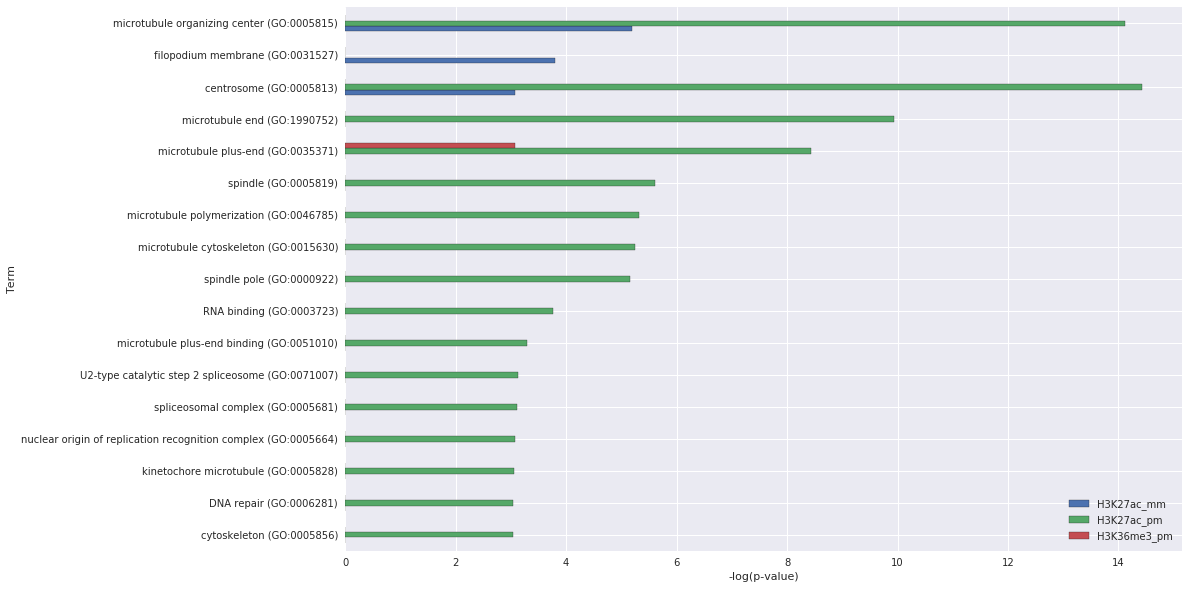

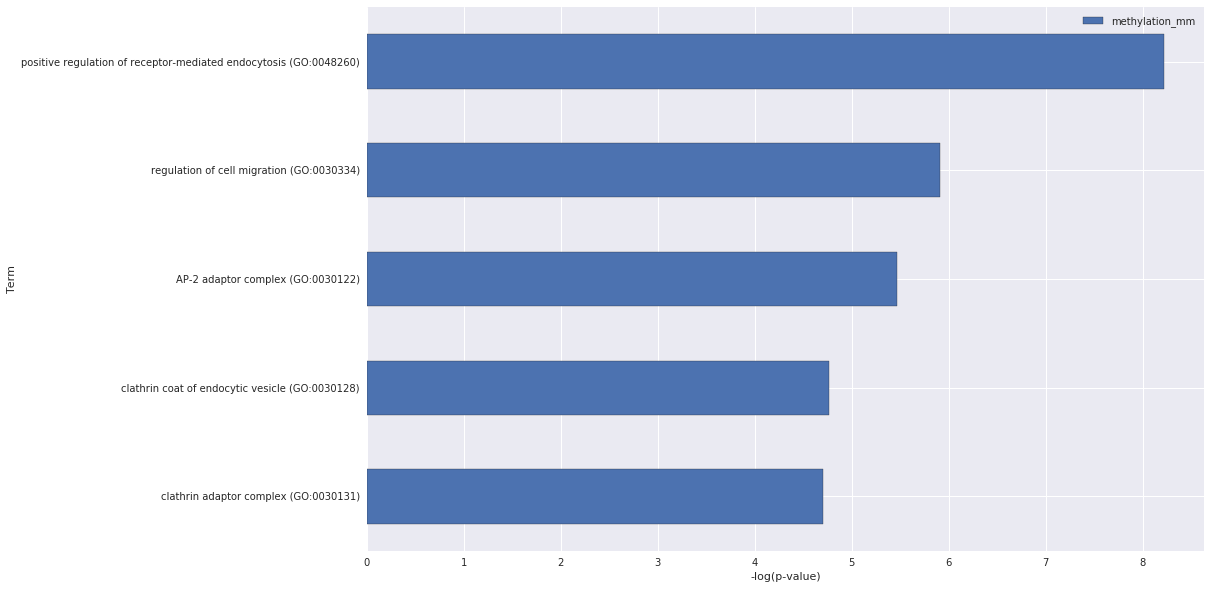

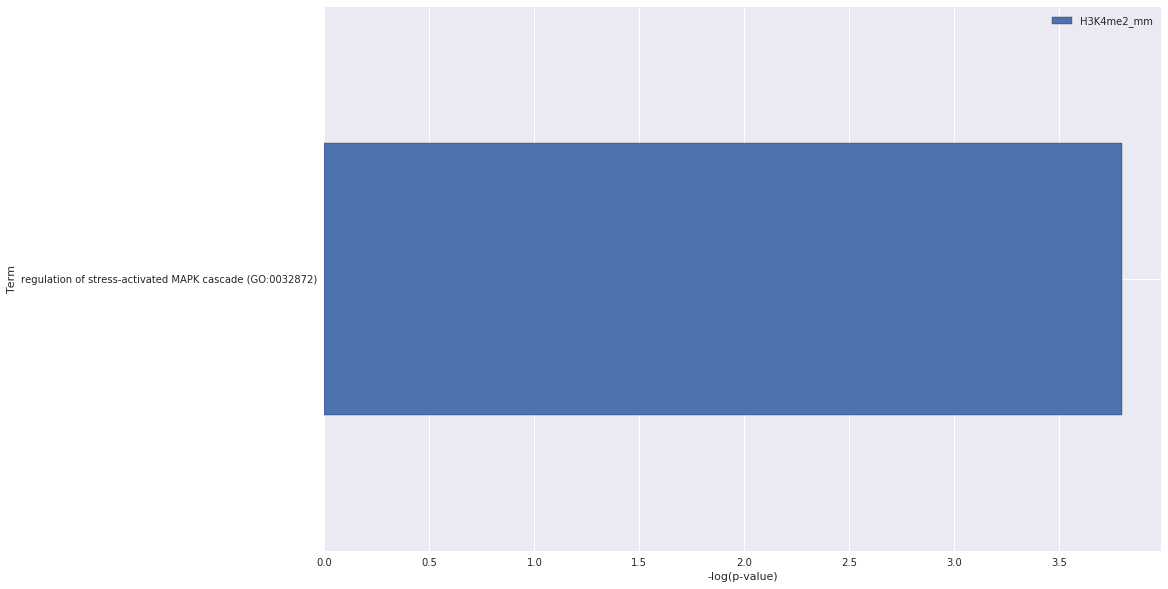

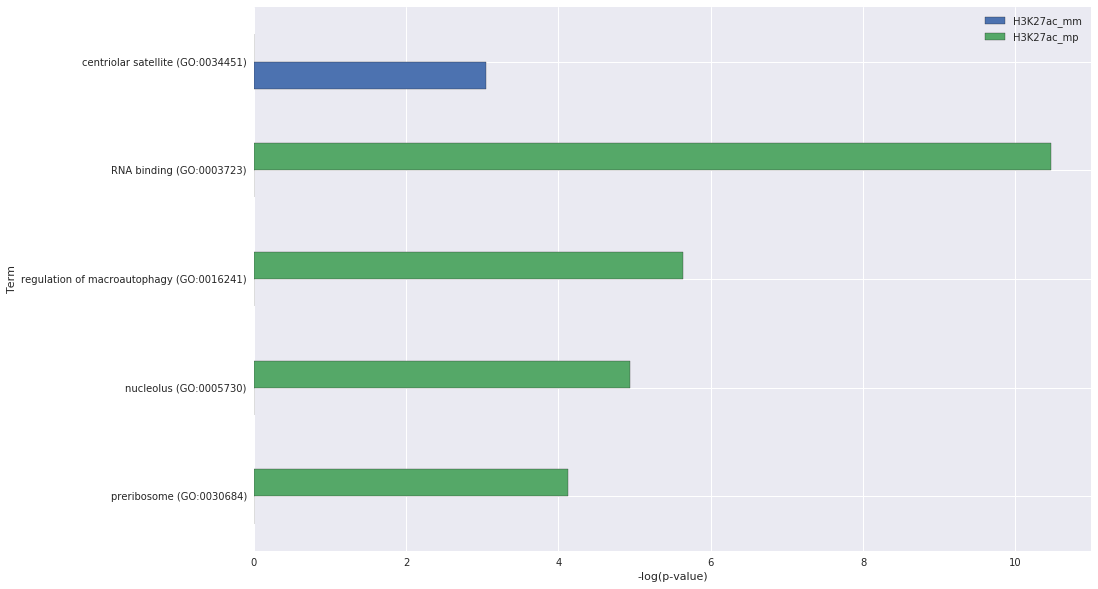

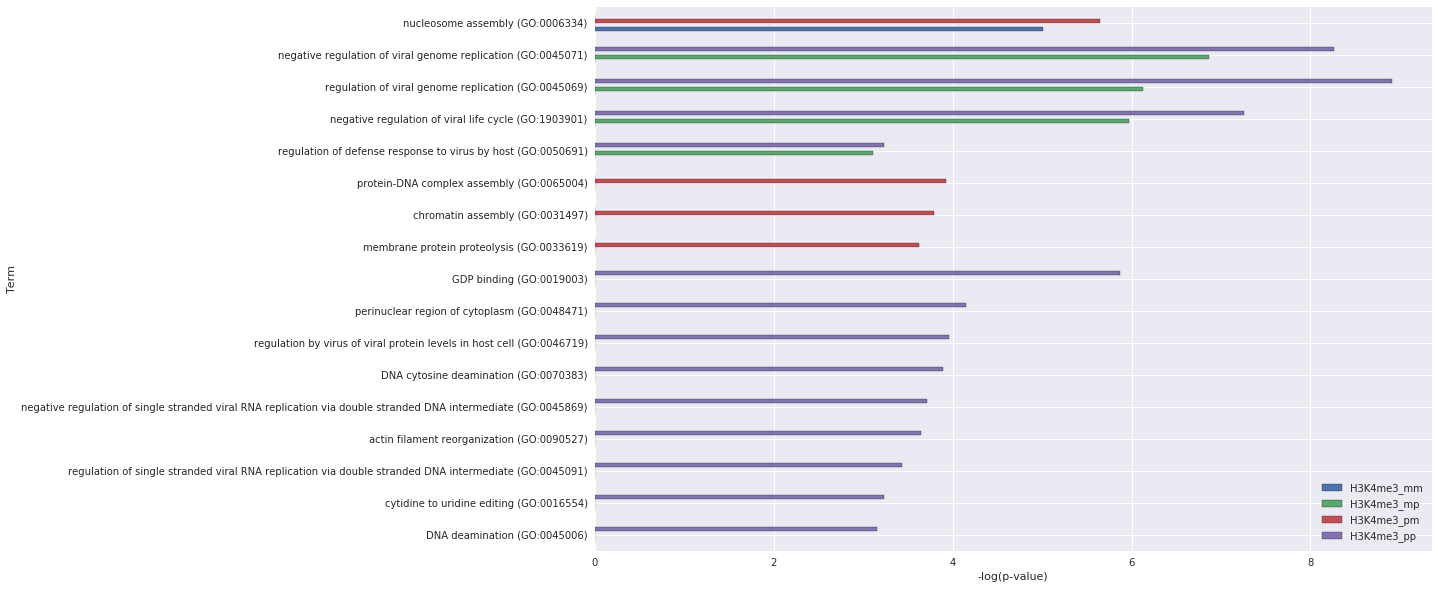

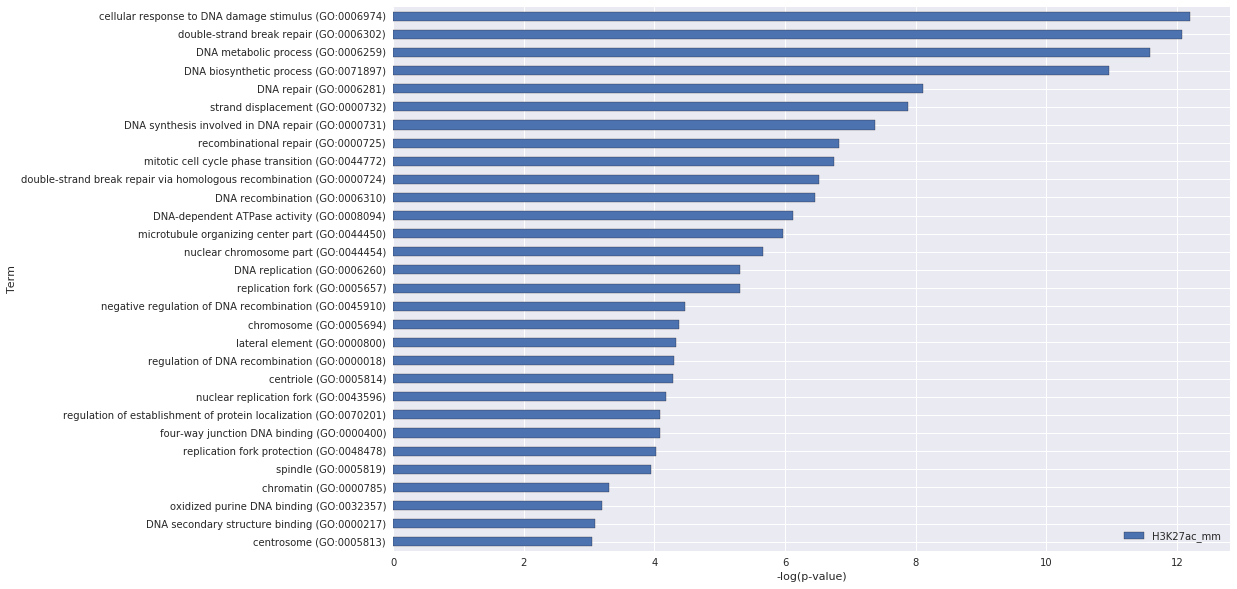

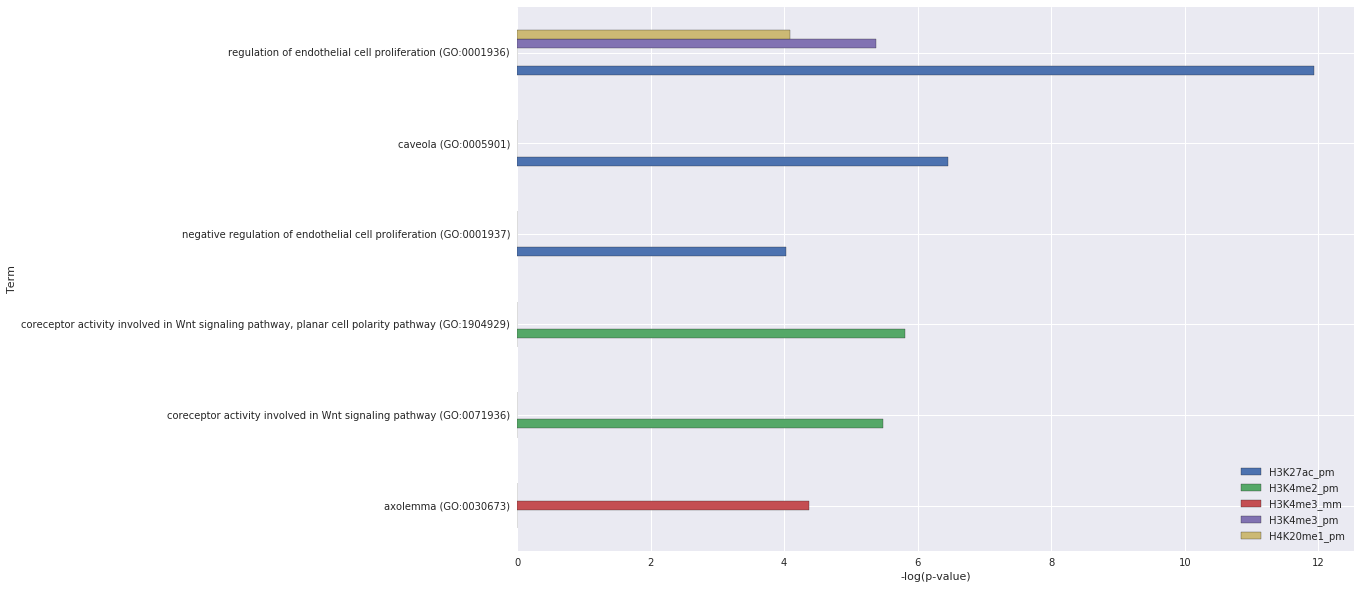

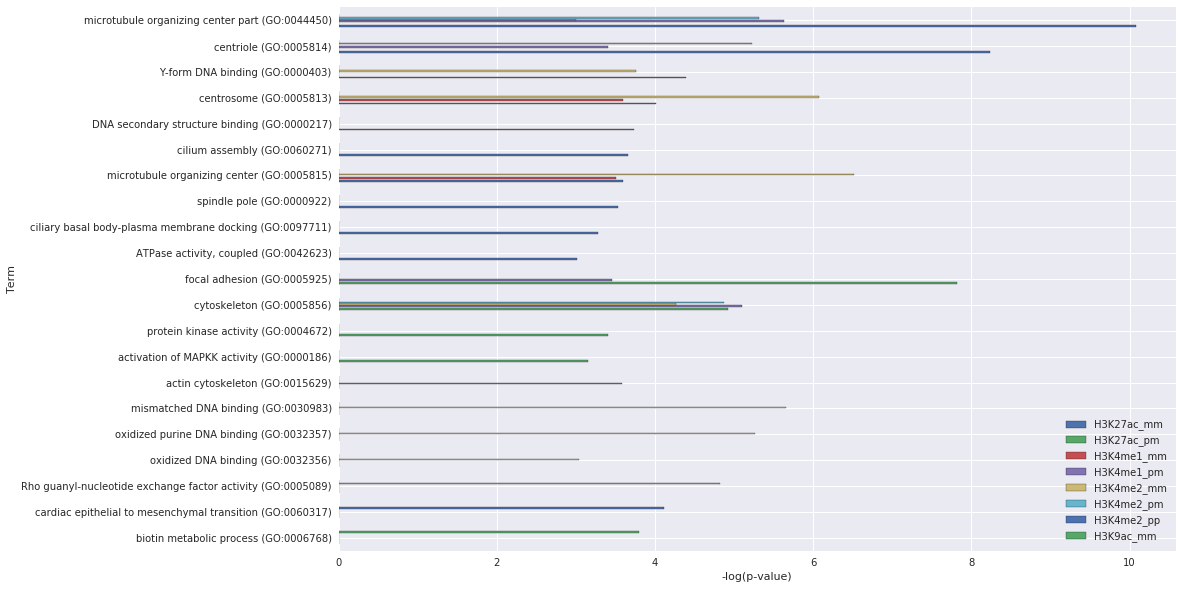

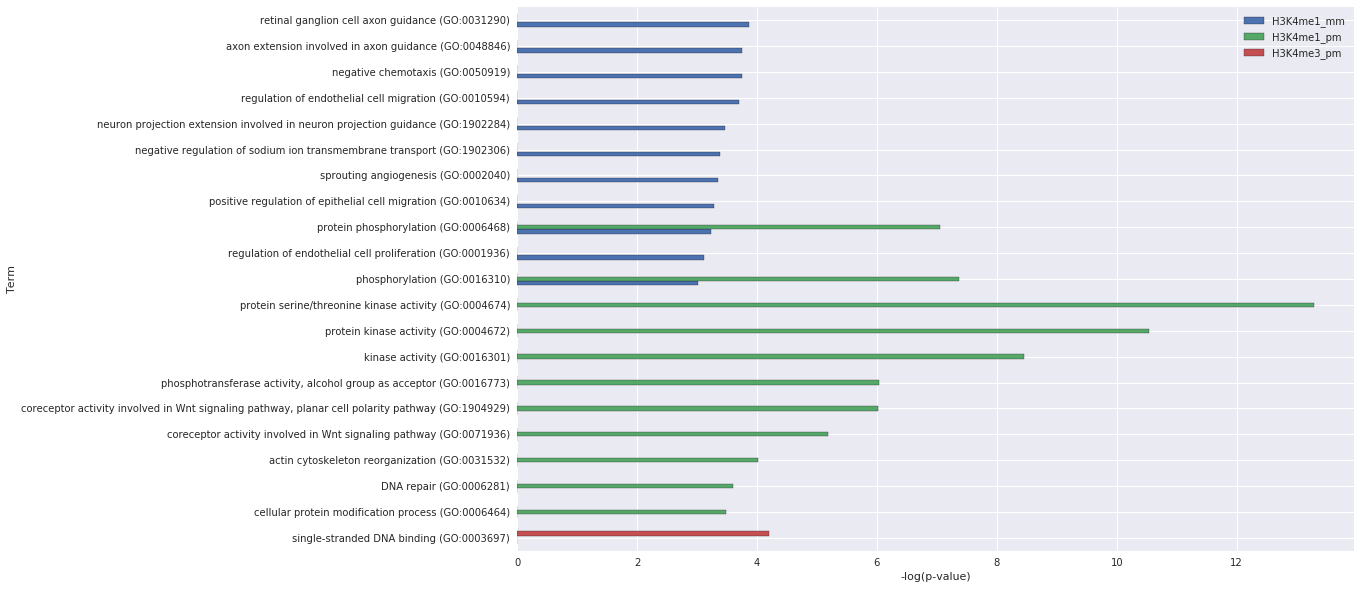

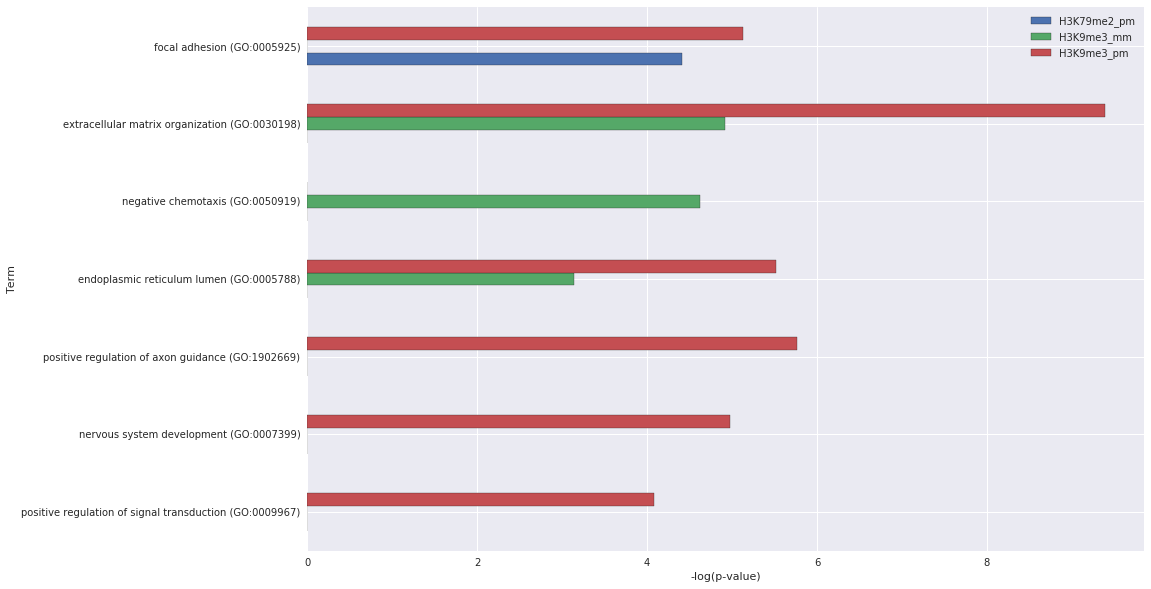

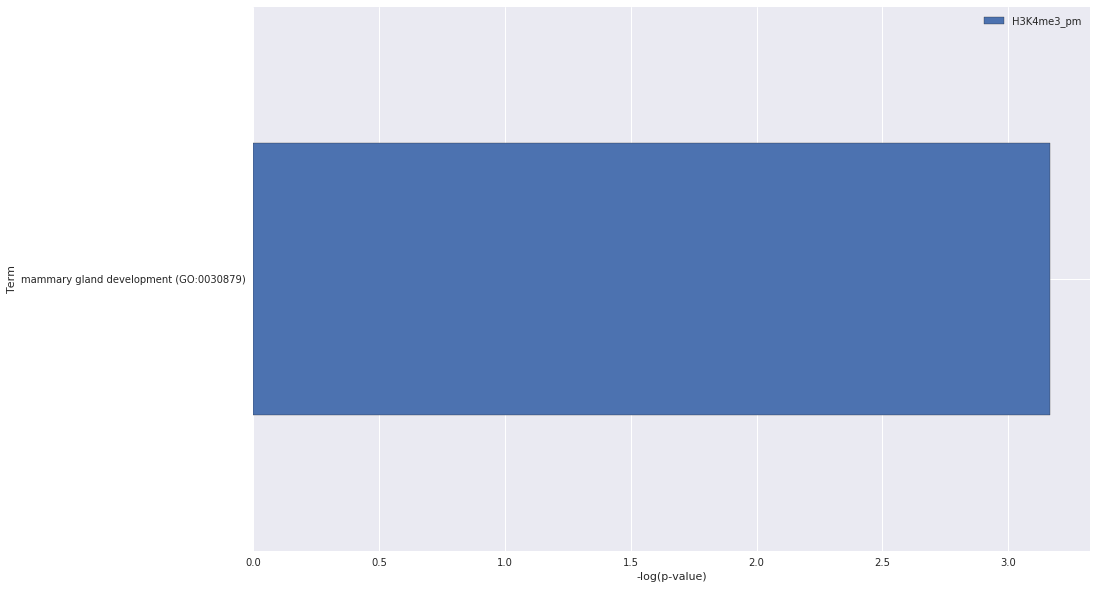

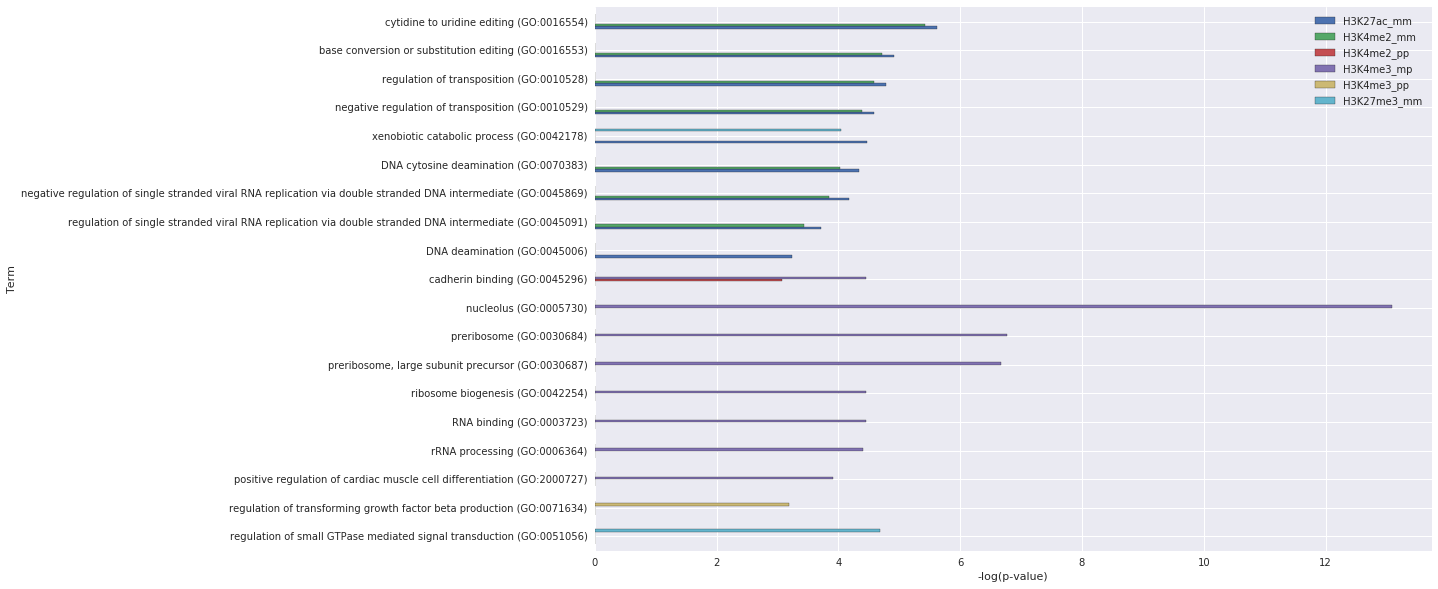

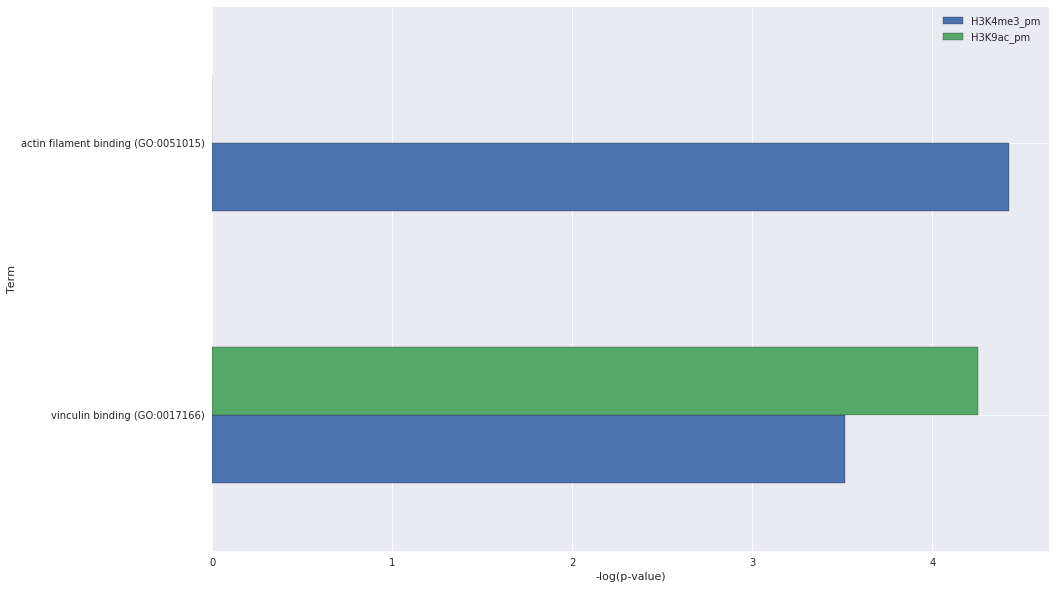

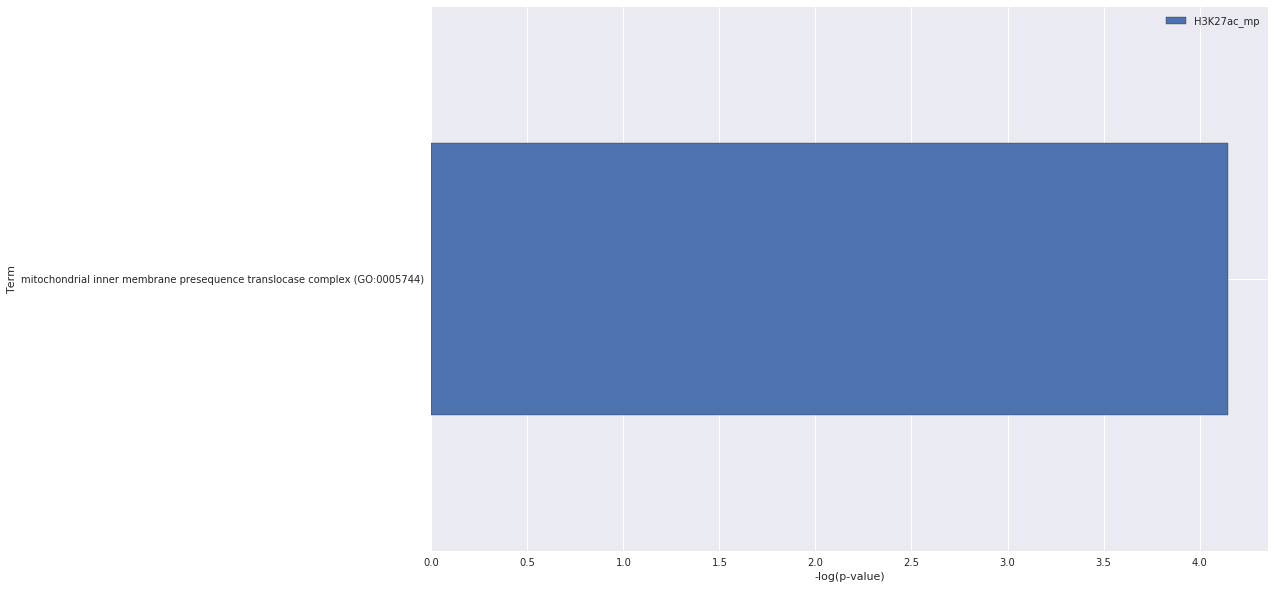

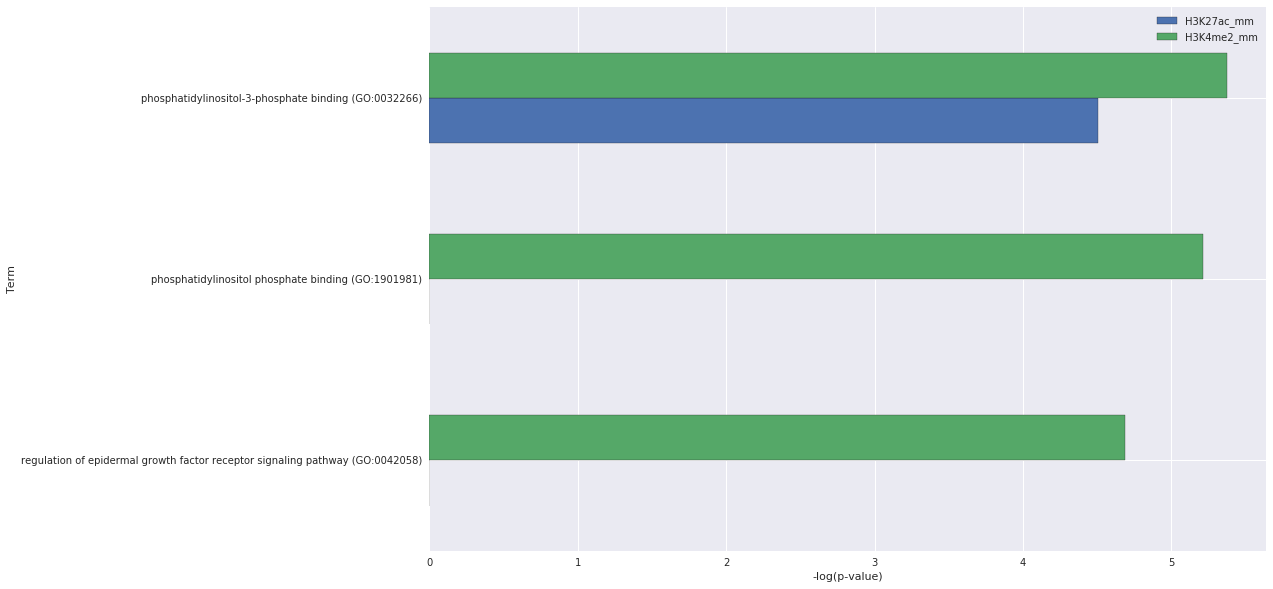

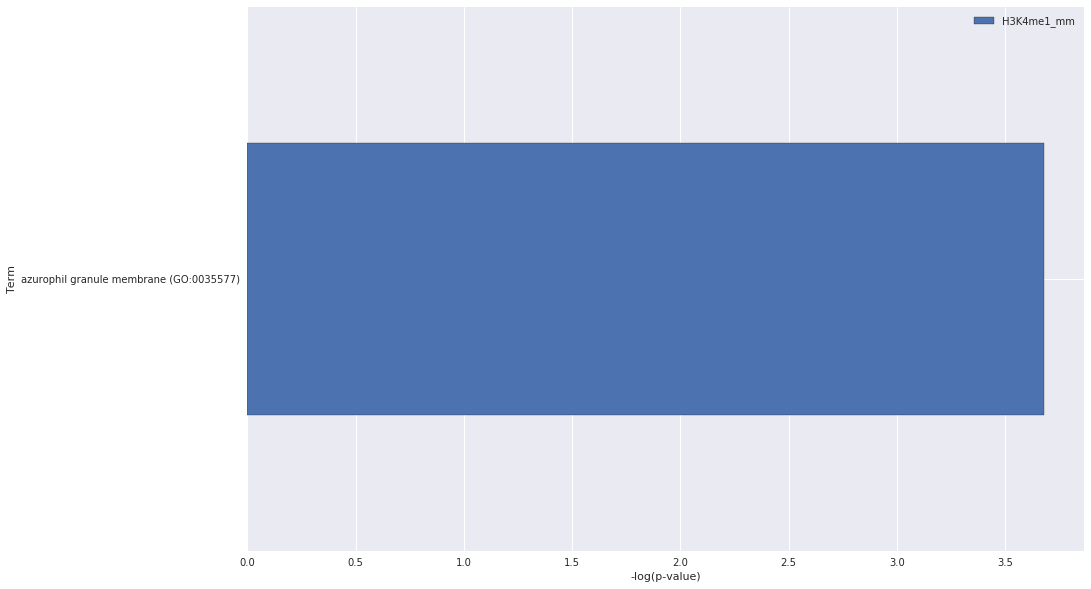

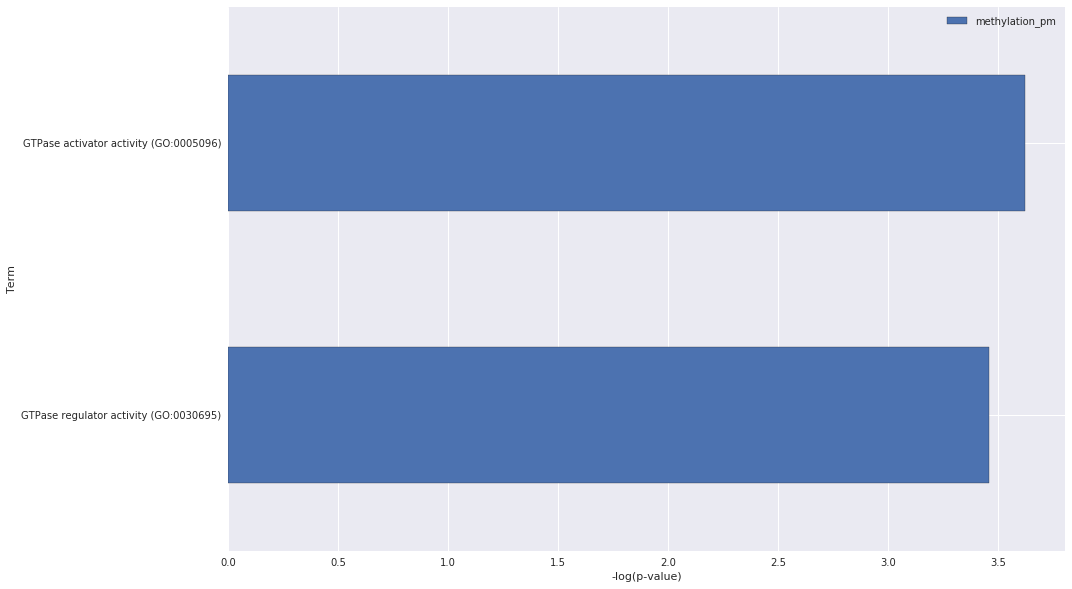

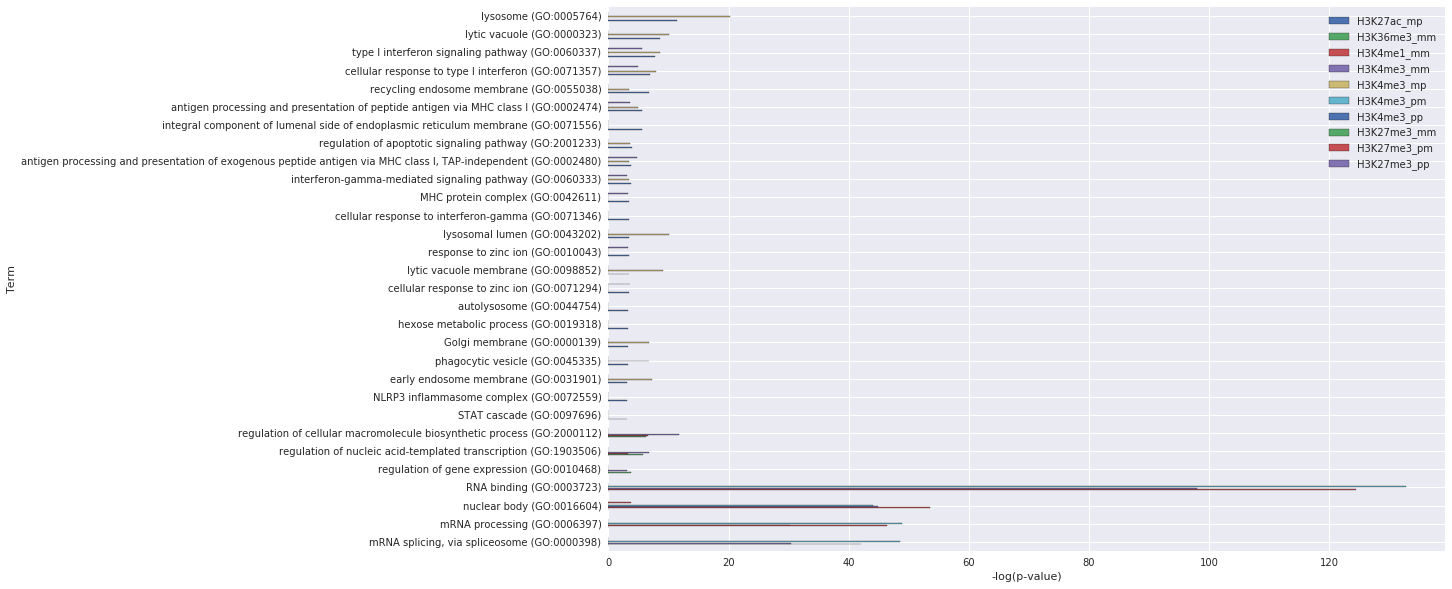

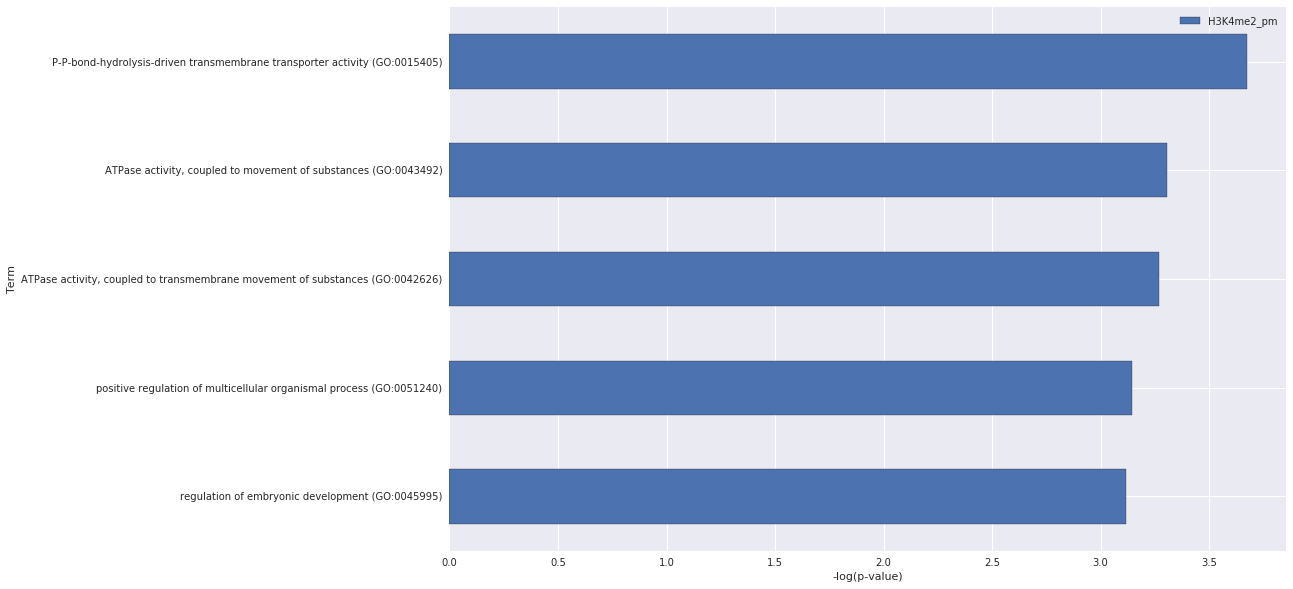

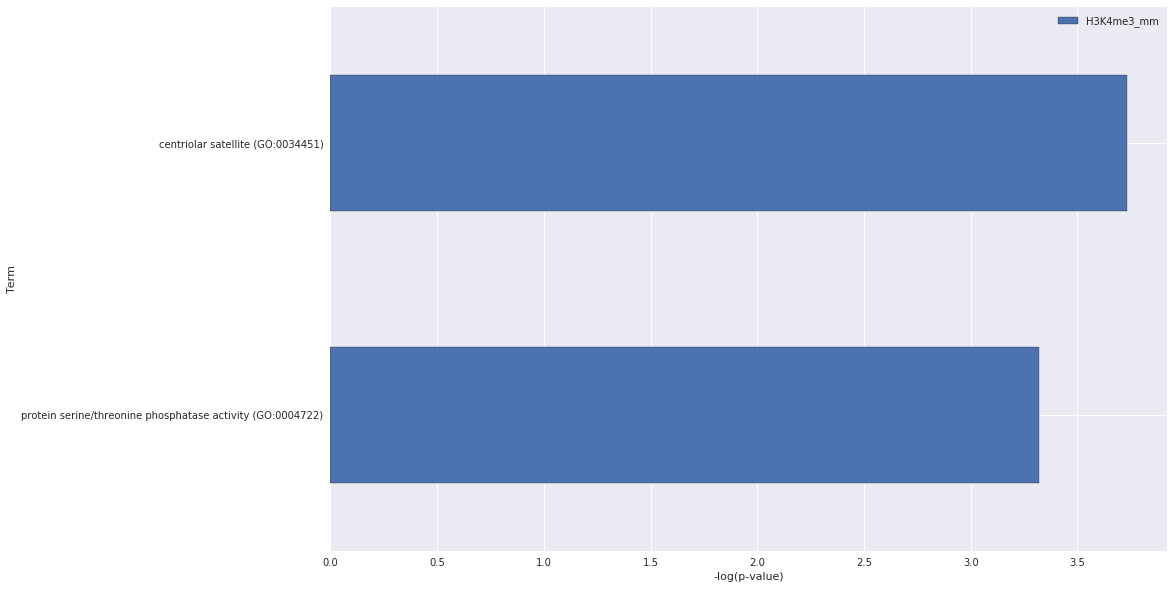

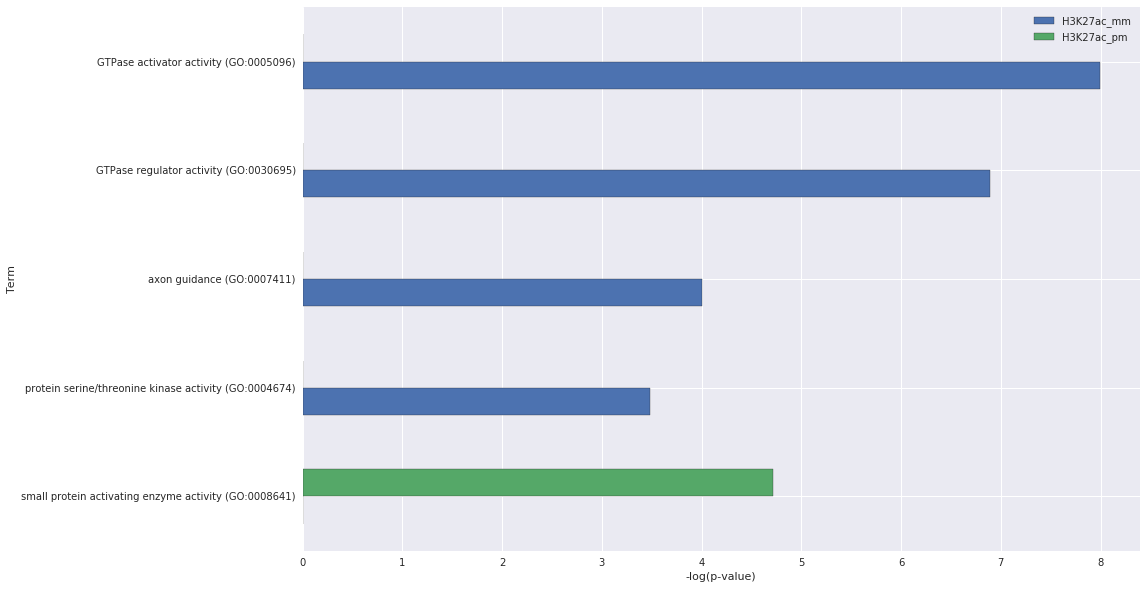

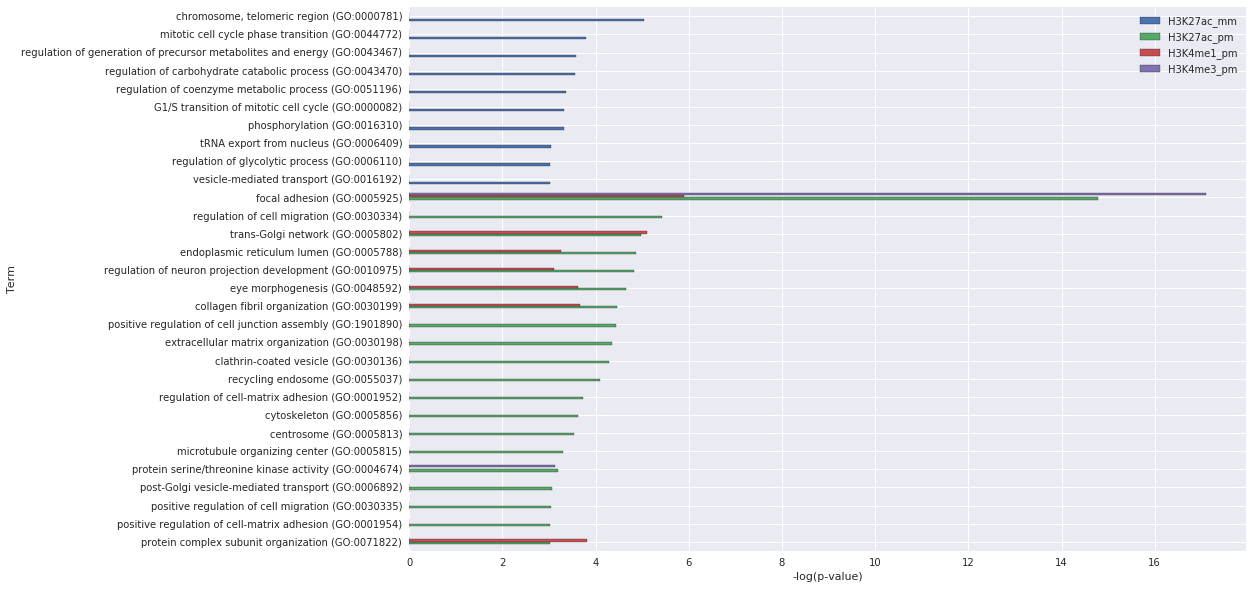

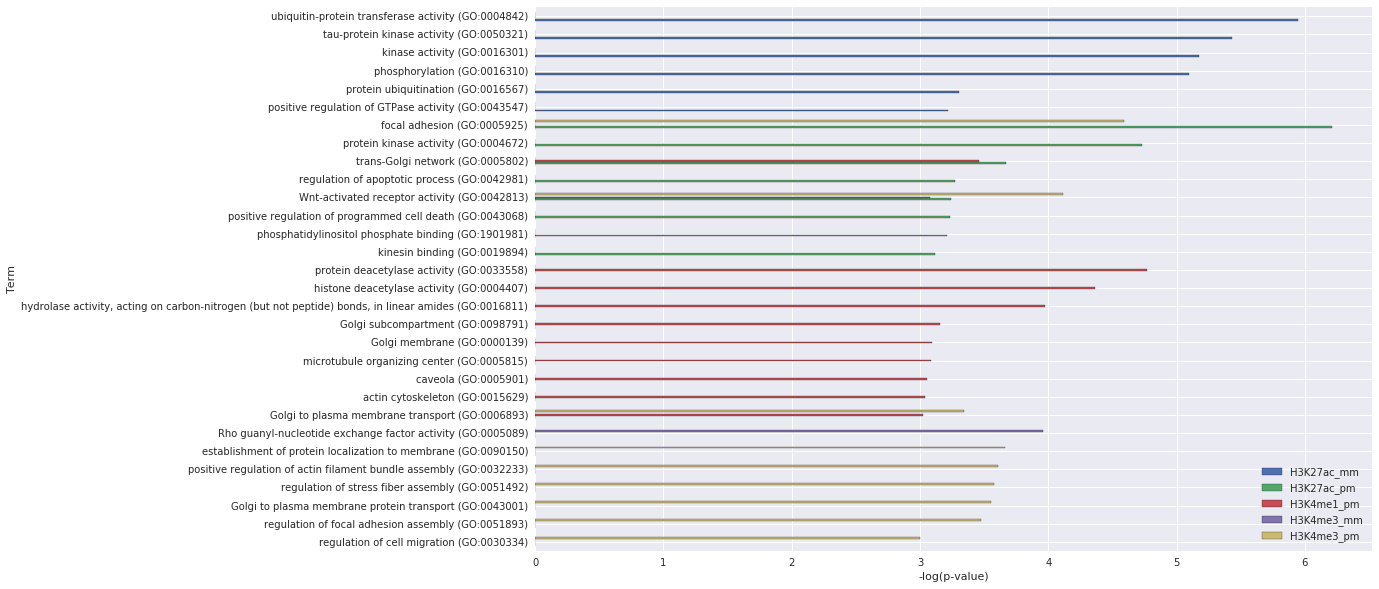

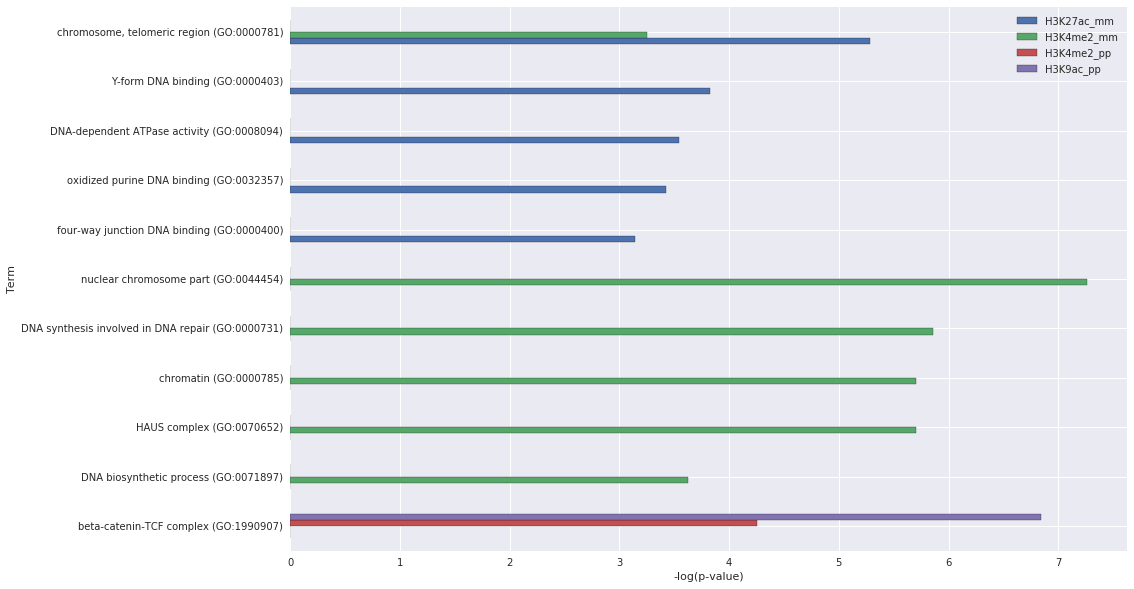

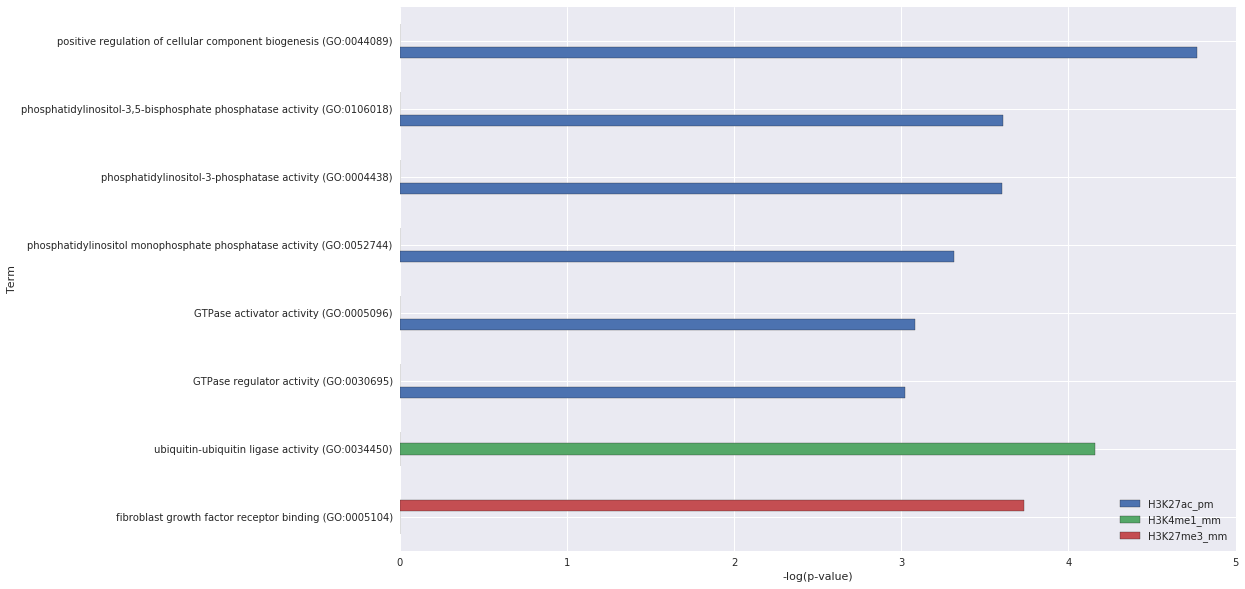

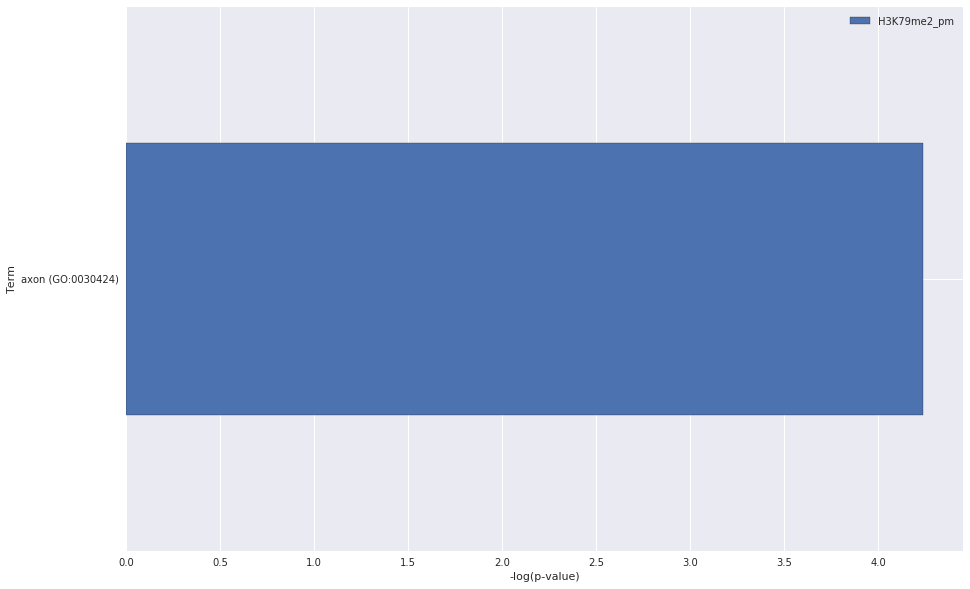

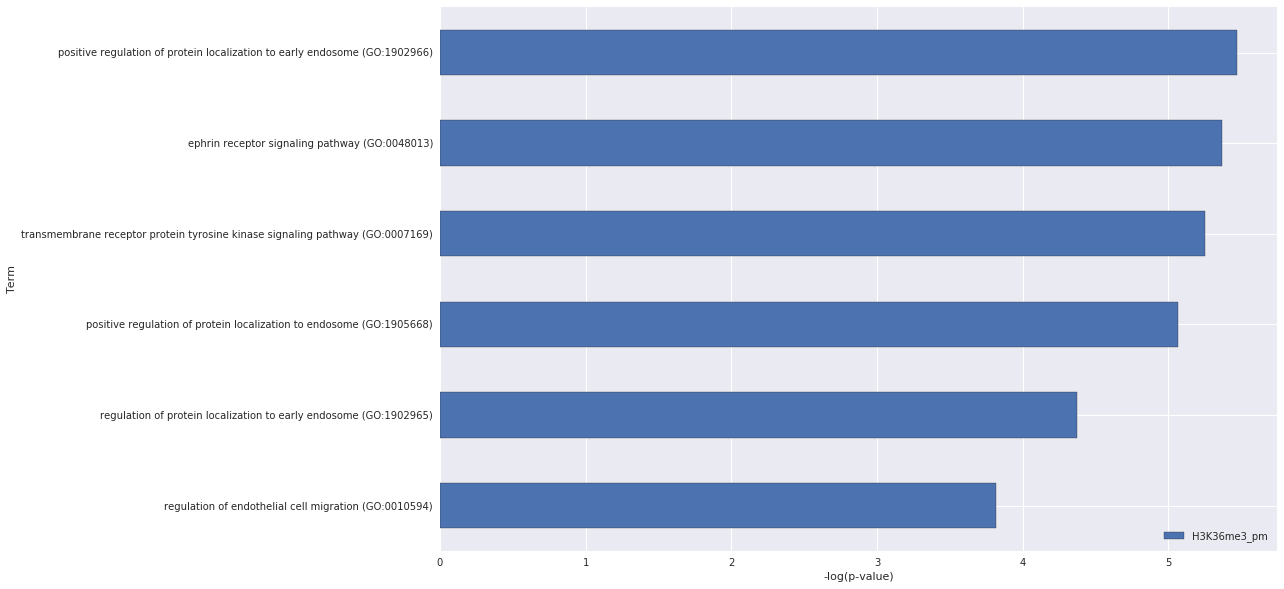

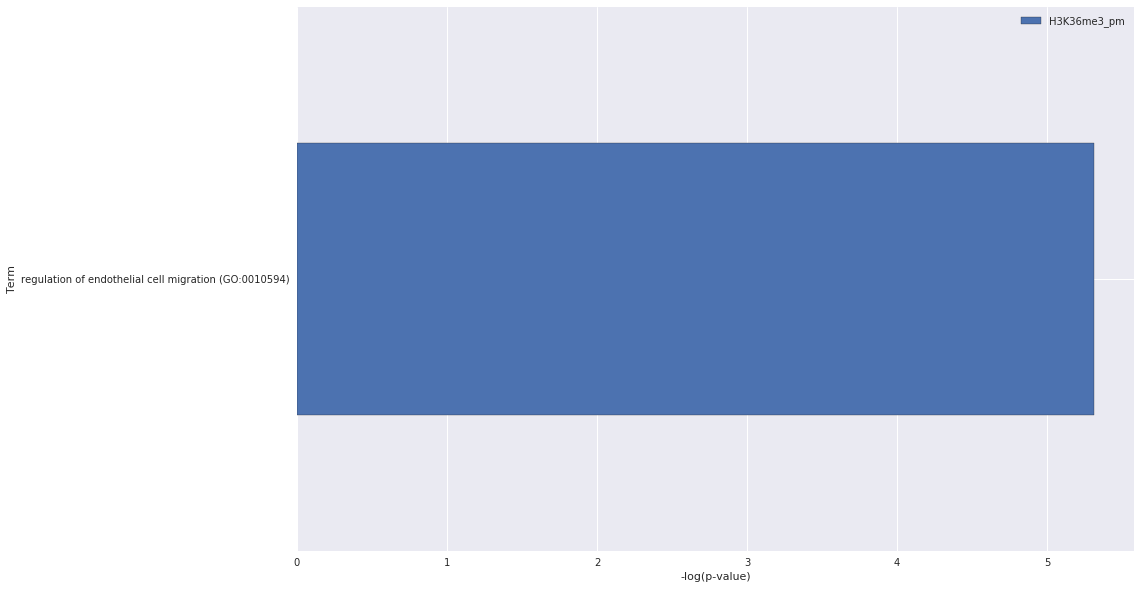

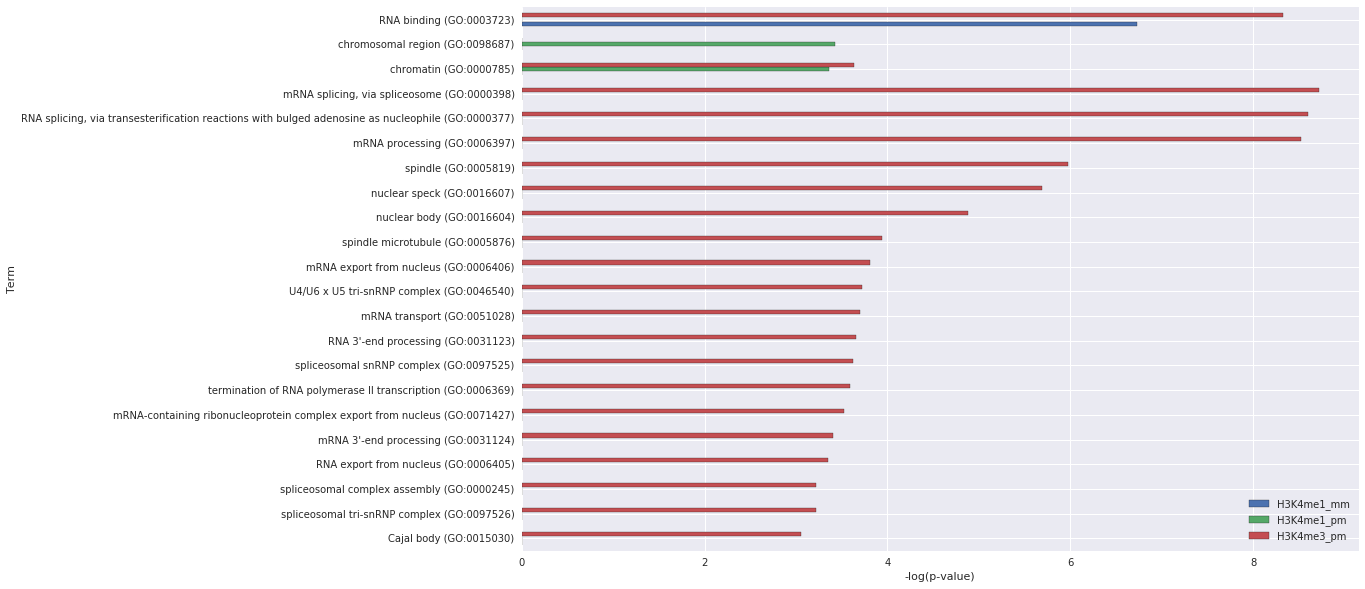

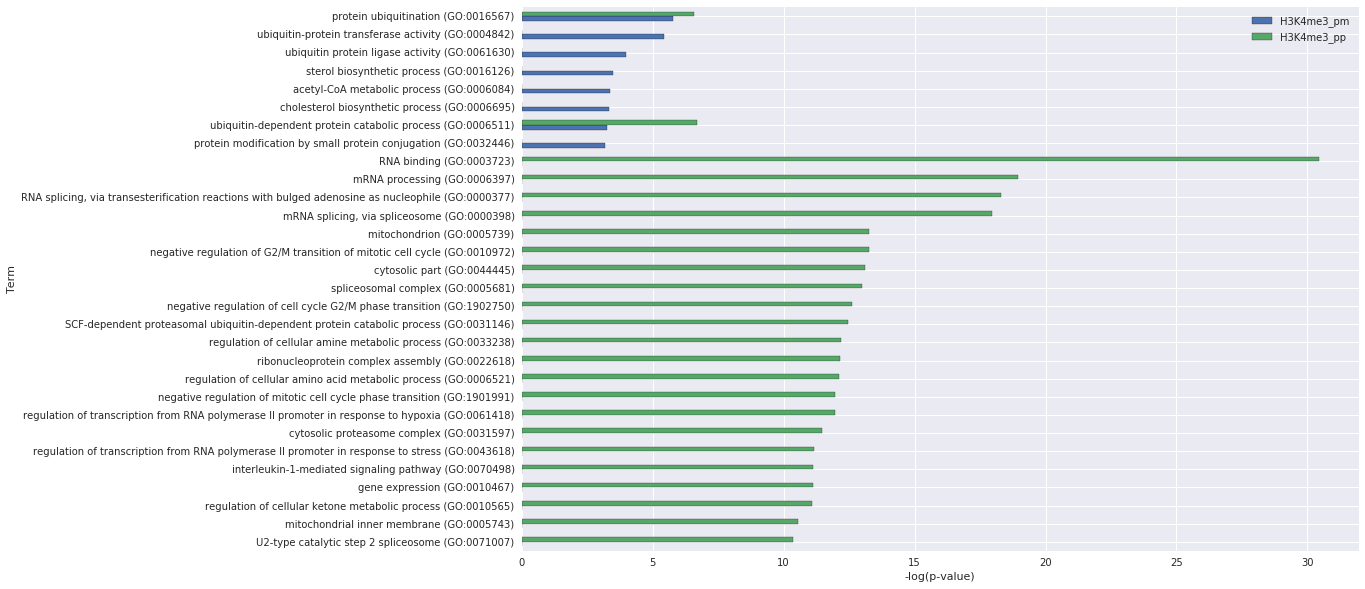

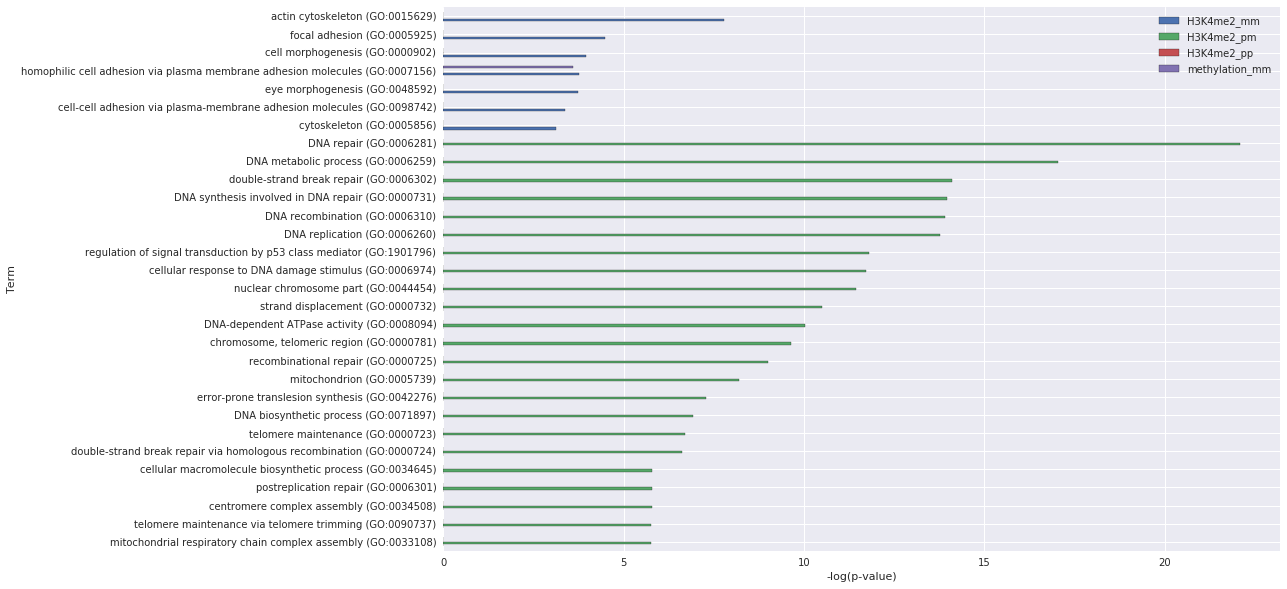

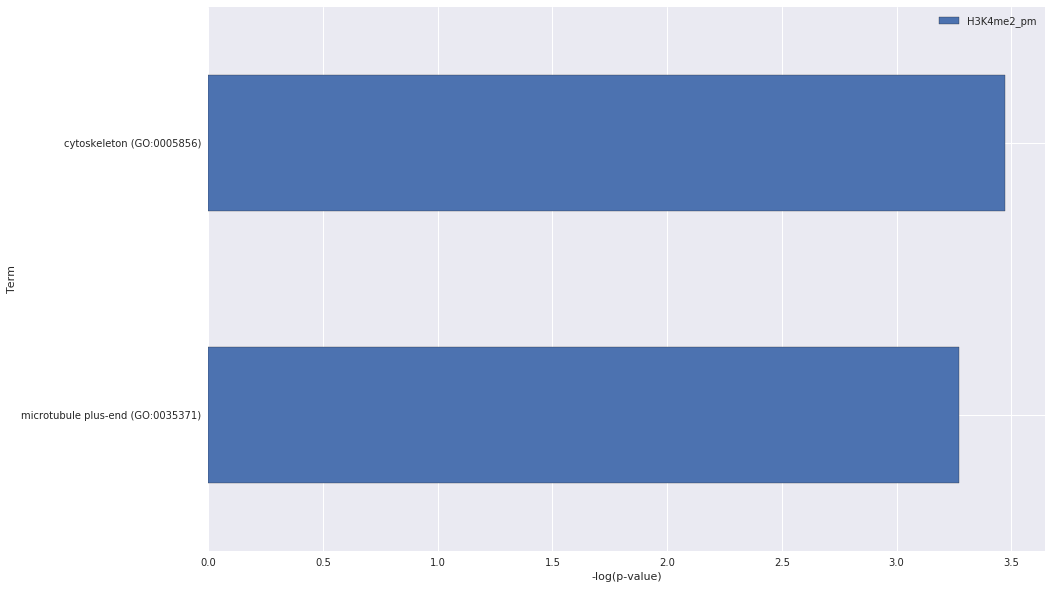

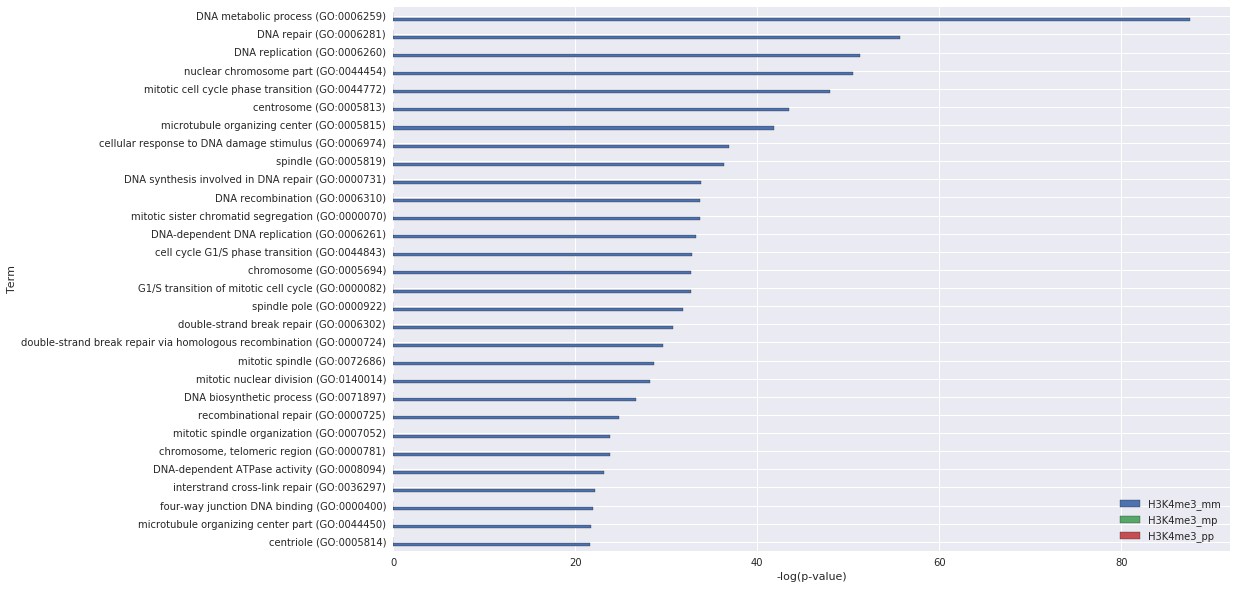

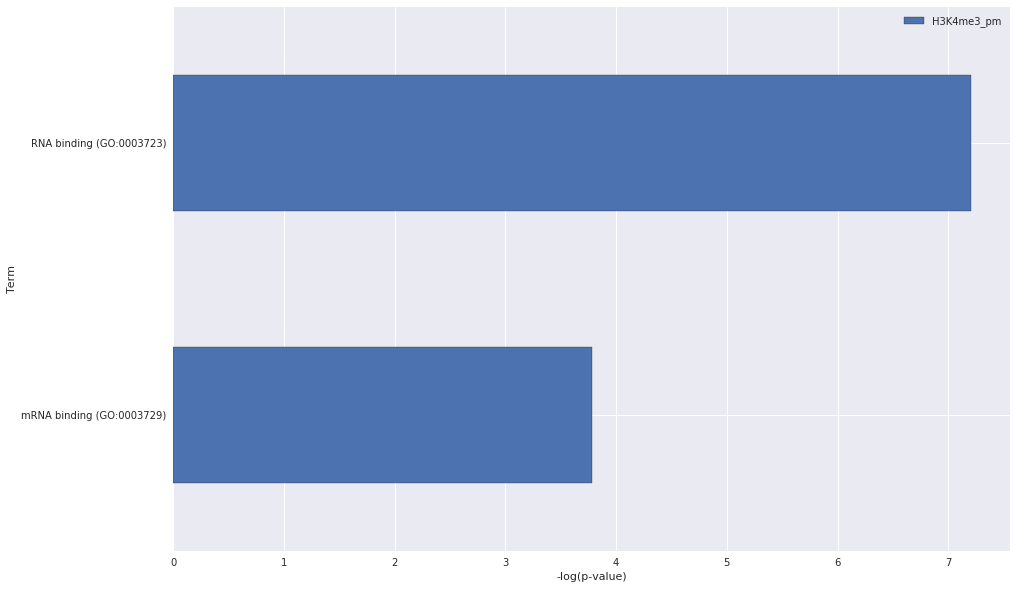

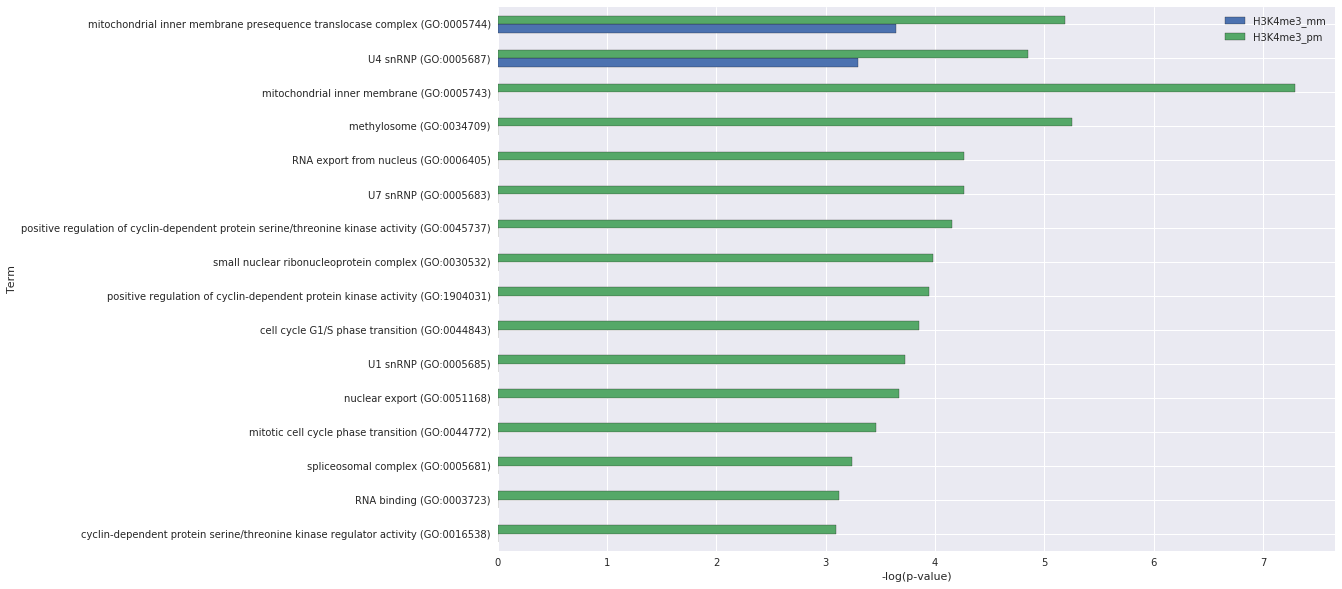

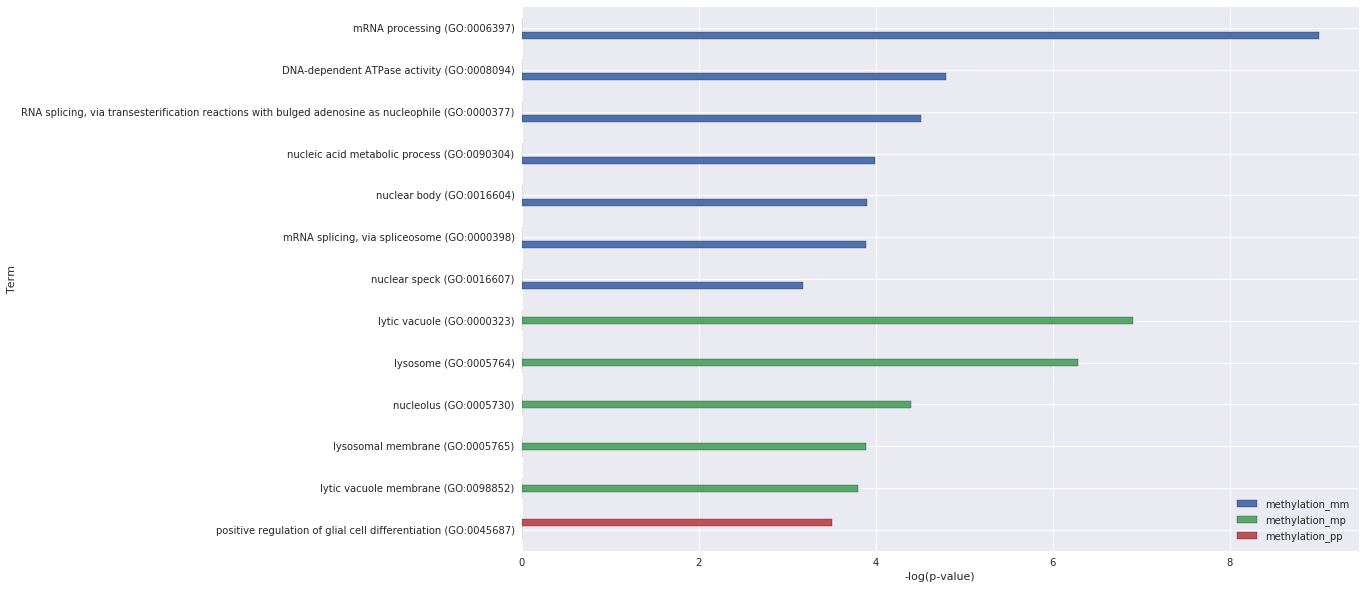

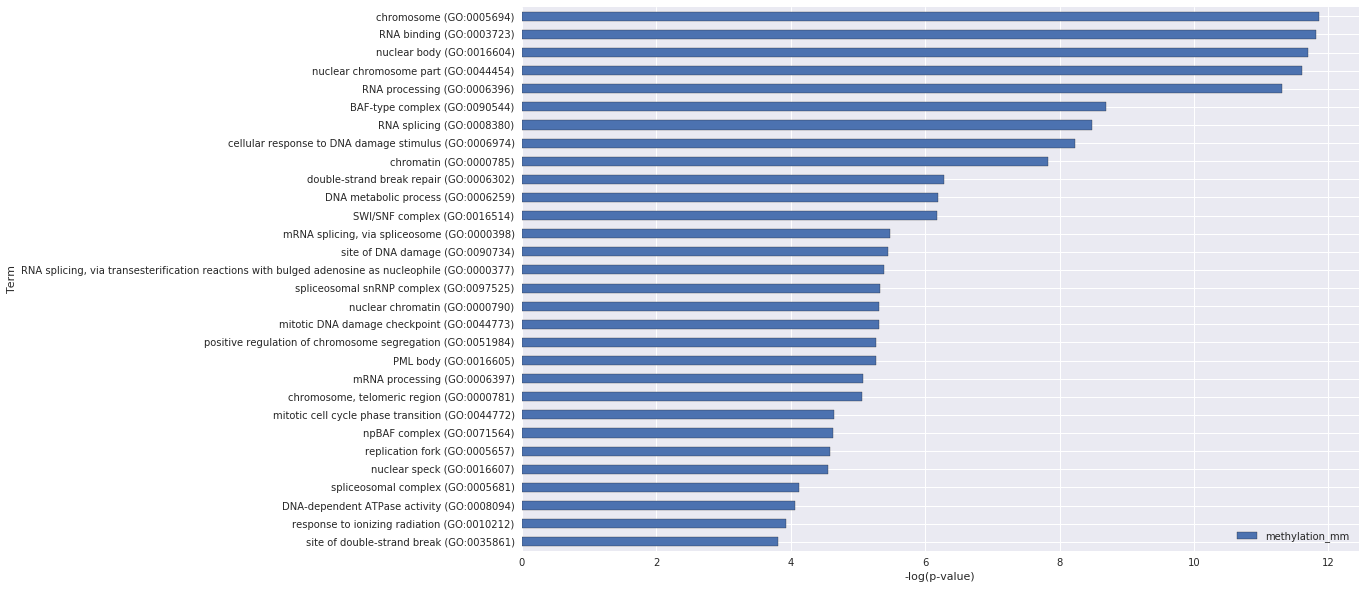

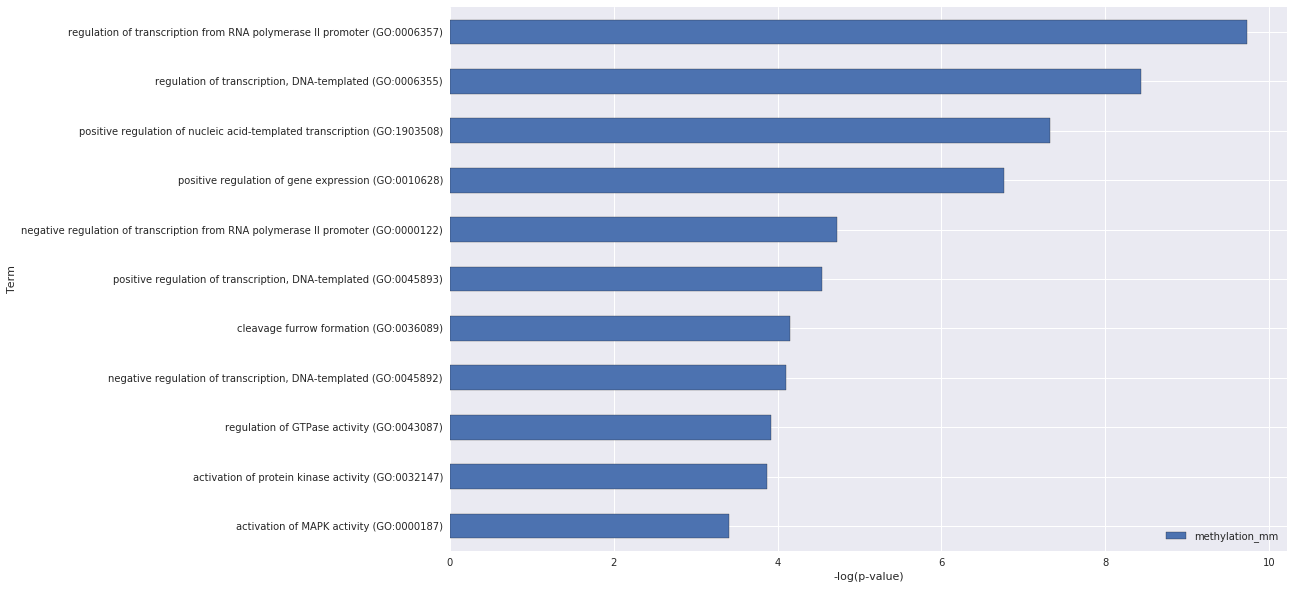

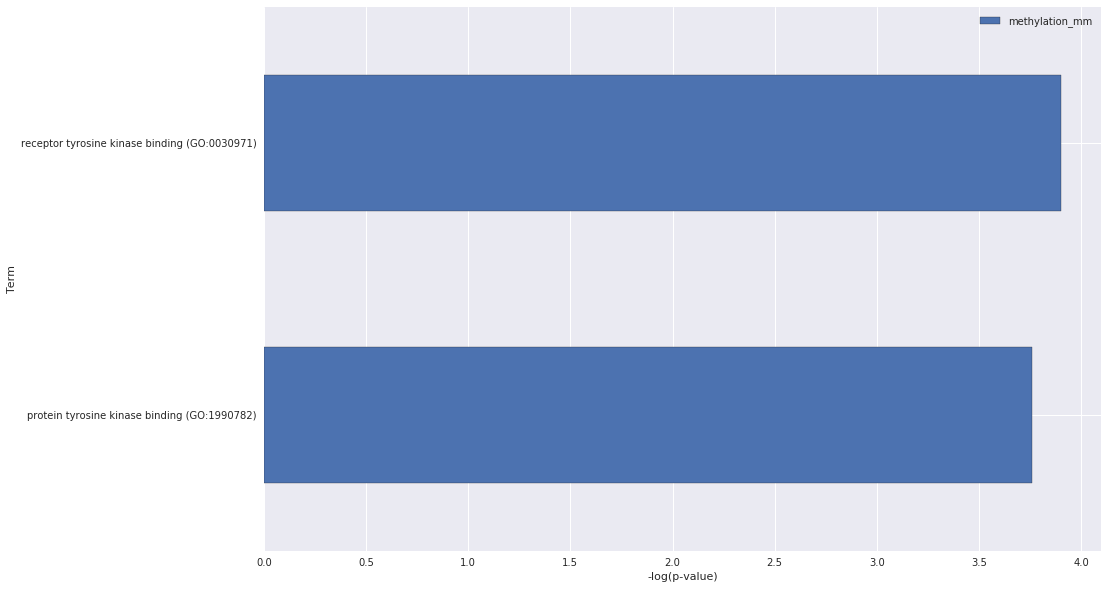

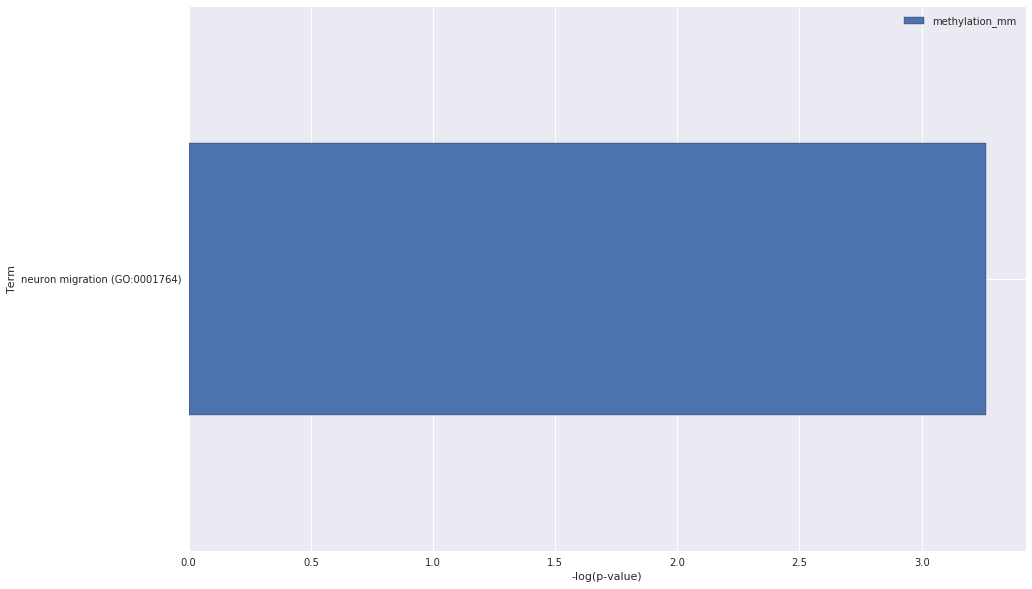

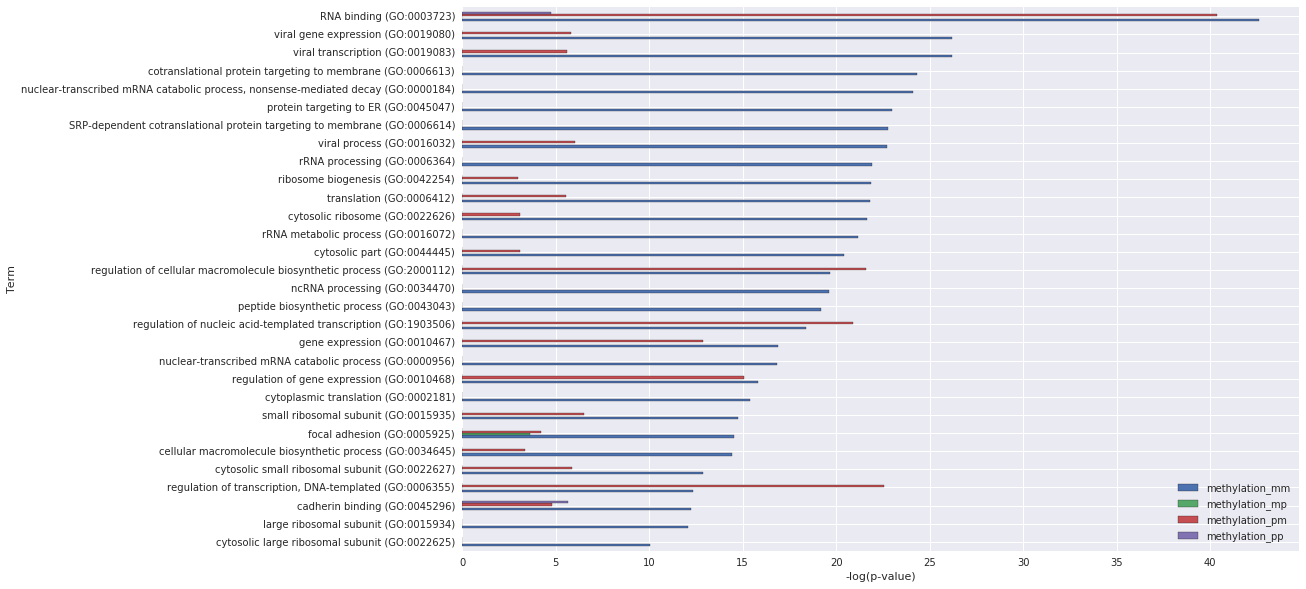

In [33]:
for lncRNA in go_biological_process.keys():
    print(lncRNA)
    general_terms_list = []
    term_log_pavalue = defaultdict(lambda: defaultdict(list))
    for hm, df in go_biological_process[lncRNA].items():
        for i, row in df.iterrows():
            general_terms_list.append(row['Term'])
            term_log_pavalue[hm][row['Term']] = -np.log(row['Adjusted P-value'])

    df_dict = defaultdict(list)
    for term in set(general_terms_list):
        df_dict['index'].append(term)
        for hm in term_log_pavalue.keys():
            if term in term_log_pavalue[hm]:
                df_dict[hm].append(term_log_pavalue[hm][term])
            else:
                df_dict[hm].append(0)
                
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=list(df.columns[1:]), axis=0, ascending=True).set_index('index').tail(30)
    ax = df.plot.barh()
    ax.set_ylabel("Term")
    ax.set_xlabel("-log(p-value)")
    
    fig = ax.get_figure()
    #fig.patch.set_alpha(0)
    fig.savefig("../all_marks/plots/GO/ASO/" + lncRNA + ".png", bbox_inches='tight', pad_inches = 0)

In [ ]:
#==================================================================================================================

In [201]:
enrichment_to_csv(go_biological_process).to_csv("../all_marks/GO_enrichment.tsv", sep="\t")

In [33]:
pd.set_option('max_colwidth', 100)

In [ ]:
#-===============================KEGG===================

In [122]:
KEGG = defaultdict(dict)
for lncRNA, typed_genes in tqdm(gene_lists_for_EA.items()):
    for t, genes in typed_genes.items():
        print(lncRNA + "_" + t)
        mg = mygene.MyGeneInfo()
        out = mg.querymany(genes, scopes='ensembl.gene', fields="entrezgene,symbol", species='human', 
                               returnall=True, as_dataframe=True)
        with_symbol = out['out']
        del with_symbol.index.name
        with_symbol['ensembl_id'] = with_symbol.index
        if 'entrezgene' in with_symbol.columns:
            with_symbol = with_symbol.reset_index()[['ensembl_id', 'entrezgene', 'symbol']]
            with_symbol = with_symbol[with_symbol['entrezgene'].notnull()]
            try:
                r = gseapy.enrichr(gene_list=with_symbol['symbol'].tolist(), gene_sets='KEGG_2019_Human', outdir='test')
                r = r.results.sort_values(['Adjusted P-value'])
                if r[r['Adjusted P-value'] < 0.05].shape[0] > 0:
                    KEGG[lncRNA][t] = r[r['Adjusted P-value'] < 0.05]
                sleep(5)
            except ConnectionRefusedError:
                print(lncRNA + "_" + t + " REFUSED!!!,sleep 10 secs")
                sleep(100)
        else:
            print(lncRNA + "_" + t + " NO entrezgene!")



  0%|          | 0/44 [00:00<?, ?it/s]

ENSG00000233117_H3K27ac_mm
querying 1-149...done.
Finished.


2020-03-10 19:07:45,443 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K27ac_mp
querying 1-32...done.
Finished.


2020-03-10 19:07:55,663 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K27ac_pm
querying 1-79...done.
Finished.
ENSG00000233117_H3K4me1_mm
querying 1-75...done.
Finished.


2020-03-10 19:08:15,566 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me1_pm
querying 1-247...done.
Finished.


2020-03-10 19:08:25,825 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me1_pp
querying 1-46...done.
Finished.


2020-03-10 19:08:35,657 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me2_mm
querying 1-247...done.
Finished.


2020-03-10 19:08:45,910 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me2_mp
querying 1-176...done.
Finished.


2020-03-10 19:08:56,038 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me2_pm
querying 1-316...done.
Finished.
ENSG00000233117_H3K4me2_pp
querying 1-91...done.
Finished.


2020-03-10 19:09:16,199 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K4me3_pm
querying 1-39...done.
Finished.


2020-03-10 19:09:25,875 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K79me2_pm
querying 1-24...done.
Finished.


2020-03-10 19:09:35,673 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K9ac_mm
querying 1-45...done.
Finished.


2020-03-10 19:09:45,563 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K9ac_pm
querying 1-51...done.
Finished.


2020-03-10 19:09:55,244 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K9ac_pp
querying 1-13...done.
Finished.


2020-03-10 19:10:04,835 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233117_H3K9me3_mm
querying 1-9...done.
Finished.


2020-03-10 19:10:14,419 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


  2%|▏         | 1/44 [02:39<1:54:32, 159.83s/it]

ENSG00000212978_H3K27ac_pm
querying 1-140...done.
Finished.
ENSG00000212978_H3K36me3_pm
querying 1-67...done.
Finished.
ENSG00000212978_H3K4me1_mm
querying 1-68...done.
Finished.


2020-03-10 19:10:44,475 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000212978_H3K4me1_pm
querying 1-51...done.
Finished.
ENSG00000212978_H3K4me2_mm
querying 1-157...done.
Finished.
ENSG00000212978_H3K4me2_pm
querying 1-84...done.
Finished.


2020-03-10 19:11:14,428 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000212978_H3K4me3_mm
querying 1-78...done.
Finished.
ENSG00000212978_H3K79me2_pm
querying 1-38...done.
Finished.


2020-03-10 19:11:33,994 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000212978_H3K9ac_mm
querying 1-12...done.
Finished.


2020-03-10 19:11:43,563 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000212978_H3K27me3_mm
querying 1-83...done.
Finished.




  5%|▍         | 2/44 [04:18<1:39:06, 141.58s/it]

ENSG00000260032_H3K27ac_mp
querying 1-46...done.
Finished.


2020-03-10 19:12:03,073 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000260032_H3K4me2_mp
querying 1-40...done.
Finished.


2020-03-10 19:12:12,860 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000260032_H3K9ac_pm
querying 1-12...done.
Finished.


2020-03-10 19:12:22,440 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


  7%|▋         | 3/44 [04:47<1:13:40, 107.81s/it]

ENSG00000223485_H3K27ac_mm
querying 1-967...done.
Finished.
ENSG00000223485_H3K27ac_mp
querying 1-445...done.
Finished.


2020-03-10 19:12:46,049 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223485_H3K27ac_pm
querying 1-676...done.
Finished.
ENSG00000223485_H3K27ac_pp
querying 1-304...done.
Finished.


2020-03-10 19:13:08,114 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223485_H3K36me3_pm
querying 1-17...done.
Finished.


2020-03-10 19:13:17,823 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223485_H3K4me1_mm
querying 1-119...done.
Finished.


2020-03-10 19:13:27,796 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223485_H3K4me1_pm
querying 1-466...done.
Finished.
ENSG00000223485_H3K4me1_pp
querying 1-175...done.
Finished.


2020-03-10 19:13:48,672 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223485_H3K4me3_pm
querying 1-443...done.
Finished.
ENSG00000223485_H3K4me3_pp
querying 1-175...done.
Finished.


2020-03-10 19:14:09,594 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


  9%|▉         | 4/44 [06:35<1:11:44, 107.62s/it]

ENSG00000271270_H3K27ac_pm
querying 1-12...done.
Finished.


2020-03-10 19:14:19,258 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000271270_H3K4me1_mm
querying 1-8...done.
Finished.


2020-03-10 19:14:28,960 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 11%|█▏        | 5/44 [06:54<52:44, 81.14s/it]   

ENSG00000253161_H3K27ac_pm
querying 1-175...done.
Finished.
ENSG00000253161_H3K36me3_pm
querying 1-13...done.
Finished.


2020-03-10 19:14:48,934 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000253161_H3K4me1_mp
querying 1-4...done.
Finished.


2020-03-10 19:14:58,480 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000253161_H3K4me1_pm
querying 1-103...done.
Finished.
ENSG00000253161_H3K4me2_mm
querying 1-111...done.
Finished.


2020-03-10 19:15:18,600 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000253161_H3K4me2_pm
querying 1-166...done.
Finished.


2020-03-10 19:15:28,687 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000253161_H3K4me3_mm
querying 1-567...done.
Finished.
ENSG00000253161_H3K4me3_pm
querying 1-126...done.
Finished.
ENSG00000253161_H3K4me3_pp
querying 1-119...done.
Finished.
ENSG00000253161_H3K27me3_mm
querying 1-104...done.
Finished.


2020-03-10 19:16:10,079 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 14%|█▎        | 6/44 [08:35<55:11, 87.13s/it]

ENSG00000268895_H3K27ac_mm
querying 1-549...done.
Finished.
ENSG00000268895_H3K27ac_mp
querying 1-189...done.
Finished.
ENSG00000268895_H3K27ac_pm
querying 1-353...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']


2020-03-10 19:16:42,262 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000268895_H3K36me3_pm
querying 1-48...done.
Finished.


2020-03-10 19:16:51,954 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000268895_H3K4me1_pm
querying 1-7...done.
Finished.


2020-03-10 19:17:01,523 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000268895_H3K4me3_mm
querying 1-4...done.
Finished.


2020-03-10 19:17:11,093 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 16%|█▌        | 7/44 [09:36<48:54, 79.30s/it]

ENSG00000227053_H3K27ac_mm
querying 1-45...done.
Finished.
ENSG00000227053_H3K27ac_pm
querying 1-46...done.
Finished.


2020-03-10 19:17:30,648 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K36me3_pm
querying 1-6...done.
Finished.


2020-03-10 19:17:40,222 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K79me2_mm
querying 1-125...done.
Finished.


2020-03-10 19:17:50,092 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K79me2_mp
querying 1-40...done.
Finished.


2020-03-10 19:18:00,042 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K79me2_pm
querying 1-122...done.
Finished.
2 input query terms found no hit:
	['ENSG00000262621', 'ENSG00000243444']


2020-03-10 19:18:10,031 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K9me3_mm
querying 1-493...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']
ENSG00000227053_H3K9me3_mp
querying 1-132...done.
Finished.


2020-03-10 19:18:30,818 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227053_H3K9me3_pm
querying 1-331...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']




 18%|█▊        | 8/44 [11:06<49:35, 82.65s/it]

ENSG00000225733_H3K27ac_mm
querying 1-143...done.
Finished.


2020-03-10 19:18:51,503 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000225733_H3K27ac_pm
querying 1-113...done.
Finished.
ENSG00000225733_H3K4me1_pm
querying 1-10...done.
Finished.


2020-03-10 19:19:11,156 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000225733_H3K4me2_mm
querying 1-159...done.
Finished.


2020-03-10 19:19:21,221 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000225733_H3K4me2_pm
querying 1-123...done.
Finished.
ENSG00000225733_H3K4me3_mm
querying 1-287...done.
Finished.
ENSG00000225733_H3K4me3_pm
querying 1-68...done.
Finished.
ENSG00000225733_H3K9ac_mm
querying 1-37...done.
Finished.


2020-03-10 19:20:01,402 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000225733_H3K9ac_pm
querying 1-39...done.
Finished.
ENSG00000225733_H4K20me1_pm
querying 1-13...done.
Finished.


2020-03-10 19:20:20,756 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 20%|██        | 9/44 [12:46<51:06, 87.61s/it]

ENSG00000240875_H3K27ac_mm
querying 1-33...done.
Finished.


2020-03-10 19:20:30,449 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000240875_H3K4me2_mm
querying 1-165...done.
Finished.
ENSG00000240875_H3K4me2_pm
querying 1-133...done.
Finished.


2020-03-10 19:20:50,621 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000240875_H3K4me2_pp
querying 1-121...done.
Finished.


2020-03-10 19:21:00,497 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000240875_H3K9ac_mm
querying 1-45...done.
Finished.


2020-03-10 19:21:10,149 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000240875_H3K9ac_pm
querying 1-46...done.
Finished.


2020-03-10 19:21:19,804 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000240875_H3K9ac_pp
querying 1-47...done.
Finished.


2020-03-10 19:21:29,469 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 23%|██▎       | 10/44 [13:54<46:26, 81.94s/it]

ENSG00000234456_H3K27ac_pm
querying 1-14...done.
Finished.


2020-03-10 19:21:39,130 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234456_H4K20me1_pm
querying 1-7...done.
Finished.


2020-03-10 19:21:48,738 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 25%|██▌       | 11/44 [14:14<34:43, 63.14s/it]

ENSG00000234608_H3K27ac_mm
querying 1-4...done.
Finished.


2020-03-10 19:21:58,293 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K36me3_pm
querying 1-15...done.
Finished.


2020-03-10 19:22:07,873 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K4me1_mm
querying 1-502...done.
Finished.
ENSG00000234608_H3K4me1_mp
querying 1-157...done.
Finished.
ENSG00000234608_H3K4me1_pm
querying 1-232...done.
Finished.


2020-03-10 19:22:39,861 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K4me1_pp
querying 1-71...done.
Finished.


2020-03-10 19:22:49,586 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K4me3_mm
querying 1-154...done.
Finished.
ENSG00000234608_H3K4me3_pm
querying 1-277...done.
Finished.


2020-03-10 19:23:09,954 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K9me3_mm
querying 1-67...done.
Finished.


2020-03-10 19:23:19,719 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234608_H3K9me3_pm
querying 1-41...done.
Finished.
ENSG00000234608_H3K27me3_mm
querying 1-205...done.
Finished.


2020-03-10 19:23:39,718 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 27%|██▋       | 12/44 [16:05<41:19, 77.49s/it]

ENSG00000256268_H3K27ac_pm
querying 1-61...done.
Finished.
ENSG00000256268_H3K4me1_pm
querying 1-30...done.
Finished.


2020-03-10 19:23:59,230 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000256268_H3K4me2_pm
querying 1-53...done.
Finished.


2020-03-10 19:24:09,023 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000256268_H3K4me3_mm
querying 1-292...done.
Finished.


2020-03-10 19:24:19,366 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000256268_H3K4me3_pm
querying 1-182...done.
Finished.


2020-03-10 19:24:29,411 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000256268_H3K27me3_mm
querying 1-45...done.
Finished.


2020-03-10 19:24:39,167 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 30%|██▉       | 13/44 [17:04<37:14, 72.08s/it]

ENSG00000230630_H3K27ac_mm
querying 1-339...done.
Finished.


2020-03-10 19:24:49,672 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H3K27ac_mp
querying 1-103...done.
Finished.


2020-03-10 19:24:59,499 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H3K27ac_pm
querying 1-114...done.
Finished.


2020-03-10 19:25:09,461 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H3K4me1_pm
querying 1-52...done.
Finished.
ENSG00000230630_H3K4me2_pm
querying 1-161...done.
Finished.
ENSG00000230630_H3K4me3_pm
querying 1-55...done.
Finished.


2020-03-10 19:25:39,173 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H3K9ac_pm
querying 1-7...done.
Finished.


2020-03-10 19:25:48,755 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H3K9me3_pm
querying 1-4...done.
Finished.


2020-03-10 19:25:58,340 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000230630_H4K20me1_pm
querying 1-8...done.
Finished.


2020-03-10 19:26:08,105 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 32%|███▏      | 14/44 [18:33<38:34, 77.14s/it]

ENSG00000246430_H3K27ac_mm
querying 1-209...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000246430_H3K27ac_mp
querying 1-27...done.
Finished.


2020-03-10 19:26:28,047 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246430_H3K27ac_pm
querying 1-57...done.
Finished.


2020-03-10 19:26:38,752 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246430_H3K4me1_mm
querying 1-11...done.
Finished.


2020-03-10 19:26:48,402 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246430_H3K4me1_pm
querying 1-25...done.
Finished.


2020-03-10 19:26:57,988 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246430_H3K79me2_pm
querying 1-10...done.
Finished.


2020-03-10 19:27:07,552 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246430_H3K27me3_mm
querying 1-7...done.
Finished.


2020-03-10 19:27:17,149 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 34%|███▍      | 15/44 [19:42<36:06, 74.71s/it]

ENSG00000214548_H3K27ac_mp
querying 1-829...done.
Finished.


2020-03-10 19:27:29,591 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000214548_H3K27ac_pm
querying 1-194...done.
Finished.


2020-03-10 19:27:40,269 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000214548_H3K4me1_mm
querying 1-101...done.
Finished.
ENSG00000214548_H3K4me1_pm
querying 1-197...done.
Finished.
ENSG00000214548_H3K4me3_pm
querying 1-39...done.
Finished.


2020-03-10 19:28:10,353 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000214548_H3K79me2_pm
querying 1-60...done.
Finished.


2020-03-10 19:28:20,039 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 36%|███▋      | 16/44 [20:45<33:12, 71.16s/it]

ENSG00000233396_H3K27ac_mp
querying 1-362...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']
ENSG00000233396_H3K27ac_pm
querying 1-147...done.
Finished.


2020-03-10 19:28:40,998 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233396_H3K27ac_pp
querying 1-61...done.
Finished.


2020-03-10 19:28:50,930 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233396_H3K4me1_mm
querying 1-1000...done.
querying 1001-1958...done.
Finished.
ENSG00000233396_H3K4me1_mp
querying 1-1000...done.
querying 1001-1069...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']
ENSG00000233396_H3K4me3_mm
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2064...done.
Finished.
ENSG00000233396_H3K4me3_mp
querying 1-1000...done.
querying 1001-1616...done.
Finished.
ENSG00000233396_H3K4me3_pm
querying 1-1000...done.
querying 1001-1327...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000233396_H3K4me3_pp
querying 1-515...done.
Finished.


2020-03-10 19:30:25,255 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233396_H3K27me3_mm
querying 1-199...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']


2020-03-10 19:30:35,337 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000233396_H3K27me3_pm
querying 1-285...done.
Finished.
ENSG00000233396_H3K27me3_pp
querying 1-587...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']




 39%|███▊      | 17/44 [23:22<43:40, 97.07s/it]

ENSG00000204054_H3K27ac_mm
querying 1-66...done.
Finished.


2020-03-10 19:31:07,246 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000204054_H3K27ac_pm
querying 1-44...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']


2020-03-10 19:31:16,930 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000204054_H3K4me1_pm
querying 1-18...done.
Finished.


2020-03-10 19:31:26,497 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000204054_H3K4me2_mm
querying 1-41...done.
Finished.


2020-03-10 19:31:36,267 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000204054_H3K4me2_pm
querying 1-25...done.
Finished.


2020-03-10 19:31:46,023 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000204054_H3K9ac_mm
querying 1-33...done.
Finished.


2020-03-10 19:31:55,760 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 41%|████      | 18/44 [24:21<37:00, 85.41s/it]

ENSG00000229852_H3K27ac_pm
querying 1-52...done.
Finished.


2020-03-10 19:32:05,438 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 43%|████▎     | 19/44 [24:30<26:07, 62.69s/it]

ENSG00000257219_H3K27ac_pm
querying 1-29...done.
Finished.


2020-03-10 19:32:15,057 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000257219_H3K36me3_pm
querying 1-22...done.
Finished.


2020-03-10 19:32:24,671 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000257219_H3K4me1_pm
querying 1-15...done.
Finished.


2020-03-10 19:32:34,250 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000257219_H3K4me3_pm
querying 1-12...done.
Finished.


2020-03-10 19:32:43,841 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000257219_H3K79me2_pm
querying 1-11...done.
Finished.


2020-03-10 19:32:53,424 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 45%|████▌     | 20/44 [25:18<23:18, 58.28s/it]

ENSG00000227036_H3K27ac_mm
querying 1-22...done.
Finished.


2020-03-10 19:33:03,116 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227036_H3K27ac_pm
querying 1-26...done.
Finished.


2020-03-10 19:33:12,758 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227036_H3K4me2_mm
querying 1-61...done.
Finished.


2020-03-10 19:33:22,442 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227036_H3K4me2_pm
querying 1-23...done.
Finished.


2020-03-10 19:33:32,043 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227036_H3K4me2_pp
querying 1-7...done.
Finished.


2020-03-10 19:33:41,623 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000227036_H3K9ac_mm
querying 1-6...done.
Finished.


2020-03-10 19:33:51,171 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 48%|████▊     | 21/44 [26:16<22:16, 58.12s/it]

ENSG00000229647_H3K27ac_mm
querying 1-21...done.
Finished.


2020-03-10 19:34:00,797 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K27ac_pm
querying 1-20...done.
Finished.


2020-03-10 19:34:10,450 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K36me3_pm
querying 1-7...done.
Finished.


2020-03-10 19:34:20,000 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K4me1_pm
querying 1-27...done.
Finished.


2020-03-10 19:34:29,641 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K4me3_mm
querying 1-63...done.
Finished.


2020-03-10 19:34:39,351 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K4me3_pm
querying 1-14...done.
Finished.


2020-03-10 19:34:48,927 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000229647_H3K79me2_pm
querying 1-13...done.
Finished.


2020-03-10 19:34:58,484 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 50%|█████     | 22/44 [27:23<22:19, 60.88s/it]

ENSG00000267577_H3K36me3_pm
querying 1-95...done.
Finished.




 52%|█████▏    | 23/44 [27:34<15:58, 45.66s/it]

ENSG00000270069_H3K36me3_pm
querying 1-1...done.
Finished.


2020-03-10 19:35:18,292 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000270069_H3K4me2_pm
querying 1-2...done.
Finished.


2020-03-10 19:35:27,928 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 55%|█████▍    | 24/44 [27:53<12:35, 37.75s/it]

ENSG00000205181_H3K4me1_pm
querying 1-16...done.
Finished.


2020-03-10 19:35:37,580 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 57%|█████▋    | 25/44 [28:02<09:17, 29.32s/it]

ENSG00000254682_H3K4me1_mm
querying 1-23...done.
Finished.
ENSG00000254682_H3K4me2_mm
querying 1-77...done.
Finished.


2020-03-10 19:35:57,184 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000254682_H3K4me2_mp
querying 1-20...done.
Finished.


2020-03-10 19:36:06,790 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 59%|█████▉    | 26/44 [28:32<08:47, 29.29s/it]

ENSG00000251580_H3K4me1_mm
querying 1-30...done.
Finished.
ENSG00000251580_H3K4me2_mm
querying 1-3...done.
Finished.


2020-03-10 19:36:26,215 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 61%|██████▏   | 27/44 [28:51<07:27, 26.33s/it]

ENSG00000225439_H3K4me2_mm
querying 1-9...done.
Finished.


2020-03-10 19:36:35,852 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 64%|██████▎   | 28/44 [29:01<05:41, 21.32s/it]

ENSG00000237187_H3K4me2_mp
querying 1-2...done.
Finished.


2020-03-10 19:36:45,434 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 66%|██████▌   | 29/44 [29:10<04:26, 17.80s/it]

ENSG00000246273_H3K4me2_mm
querying 1-142...done.
Finished.


2020-03-10 19:36:55,409 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246273_H3K4me2_pm
querying 1-25...done.
Finished.


2020-03-10 19:37:04,983 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246273_H3K4me3_mm
querying 1-13...done.
Finished.


2020-03-10 19:37:14,630 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246273_H3K9ac_mm
querying 1-12...done.
Finished.


2020-03-10 19:37:24,241 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246273_H3K27me3_mm
querying 1-15...done.
Finished.


2020-03-10 19:37:34,719 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 68%|██████▊   | 30/44 [30:00<06:21, 27.25s/it]

ENSG00000234546_H3K4me2_mm
querying 1-6...done.
Finished.


2020-03-10 19:37:44,282 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000234546_H3K4me2_mp
querying 1-12...done.
Finished.


2020-03-10 19:37:53,849 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 70%|███████   | 31/44 [30:19<05:22, 24.81s/it]

ENSG00000246067_H3K4me2_mm
querying 1-325...done.
Finished.


2020-03-10 19:38:04,277 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246067_H3K4me2_mp
querying 1-42...done.
Finished.


2020-03-10 19:38:14,032 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000246067_H3K4me2_pm
querying 1-574...done.
Finished.
ENSG00000246067_H3K4me2_pp
querying 1-551...done.
Finished.
ENSG00000246067_H3K4me3_mm
querying 1-561...done.
Finished.
1 input query terms found no hit:
	['ENSG00000189144']
ENSG00000246067_H3K4me3_mp
querying 1-226...done.
Finished.




 73%|███████▎  | 32/44 [31:24<07:24, 37.06s/it]

ENSG00000231312_H3K4me2_mm
querying 1-21...done.
Finished.


2020-03-10 19:39:09,126 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 75%|███████▌  | 33/44 [31:34<05:17, 28.83s/it]

ENSG00000203721_H3K4me2_pm
querying 1-2...done.
Finished.


2020-03-10 19:39:18,666 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 77%|███████▋  | 34/44 [31:44<03:50, 23.04s/it]

ENSG00000223478_H3K4me2_mm
querying 1-55...done.
Finished.


2020-03-10 19:39:28,357 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223478_H3K4me2_mp
querying 1-11...done.
Finished.


2020-03-10 19:39:38,527 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223478_H3K4me3_mm
querying 1-83...done.
Finished.


2020-03-10 19:39:48,383 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223478_H3K4me3_mp
querying 1-29...done.
Finished.


2020-03-10 19:39:58,034 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000223478_H3K4me3_pp
querying 1-98...done.
Finished.




 80%|███████▉  | 35/44 [32:33<04:38, 30.96s/it]

ENSG00000238266_H3K4me3_mm
querying 1-379...done.
Finished.


2020-03-10 19:40:18,646 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000238266_H3K4me3_pm
querying 1-313...done.
Finished.


2020-03-10 19:40:29,098 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 82%|████████▏ | 36/44 [32:54<03:43, 27.97s/it]

ENSG00000242147_H3K4me3_mm
querying 1-952...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000242147_H3K4me3_mp
querying 1-805...done.
Finished.
ENSG00000242147_H3K4me3_pp
querying 1-595...done.
Finished.




 84%|████████▍ | 37/44 [33:31<03:34, 30.68s/it]

ENSG00000226950_H3K4me3_mm
querying 1-3...done.
Finished.


2020-03-10 19:41:15,649 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 86%|████████▋ | 38/44 [33:41<02:26, 24.34s/it]

ENSG00000231185_H3K4me3_mm
querying 1-116...done.
Finished.


2020-03-10 19:41:25,545 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000231185_H3K4me3_pm
querying 1-12...done.
Finished.


2020-03-10 19:41:35,173 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000231185_H3K9me3_mm
querying 1-18...done.
Finished.


2020-03-10 19:41:44,834 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 89%|████████▊ | 39/44 [34:10<02:08, 25.80s/it]

ENSG00000241990_H3K4me3_pm
querying 1-1...done.
Finished.
ENSG00000241990_H3K4me3_pm NO entrezgene!




 91%|█████████ | 40/44 [34:11<01:14, 18.51s/it]

ENSG00000215039_H3K79me2_mm
querying 1-35...done.
Finished.


2020-03-10 19:41:56,048 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000215039_H3K79me2_pm
querying 1-29...done.
Finished.


2020-03-10 19:42:05,638 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 93%|█████████▎| 41/44 [34:31<00:56, 18.74s/it]

ENSG00000221817_H3K79me2_mp
querying 1-3...done.
Finished.


2020-03-10 19:42:15,208 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


ENSG00000221817_H3K9ac_pm
querying 1-3...done.
Finished.


2020-03-10 19:42:24,764 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 95%|█████████▌| 42/44 [34:50<00:37, 18.86s/it]

ENSG00000225470_H3K9me3_pm
querying 1-2...done.
Finished.


2020-03-10 19:42:34,382 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


 98%|█████████▊| 43/44 [34:59<00:16, 16.09s/it]

ENSG00000233901_H4K20me1_pm
querying 1-7...done.
Finished.


2020-03-10 19:42:44,066 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


100%|██████████| 44/44 [35:09<00:00, 14.17s/it]

In [200]:
enrichment_to_csv(KEGG).to_csv("../all_marks/KEGG_enrichment.tsv", sep="\t")

In [128]:
#miRTarBase_2017
miRNA = defaultdict(dict)
for lncRNA, typed_genes in tqdm(gene_lists_for_EA.items()):
    for t, genes in typed_genes.items():
        print(lncRNA + "_" + t)
        mg = mygene.MyGeneInfo()
        out = mg.querymany(genes, scopes='ensembl.gene', fields="entrezgene,symbol", species='human', 
                               returnall=True, as_dataframe=True)
        with_symbol = out['out']
        del with_symbol.index.name
        with_symbol['ensembl_id'] = with_symbol.index
        if 'entrezgene' in with_symbol.columns:
            with_symbol = with_symbol.reset_index()[['ensembl_id', 'entrezgene', 'symbol']]
            with_symbol = with_symbol[with_symbol['entrezgene'].notnull()]
            try:
                r = gseapy.enrichr(gene_list=with_symbol['symbol'].tolist(), gene_sets='miRTarBase_2017', outdir='test')
                r = r.results.sort_values(['Adjusted P-value'])
                if r[r['Adjusted P-value'] < 0.05].shape[0] > 0:
                    miRNA[lncRNA][t] = r[r['Adjusted P-value'] < 0.05]
                sleep(5)
            except ConnectionRefusedError:
                print(lncRNA + "_" + t + " REFUSED!!!,sleep 10 secs")
                sleep(100)
        else:
            print(lncRNA + "_" + t + " NO entrezgene!")



  0%|          | 0/44 [00:00<?, ?it/s]

ENSG00000233117_H3K27ac_mm
querying 1-149...done.
Finished.
ENSG00000233117_H3K27ac_mp
querying 1-32...done.
Finished.


2020-03-10 19:58:03,106 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K27ac_pm
querying 1-79...done.
Finished.
ENSG00000233117_H3K4me1_mm
querying 1-75...done.
Finished.


2020-03-10 19:58:23,671 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K4me1_pm
querying 1-247...done.
Finished.
ENSG00000233117_H3K4me1_pp
querying 1-46...done.
Finished.


2020-03-10 19:58:44,424 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K4me2_mm
querying 1-247...done.
Finished.
ENSG00000233117_H3K4me2_mp
querying 1-176...done.
Finished.


2020-03-10 19:59:05,644 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K4me2_pm
querying 1-316...done.
Finished.
ENSG00000233117_H3K4me2_pp
querying 1-91...done.
Finished.


2020-03-10 19:59:26,832 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K4me3_pm
querying 1-39...done.
Finished.


2020-03-10 19:59:36,894 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K79me2_pm
querying 1-24...done.
Finished.


2020-03-10 19:59:46,710 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K9ac_mm
querying 1-45...done.
Finished.


2020-03-10 19:59:56,754 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K9ac_pm
querying 1-51...done.
Finished.


2020-03-10 20:00:06,831 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K9ac_pp
querying 1-13...done.
Finished.


2020-03-10 20:00:16,531 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233117_H3K9me3_mm
querying 1-9...done.
Finished.


2020-03-10 20:00:26,238 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


  2%|▏         | 1/44 [02:43<1:57:21, 163.77s/it]

ENSG00000212978_H3K27ac_pm
querying 1-140...done.
Finished.


2020-03-10 20:00:36,583 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K36me3_pm
querying 1-67...done.
Finished.
ENSG00000212978_H3K4me1_mm
querying 1-68...done.
Finished.


2020-03-10 20:00:57,245 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K4me1_pm
querying 1-51...done.
Finished.


2020-03-10 20:01:07,179 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K4me2_mm
querying 1-157...done.
Finished.
ENSG00000212978_H3K4me2_pm
querying 1-84...done.
Finished.
ENSG00000212978_H3K4me3_mm
querying 1-78...done.
Finished.


2020-03-10 20:01:38,261 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K79me2_pm
querying 1-38...done.
Finished.


2020-03-10 20:01:48,210 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K9ac_mm
querying 1-12...done.
Finished.


2020-03-10 20:01:58,154 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000212978_H3K27me3_mm
querying 1-83...done.
Finished.


2020-03-10 20:02:08,328 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


  5%|▍         | 2/44 [04:25<1:41:41, 145.26s/it]

ENSG00000260032_H3K27ac_mp
querying 1-46...done.
Finished.


2020-03-10 20:02:18,322 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000260032_H3K4me2_mp
querying 1-40...done.
Finished.


2020-03-10 20:02:28,251 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000260032_H3K9ac_pm
querying 1-12...done.
Finished.




  7%|▋         | 3/44 [04:55<1:15:35, 110.63s/it]

ENSG00000223485_H3K27ac_mm
querying 1-967...done.
Finished.
ENSG00000223485_H3K27ac_mp
querying 1-445...done.
Finished.
ENSG00000223485_H3K27ac_pm
querying 1-676...done.
Finished.
ENSG00000223485_H3K27ac_pp
querying 1-304...done.
Finished.
ENSG00000223485_H3K36me3_pm
querying 1-17...done.
Finished.


2020-03-10 20:03:36,269 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223485_H3K4me1_mm
querying 1-119...done.
Finished.


2020-03-10 20:03:46,533 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223485_H3K4me1_pm
querying 1-466...done.
Finished.
ENSG00000223485_H3K4me1_pp
querying 1-175...done.
Finished.


2020-03-10 20:04:08,544 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223485_H3K4me3_pm
querying 1-443...done.
Finished.
ENSG00000223485_H3K4me3_pp
querying 1-175...done.
Finished.


2020-03-10 20:04:30,247 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


  9%|▉         | 4/44 [06:47<1:14:02, 111.07s/it]

ENSG00000271270_H3K27ac_pm
querying 1-12...done.
Finished.


2020-03-10 20:04:40,023 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000271270_H3K4me1_mm
querying 1-8...done.
Finished.


2020-03-10 20:04:49,741 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 11%|█▏        | 5/44 [07:07<54:20, 83.60s/it]   

ENSG00000253161_H3K27ac_pm
querying 1-175...done.
Finished.
ENSG00000253161_H3K36me3_pm
querying 1-13...done.
Finished.


2020-03-10 20:05:10,142 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253161_H3K4me1_mp
querying 1-4...done.
Finished.


2020-03-10 20:05:19,861 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253161_H3K4me1_pm
querying 1-103...done.
Finished.
ENSG00000253161_H3K4me2_mm
querying 1-111...done.
Finished.


2020-03-10 20:05:40,456 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253161_H3K4me2_pm
querying 1-166...done.
Finished.
ENSG00000253161_H3K4me3_mm
querying 1-567...done.
Finished.
ENSG00000253161_H3K4me3_pm
querying 1-126...done.
Finished.


2020-03-10 20:06:13,164 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253161_H3K4me3_pp
querying 1-119...done.
Finished.
ENSG00000253161_H3K27me3_mm
querying 1-104...done.
Finished.


2020-03-10 20:06:33,816 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 14%|█▎        | 6/44 [08:51<56:50, 89.74s/it]

ENSG00000268895_H3K27ac_mm
querying 1-549...done.
Finished.
ENSG00000268895_H3K27ac_mp
querying 1-189...done.
Finished.


2020-03-10 20:06:56,094 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000268895_H3K27ac_pm
querying 1-353...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']
ENSG00000268895_H3K36me3_pm
querying 1-48...done.
Finished.


2020-03-10 20:07:17,328 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000268895_H3K4me1_pm
querying 1-7...done.
Finished.


2020-03-10 20:07:26,916 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000268895_H3K4me3_mm
querying 1-4...done.
Finished.


2020-03-10 20:07:36,463 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 16%|█▌        | 7/44 [09:53<50:19, 81.61s/it]

ENSG00000227053_H3K27ac_mm
querying 1-45...done.
Finished.


2020-03-10 20:07:46,737 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K27ac_pm
querying 1-46...done.
Finished.


2020-03-10 20:07:56,647 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K36me3_pm
querying 1-6...done.
Finished.


2020-03-10 20:08:06,226 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K79me2_mm
querying 1-125...done.
Finished.


2020-03-10 20:08:16,483 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K79me2_mp
querying 1-40...done.
Finished.


2020-03-10 20:08:26,445 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K79me2_pm
querying 1-122...done.
Finished.
2 input query terms found no hit:
	['ENSG00000262621', 'ENSG00000243444']


2020-03-10 20:08:38,353 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K9me3_mm
querying 1-493...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']
ENSG00000227053_H3K9me3_mp
querying 1-132...done.
Finished.


2020-03-10 20:09:00,660 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227053_H3K9me3_pm
querying 1-331...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']




 18%|█▊        | 8/44 [11:29<51:27, 85.77s/it]

ENSG00000225733_H3K27ac_mm
querying 1-143...done.
Finished.


2020-03-10 20:09:22,639 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225733_H3K27ac_pm
querying 1-113...done.
Finished.
ENSG00000225733_H3K4me1_pm
querying 1-10...done.
Finished.


2020-03-10 20:09:42,923 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225733_H3K4me2_mm
querying 1-159...done.
Finished.


2020-03-10 20:09:53,253 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225733_H3K4me2_pm
querying 1-123...done.
Finished.
ENSG00000225733_H3K4me3_mm
querying 1-287...done.
Finished.
ENSG00000225733_H3K4me3_pm
querying 1-68...done.
Finished.
ENSG00000225733_H3K9ac_mm
querying 1-37...done.
Finished.


2020-03-10 20:10:35,110 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225733_H3K9ac_pm
querying 1-39...done.
Finished.


2020-03-10 20:10:45,099 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225733_H4K20me1_pm
querying 1-13...done.
Finished.


2020-03-10 20:10:54,816 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 20%|██        | 9/44 [13:12<53:01, 90.90s/it]

ENSG00000240875_H3K27ac_mm
querying 1-33...done.
Finished.


2020-03-10 20:11:04,722 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K4me2_mm
querying 1-165...done.
Finished.


2020-03-10 20:11:15,084 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K4me2_pm
querying 1-133...done.
Finished.


2020-03-10 20:11:25,348 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K4me2_pp
querying 1-121...done.
Finished.


2020-03-10 20:11:35,646 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K9ac_mm
querying 1-45...done.
Finished.


2020-03-10 20:11:45,716 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K9ac_pm
querying 1-46...done.
Finished.


2020-03-10 20:11:55,792 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000240875_H3K9ac_pp
querying 1-47...done.
Finished.


2020-03-10 20:12:05,886 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 23%|██▎       | 10/44 [14:23<48:08, 84.95s/it]

ENSG00000234456_H3K27ac_pm
querying 1-14...done.
Finished.


2020-03-10 20:12:15,627 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234456_H4K20me1_pm
querying 1-7...done.
Finished.


2020-03-10 20:12:25,355 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 25%|██▌       | 11/44 [14:42<35:55, 65.31s/it]

ENSG00000234608_H3K27ac_mm
querying 1-4...done.
Finished.


2020-03-10 20:12:34,992 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K36me3_pm
querying 1-15...done.
Finished.


2020-03-10 20:12:44,763 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K4me1_mm
querying 1-502...done.
Finished.
ENSG00000234608_H3K4me1_mp
querying 1-157...done.
Finished.


2020-03-10 20:13:07,015 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K4me1_pm
querying 1-232...done.
Finished.
ENSG00000234608_H3K4me1_pp
querying 1-71...done.
Finished.


2020-03-10 20:13:28,042 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K4me3_mm
querying 1-154...done.
Finished.
ENSG00000234608_H3K4me3_pm
querying 1-277...done.
Finished.
ENSG00000234608_H3K9me3_mm
querying 1-67...done.
Finished.


2020-03-10 20:13:59,710 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K9me3_pm
querying 1-41...done.
Finished.


2020-03-10 20:14:09,624 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234608_H3K27me3_mm
querying 1-205...done.
Finished.




 27%|██▋       | 12/44 [16:37<42:46, 80.19s/it]

ENSG00000256268_H3K27ac_pm
querying 1-61...done.
Finished.


2020-03-10 20:14:30,273 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000256268_H3K4me1_pm
querying 1-30...done.
Finished.


2020-03-10 20:14:40,164 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000256268_H3K4me2_pm
querying 1-53...done.
Finished.


2020-03-10 20:14:50,239 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000256268_H3K4me3_mm
querying 1-292...done.
Finished.
ENSG00000256268_H3K4me3_pm
querying 1-182...done.
Finished.


2020-03-10 20:15:11,558 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000256268_H3K27me3_mm
querying 1-45...done.
Finished.


2020-03-10 20:15:21,466 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 30%|██▉       | 13/44 [17:38<38:29, 74.49s/it]

ENSG00000230630_H3K27ac_mm
querying 1-339...done.
Finished.
ENSG00000230630_H3K27ac_mp
querying 1-103...done.
Finished.
ENSG00000230630_H3K27ac_pm
querying 1-114...done.
Finished.


2020-03-10 20:15:53,359 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H3K4me1_pm
querying 1-52...done.
Finished.


2020-03-10 20:16:03,313 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H3K4me2_pm
querying 1-161...done.
Finished.


2020-03-10 20:16:13,654 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H3K4me3_pm
querying 1-55...done.
Finished.


2020-03-10 20:16:23,599 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H3K9ac_pm
querying 1-7...done.
Finished.


2020-03-10 20:16:33,169 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H3K9me3_pm
querying 1-4...done.
Finished.


2020-03-10 20:16:42,758 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230630_H4K20me1_pm
querying 1-8...done.
Finished.


2020-03-10 20:16:52,386 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 32%|███▏      | 14/44 [19:09<39:42, 79.42s/it]

ENSG00000246430_H3K27ac_mm
querying 1-209...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000246430_H3K27ac_mp
querying 1-27...done.
Finished.


2020-03-10 20:17:13,312 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246430_H3K27ac_pm
querying 1-57...done.
Finished.


2020-03-10 20:17:23,435 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246430_H3K4me1_mm
querying 1-11...done.
Finished.


2020-03-10 20:17:33,158 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246430_H3K4me1_pm
querying 1-25...done.
Finished.


2020-03-10 20:17:43,052 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246430_H3K79me2_pm
querying 1-10...done.
Finished.


2020-03-10 20:17:52,818 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246430_H3K27me3_mm
querying 1-7...done.
Finished.


2020-03-10 20:18:02,461 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 34%|███▍      | 15/44 [20:19<37:01, 76.62s/it]

ENSG00000214548_H3K27ac_mp
querying 1-829...done.
Finished.
ENSG00000214548_H3K27ac_pm
querying 1-194...done.
Finished.


2020-03-10 20:18:25,807 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000214548_H3K4me1_mm
querying 1-101...done.
Finished.
ENSG00000214548_H3K4me1_pm
querying 1-197...done.
Finished.


2020-03-10 20:18:46,812 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000214548_H3K4me3_pm
querying 1-39...done.
Finished.


2020-03-10 20:18:56,996 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000214548_H3K79me2_pm
querying 1-60...done.
Finished.


2020-03-10 20:19:06,991 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 36%|███▋      | 16/44 [21:24<34:03, 72.99s/it]

ENSG00000233396_H3K27ac_mp
querying 1-362...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']


2020-03-10 20:19:17,996 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233396_H3K27ac_pm
querying 1-147...done.
Finished.
ENSG00000233396_H3K27ac_pp
querying 1-61...done.
Finished.


2020-03-10 20:19:38,473 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233396_H3K4me1_mm
querying 1-1000...done.
querying 1001-1958...done.
Finished.
ENSG00000233396_H3K4me1_mp
querying 1-1000...done.
querying 1001-1069...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']
ENSG00000233396_H3K4me3_mm
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2064...done.
Finished.
ENSG00000233396_H3K4me3_mp
querying 1-1000...done.
querying 1001-1616...done.
Finished.
ENSG00000233396_H3K4me3_pm
querying 1-1000...done.
querying 1001-1327...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000233396_H3K4me3_pp
querying 1-515...done.
Finished.


2020-03-10 20:21:15,618 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000233396_H3K27me3_mm
querying 1-199...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000233396_H3K27me3_pm
querying 1-285...done.
Finished.
ENSG00000233396_H3K27me3_pp
querying 1-587...done.
Finished.
1 input query terms found no hit:
	['ENSG00000231485']


2020-03-10 20:21:48,727 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 39%|███▊      | 17/44 [24:06<44:49, 99.61s/it]

ENSG00000204054_H3K27ac_mm
querying 1-66...done.
Finished.


2020-03-10 20:21:58,707 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204054_H3K27ac_pm
querying 1-44...done.
Finished.
1 input query terms found no hit:
	['ENSG00000243444']


2020-03-10 20:22:08,699 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204054_H3K4me1_pm
querying 1-18...done.
Finished.


2020-03-10 20:22:18,500 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204054_H3K4me2_mm
querying 1-41...done.
Finished.


2020-03-10 20:22:28,466 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204054_H3K4me2_pm
querying 1-25...done.
Finished.


2020-03-10 20:22:38,242 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204054_H3K9ac_mm
querying 1-33...done.
Finished.


2020-03-10 20:22:48,189 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 41%|████      | 18/44 [25:05<37:56, 87.57s/it]

ENSG00000229852_H3K27ac_pm
querying 1-52...done.
Finished.


2020-03-10 20:22:58,307 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 43%|████▎     | 19/44 [25:15<26:48, 64.33s/it]

ENSG00000257219_H3K27ac_pm
querying 1-29...done.
Finished.


2020-03-10 20:23:08,058 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257219_H3K36me3_pm
querying 1-22...done.
Finished.


2020-03-10 20:23:17,812 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257219_H3K4me1_pm
querying 1-15...done.
Finished.


2020-03-10 20:23:27,643 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257219_H3K4me3_pm
querying 1-12...done.
Finished.


2020-03-10 20:23:37,412 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257219_H3K79me2_pm
querying 1-11...done.
Finished.


2020-03-10 20:23:47,014 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 45%|████▌     | 20/44 [26:04<23:51, 59.65s/it]

ENSG00000227036_H3K27ac_mm
querying 1-22...done.
Finished.


2020-03-10 20:23:56,890 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_H3K27ac_pm
querying 1-26...done.
Finished.


2020-03-10 20:24:06,798 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_H3K4me2_mm
querying 1-61...done.
Finished.


2020-03-10 20:24:16,908 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_H3K4me2_pm
querying 1-23...done.
Finished.


2020-03-10 20:24:26,771 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_H3K4me2_pp
querying 1-7...done.
Finished.


2020-03-10 20:24:36,407 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_H3K9ac_mm
querying 1-6...done.
Finished.


2020-03-10 20:24:46,146 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 48%|████▊     | 21/44 [27:03<22:48, 59.49s/it]

ENSG00000229647_H3K27ac_mm
querying 1-21...done.
Finished.


2020-03-10 20:24:56,442 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_H3K27ac_pm
querying 1-20...done.
Finished.
ENSG00000229647_H3K36me3_pm
querying 1-7...done.
Finished.


2020-03-10 20:25:16,171 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_H3K4me1_pm
querying 1-27...done.
Finished.


2020-03-10 20:25:26,018 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_H3K4me3_mm
querying 1-63...done.
Finished.


2020-03-10 20:25:36,133 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_H3K4me3_pm
querying 1-14...done.
Finished.


2020-03-10 20:25:45,968 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_H3K79me2_pm
querying 1-13...done.
Finished.


2020-03-10 20:25:55,700 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 50%|█████     | 22/44 [28:13<22:55, 62.51s/it]

ENSG00000267577_H3K36me3_pm
querying 1-95...done.
Finished.


2020-03-10 20:26:05,886 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 52%|█████▏    | 23/44 [28:23<16:23, 46.81s/it]

ENSG00000270069_H3K36me3_pm
querying 1-1...done.
Finished.


2020-03-10 20:26:15,448 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000270069_H3K4me2_pm
querying 1-2...done.
Finished.


2020-03-10 20:26:24,995 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 55%|█████▍    | 24/44 [28:42<12:50, 38.50s/it]

ENSG00000205181_H3K4me1_pm
querying 1-16...done.
Finished.


2020-03-10 20:26:34,730 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 57%|█████▋    | 25/44 [28:52<09:27, 29.87s/it]

ENSG00000254682_H3K4me1_mm
querying 1-23...done.
Finished.


2020-03-10 20:26:44,495 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000254682_H3K4me2_mm
querying 1-77...done.
Finished.


2020-03-10 20:26:54,684 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000254682_H3K4me2_mp
querying 1-20...done.
Finished.


2020-03-10 20:27:04,581 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 59%|█████▉    | 26/44 [29:22<08:57, 29.87s/it]

ENSG00000251580_H3K4me1_mm
querying 1-30...done.
Finished.


2020-03-10 20:27:14,524 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000251580_H3K4me2_mm
querying 1-3...done.
Finished.


2020-03-10 20:27:24,137 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 61%|██████▏   | 27/44 [29:41<07:35, 26.77s/it]

ENSG00000225439_H3K4me2_mm
querying 1-9...done.
Finished.


2020-03-10 20:27:33,844 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 64%|██████▎   | 28/44 [29:51<05:46, 21.65s/it]

ENSG00000237187_H3K4me2_mp
querying 1-2...done.
Finished.


2020-03-10 20:27:43,424 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 66%|██████▌   | 29/44 [30:00<04:30, 18.03s/it]

ENSG00000246273_H3K4me2_mm
querying 1-142...done.
Finished.


2020-03-10 20:27:53,844 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246273_H3K4me2_pm
querying 1-25...done.
Finished.


2020-03-10 20:28:03,621 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246273_H3K4me3_mm
querying 1-13...done.
Finished.


2020-03-10 20:28:13,435 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246273_H3K9ac_mm
querying 1-12...done.
Finished.


2020-03-10 20:28:23,145 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246273_H3K27me3_mm
querying 1-15...done.
Finished.


2020-03-10 20:28:32,892 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 68%|██████▊   | 30/44 [30:50<06:24, 27.46s/it]

ENSG00000234546_H3K4me2_mm
querying 1-6...done.
Finished.


2020-03-10 20:28:42,469 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234546_H3K4me2_mp
querying 1-12...done.
Finished.


2020-03-10 20:28:52,230 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 70%|███████   | 31/44 [31:09<05:25, 25.02s/it]

ENSG00000246067_H3K4me2_mm
querying 1-325...done.
Finished.
ENSG00000246067_H3K4me2_mp
querying 1-42...done.
Finished.


2020-03-10 20:29:14,138 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246067_H3K4me2_pm
querying 1-574...done.
Finished.
ENSG00000246067_H3K4me2_pp
querying 1-551...done.
Finished.
ENSG00000246067_H3K4me3_mm
querying 1-561...done.
Finished.
1 input query terms found no hit:
	['ENSG00000189144']
ENSG00000246067_H3K4me3_mp
querying 1-226...done.
Finished.




 73%|███████▎  | 32/44 [32:18<07:36, 38.08s/it]

ENSG00000231312_H3K4me2_mm
querying 1-21...done.
Finished.


2020-03-10 20:30:10,593 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 75%|███████▌  | 33/44 [32:28<05:25, 29.60s/it]

ENSG00000203721_H3K4me2_pm
querying 1-2...done.
Finished.


2020-03-10 20:30:20,237 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 77%|███████▋  | 34/44 [32:37<03:56, 23.61s/it]

ENSG00000223478_H3K4me2_mm
querying 1-55...done.
Finished.


2020-03-10 20:30:30,372 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223478_H3K4me2_mp
querying 1-11...done.
Finished.


2020-03-10 20:30:40,120 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223478_H3K4me3_mm
querying 1-83...done.
Finished.
ENSG00000223478_H3K4me3_mp
querying 1-29...done.
Finished.


2020-03-10 20:31:00,397 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223478_H3K4me3_pp
querying 1-98...done.
Finished.


2020-03-10 20:31:10,606 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 80%|███████▉  | 35/44 [33:28<04:44, 31.64s/it]

ENSG00000238266_H3K4me3_mm
querying 1-379...done.
Finished.
ENSG00000238266_H3K4me3_pm
querying 1-313...done.
Finished.




 82%|████████▏ | 36/44 [33:50<03:50, 28.82s/it]

ENSG00000242147_H3K4me3_mm
querying 1-952...done.
Finished.
1 input query terms found no hit:
	['ENSG00000168078']
ENSG00000242147_H3K4me3_mp
querying 1-805...done.
Finished.
ENSG00000242147_H3K4me3_pp
querying 1-595...done.
Finished.




 84%|████████▍ | 37/44 [34:28<03:41, 31.67s/it]

ENSG00000226950_H3K4me3_mm
querying 1-3...done.
Finished.


2020-03-10 20:32:20,982 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 86%|████████▋ | 38/44 [34:38<02:30, 25.12s/it]

ENSG00000231185_H3K4me3_mm
querying 1-116...done.
Finished.


2020-03-10 20:32:31,233 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000231185_H3K4me3_pm
querying 1-12...done.
Finished.


2020-03-10 20:32:40,992 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000231185_H3K9me3_mm
querying 1-18...done.
Finished.


2020-03-10 20:32:50,782 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 89%|████████▊ | 39/44 [35:08<02:12, 26.52s/it]

ENSG00000241990_H3K4me3_pm
querying 1-1...done.
Finished.
ENSG00000241990_H3K4me3_pm NO entrezgene!




 91%|█████████ | 40/44 [35:09<01:16, 19.03s/it]

ENSG00000215039_H3K79me2_mm
querying 1-35...done.
Finished.


2020-03-10 20:33:02,117 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000215039_H3K79me2_pm
querying 1-29...done.
Finished.


2020-03-10 20:33:11,905 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 93%|█████████▎| 41/44 [35:29<00:57, 19.19s/it]

ENSG00000221817_H3K79me2_mp
querying 1-3...done.
Finished.


2020-03-10 20:33:22,590 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000221817_H3K9ac_pm
querying 1-3...done.
Finished.


2020-03-10 20:33:32,159 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 95%|█████████▌| 42/44 [35:49<00:39, 19.51s/it]

ENSG00000225470_H3K9me3_pm
querying 1-2...done.
Finished.


2020-03-10 20:33:42,783 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


 98%|█████████▊| 43/44 [36:00<00:16, 16.84s/it]

ENSG00000233901_H4K20me1_pm
querying 1-7...done.
Finished.


2020-03-10 20:33:52,352 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


100%|██████████| 44/44 [36:09<00:00, 14.66s/it]

In [256]:
def enrichment_to_csv(enr, id_name, second_key, our_genes):
    tmp_dfs = []
    for k in enr.keys():
        for k2, v in enr[k].items():
            #print("LINC01615_" + k)
            v['lncRNA'] = [k]*v.shape[0]
            v['lncRNAName'] = [id_name[k]]*v.shape[0]
            v[second_key] = [k2]*v.shape[0]
            v['Our genes count'] = [len(our_genes[k][k2])]*v.shape[0]
            tmp_dfs.append(v[["lncRNA", "lncRNAName", second_key, "Term", "Overlap", "Odds Ratio", "Genes", "Our genes count", 'Adjusted P-value']])
            #display(v[["lncRNA", "HM", "Term", "Genes", 'Adjusted P-value']])
            #print("\n")
    res = pd.concat(tmp_dfs, ignore_index=True)
    return res

In [248]:
res = enrichment_to_csv(miRNA, id_name, 'HM', gene_lists_for_EA)

In [216]:
res.to_csv("../all_marks/miRNA_enrichment.tsv", sep="\t")

In [173]:
#Маппинг айдишников на имена
id_name = []
for target in targets:
    p_values = pd.read_csv("../all_marks/" + target[0] + "/our_fantom_genes_association_pvalues.tsv", sep = "\t") 
    id_name.extend(list(p_values[['lncRNAId', 'lncRNAName']].to_records()))
id_name = dict([(j, k) for i, j, k in id_name])

In [192]:
all_significant_cases = []
groups = ['mm', 'mp', 'pm', 'pp']
for target in targets:
    p_values = pd.read_csv("../all_marks/" + target[0] + "/our_fantom_genes_association_pvalues.tsv", sep = "\t") 
    lncRNAs = list(p_values['lncRNAId'].unique())
    
    for l in lncRNAs:
        for group in groups:
            if p_values[(p_values['lncRNAId'] == l)&(p_values[group + "_pvalue"] < 0.05)].shape[0] > 0:
                all_significant_cases.append((l, target[0] + "_" + group))

In [193]:
len(all_significant_cases)

208

In [194]:
len([(k, k2) for k, v in miRNA.items() for k2, v2 in v.items()])

59

In [210]:
len(gene_lists_for_EA['ENSG00000260032']['H3K9ac_pm'])

12

In [ ]:
#=============================miRNA только для фантома==========================================

In [217]:
fantom = pd.read_csv("../fantom6/oligo_DE_Summary_gene_filtered.tsv", sep="\t")

In [218]:
fantom.head()

geneID geneSymbol    log2FC  KD.geneSymbol        KD.geneID
0  ENSG00000180801       ARSJ -1.259379   RP11-474P2.4  ENSG00000257496
1  ENSG00000119402      FBXW2 -1.828034  RP11-150O12.1  ENSG00000253161
2  ENSG00000116729        WLS -1.606262  RP11-150O12.1  ENSG00000253161
3  ENSG00000089195      TRMT6 -1.994547  RP11-150O12.1  ENSG00000253161
4  ENSG00000183087       GAS6 -1.319999  RP11-150O12.1  ENSG00000253161

In [253]:
fantom_id_name = dict([(j, k) for i, j, k in fantom[['KD.geneID', 'KD.geneSymbol']].to_records()])

In [231]:
fantom_lists = defaultdict(lambda: defaultdict(list))
for i, row in fantom.iterrows():
    fantom_lists[row['KD.geneID']][('p' if row['log2FC'] > 0 else 'm')].append(row['geneSymbol'])

In [236]:
fantom_miRNA = defaultdict(dict)
for lncRNA, log2fc_sign_genes in tqdm(fantom_lists.items()):
    for sign, genes in log2fc_sign_genes.items():
        print(lncRNA + "_" + sign)
        #mg = mygene.MyGeneInfo()
        #out = mg.querymany(genes, scopes='symbol', fields="entrezgene,symbol", species='human', 
        #                       returnall=True, as_dataframe=True)
        #with_symbol = out['out']
        #del with_symbol.index.name
        #with_symbol['ensembl_id'] = with_symbol.index
        #if 'entrezgene' in with_symbol.columns:
        #    with_symbol = with_symbol.reset_index()[['ensembl_id', 'entrezgene', 'symbol']]
        #    with_symbol = with_symbol[with_symbol['entrezgene'].notnull()]
        try:
            r = gseapy.enrichr(gene_list=genes, gene_sets='miRTarBase_2017', outdir='test')
            r = r.results.sort_values(['Adjusted P-value'])
            if r[r['Adjusted P-value'] < 0.05].shape[0] > 0:
                fantom_miRNA[lncRNA][sign] = r[r['Adjusted P-value'] < 0.05]
            sleep(5)
        except ConnectionRefusedError:
            print(lncRNA + "_" + sign + " REFUSED!!!,sleep 10 secs")
            sleep(100)
        #else:
        #    print(lncRNA + "_" + sign + " NO entrezgene!")





  0%|          | 0/147 [00:00<?, ?it/s]

ENSG00000257496_m


2020-03-16 17:46:52,948 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  1%|          | 1/147 [00:08<19:47,  8.13s/it]

ENSG00000253161_m


2020-03-16 17:47:03,402 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253161_p






  1%|▏         | 2/147 [00:29<28:59, 11.99s/it]

ENSG00000142396_m
ENSG00000142396_p


2020-03-16 17:47:37,589 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  2%|▏         | 3/147 [00:52<37:10, 15.49s/it]

ENSG00000143429_m
ENSG00000143429_p


2020-03-16 17:47:57,937 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  3%|▎         | 4/147 [01:13<40:23, 16.94s/it]

ENSG00000180769_p


2020-03-16 17:48:05,913 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000180769_m


2020-03-16 17:48:13,924 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  3%|▎         | 5/147 [01:29<39:25, 16.66s/it]

ENSG00000182165_m


2020-03-16 17:48:22,071 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  4%|▍         | 6/147 [01:37<33:08, 14.10s/it]

ENSG00000186615_m


2020-03-16 17:48:30,805 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000186615_p






  5%|▍         | 7/147 [01:54<35:22, 15.16s/it]

ENSG00000188070_m


2020-03-16 17:48:48,042 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000188070_p


2020-03-16 17:48:56,084 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  5%|▌         | 8/147 [02:11<35:58, 15.53s/it]

ENSG00000203706_p


2020-03-16 17:49:05,495 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000203706_m






  6%|▌         | 9/147 [02:30<38:04, 16.56s/it]

ENSG00000203721_m
ENSG00000203721_p






  7%|▋         | 10/147 [02:54<43:21, 18.99s/it]

ENSG00000203739_m
ENSG00000203739_p


2020-03-16 17:50:03,601 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  7%|▋         | 11/147 [03:18<46:22, 20.46s/it]

ENSG00000204054_m
ENSG00000204054_p


2020-03-16 17:50:22,280 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  8%|▊         | 12/147 [03:37<44:50, 19.93s/it]

ENSG00000204272_m


2020-03-16 17:50:30,338 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000204272_p


2020-03-16 17:50:38,334 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




  9%|▉         | 13/147 [03:53<41:54, 18.77s/it]

ENSG00000205181_m


2020-03-16 17:50:46,879 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000205181_p


2020-03-16 17:50:55,014 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 10%|▉         | 14/147 [04:10<40:12, 18.14s/it]

ENSG00000205485_m
ENSG00000205485_p


2020-03-16 17:51:15,302 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 10%|█         | 15/147 [04:30<41:19, 18.78s/it]

ENSG00000212978_m
ENSG00000212978_p


2020-03-16 17:51:34,178 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 11%|█         | 16/147 [04:49<41:04, 18.81s/it]

ENSG00000214174_m
ENSG00000214174_p


2020-03-16 17:51:50,770 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 12%|█▏        | 17/147 [05:05<39:18, 18.15s/it]

ENSG00000214548_p


2020-03-16 17:52:03,650 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000214548_m






 12%|█▏        | 18/147 [05:30<43:02, 20.02s/it]

ENSG00000215039_m
ENSG00000215039_p






 13%|█▎        | 19/147 [05:49<42:26, 19.90s/it]

ENSG00000215447_m


2020-03-16 17:52:42,900 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000215447_p


2020-03-16 17:52:50,905 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 14%|█▎        | 20/147 [06:06<39:43, 18.77s/it]

ENSG00000216775_m


2020-03-16 17:52:58,913 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000216775_p


2020-03-16 17:53:07,068 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 14%|█▍        | 21/147 [06:22<37:46, 17.99s/it]

ENSG00000218510_p


2020-03-16 17:53:16,993 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000218510_m






 15%|█▍        | 22/147 [06:43<39:17, 18.86s/it]

ENSG00000219665_m


2020-03-16 17:53:36,112 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 16%|█▌        | 23/147 [06:51<32:20, 15.65s/it]

ENSG00000221817_m


2020-03-16 17:53:45,173 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000221817_p


2020-03-16 17:53:54,320 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 16%|█▋        | 24/147 [07:09<33:39, 16.42s/it]

ENSG00000223478_m
ENSG00000223478_p






 17%|█▋        | 25/147 [07:27<34:16, 16.85s/it]

ENSG00000223485_p
ENSG00000223485_m






 18%|█▊        | 26/147 [08:02<44:50, 22.24s/it]

ENSG00000223546_m
ENSG00000223546_p


2020-03-16 17:55:05,113 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 18%|█▊        | 27/147 [08:20<42:00, 21.00s/it]

ENSG00000223773_m


2020-03-16 17:55:13,554 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223773_p


2020-03-16 17:55:21,727 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 19%|█▉        | 28/147 [08:36<39:02, 19.68s/it]

ENSG00000223960_m


2020-03-16 17:55:30,251 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000223960_p


2020-03-16 17:55:38,907 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 20%|█▉        | 29/147 [08:54<37:14, 18.93s/it]

ENSG00000224086_m


2020-03-16 17:55:47,490 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000224086_p


2020-03-16 17:55:56,165 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 20%|██        | 30/147 [09:11<35:56, 18.43s/it]

ENSG00000224165_m


2020-03-16 17:56:05,899 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000224165_p






 21%|██        | 31/147 [09:30<36:07, 18.69s/it]

ENSG00000224597_m


2020-03-16 17:56:24,794 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000224597_p


2020-03-16 17:56:34,729 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 22%|██▏       | 32/147 [09:49<36:09, 18.87s/it]

ENSG00000225377_p
ENSG00000225377_m






 22%|██▏       | 33/147 [10:19<41:59, 22.10s/it]

ENSG00000225439_m
ENSG00000225439_p






 23%|██▎       | 34/147 [10:39<40:34, 21.55s/it]

ENSG00000225470_m


2020-03-16 17:57:32,621 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 24%|██▍       | 35/147 [10:47<32:37, 17.48s/it]

ENSG00000225554_m


2020-03-16 17:57:41,116 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225554_p


2020-03-16 17:57:49,253 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 24%|██▍       | 36/147 [11:04<31:51, 17.22s/it]

ENSG00000225733_m
ENSG00000225733_p






 25%|██▌       | 37/147 [11:23<32:49, 17.90s/it]

ENSG00000225791_m


2020-03-16 17:58:16,731 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000225791_p


2020-03-16 17:58:24,758 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 26%|██▌       | 38/147 [11:39<31:29, 17.34s/it]

ENSG00000225973_m
ENSG00000225973_p


2020-03-16 17:58:49,412 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 27%|██▋       | 39/147 [12:04<35:09, 19.53s/it]

ENSG00000226823_p


2020-03-16 17:58:57,780 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000226823_m


2020-03-16 17:59:06,303 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 27%|██▋       | 40/147 [12:21<33:25, 18.74s/it]

ENSG00000226950_m
ENSG00000226950_p


2020-03-16 17:59:23,996 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 28%|██▊       | 41/147 [12:39<32:33, 18.43s/it]

ENSG00000227036_m


2020-03-16 17:59:32,986 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000227036_p






 29%|██▊       | 42/147 [12:57<32:13, 18.41s/it]

ENSG00000227053_m
ENSG00000227053_p


2020-03-16 18:00:05,988 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 29%|██▉       | 43/147 [13:21<34:37, 19.97s/it]

ENSG00000228109_m
ENSG00000228109_p


2020-03-16 18:00:25,622 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 30%|██▉       | 44/147 [13:40<34:06, 19.87s/it]

ENSG00000228288_m


2020-03-16 18:00:33,757 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000228288_p


2020-03-16 18:00:41,733 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 31%|███       | 45/147 [13:56<31:51, 18.74s/it]

ENSG00000228526_m


2020-03-16 18:00:49,734 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000228526_p


2020-03-16 18:00:57,891 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 31%|███▏      | 46/147 [14:13<30:14, 17.97s/it]

ENSG00000229043_m
ENSG00000229043_p






 32%|███▏      | 47/147 [14:36<32:51, 19.72s/it]

ENSG00000229647_m


2020-03-16 18:01:30,260 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000229647_p


2020-03-16 18:01:38,449 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 33%|███▎      | 48/147 [14:53<31:04, 18.83s/it]

ENSG00000229847_m
ENSG00000229847_p


2020-03-16 18:02:05,475 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 33%|███▎      | 49/147 [15:20<34:46, 21.29s/it]

ENSG00000229852_m
ENSG00000229852_p


2020-03-16 18:02:24,617 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 34%|███▍      | 50/147 [15:39<33:22, 20.64s/it]

ENSG00000230074_m
ENSG00000230074_p






 35%|███▍      | 51/147 [16:05<35:21, 22.10s/it]

ENSG00000230082_m


2020-03-16 18:02:58,411 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230082_p


2020-03-16 18:03:06,762 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 35%|███▌      | 52/147 [16:21<32:24, 20.46s/it]

ENSG00000230417_m


2020-03-16 18:03:15,900 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000230417_p






 36%|███▌      | 53/147 [16:40<31:06, 19.86s/it]

ENSG00000230590_m
ENSG00000230590_p


2020-03-16 18:03:43,353 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 37%|███▋      | 54/147 [16:58<29:59, 19.34s/it]

ENSG00000230630_m
ENSG00000230630_p


2020-03-16 18:04:02,364 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 37%|███▋      | 55/147 [17:17<29:30, 19.24s/it]

ENSG00000230844_m
ENSG00000230844_p






 38%|███▊      | 56/147 [17:37<29:23, 19.38s/it]

ENSG00000231185_m
ENSG00000231185_p


2020-03-16 18:04:43,062 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 39%|███▉      | 57/147 [17:58<29:48, 19.87s/it]

ENSG00000231187_m
ENSG00000231187_p


2020-03-16 18:05:22,377 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 39%|███▉      | 58/147 [18:37<38:07, 25.70s/it]

ENSG00000231312_m
ENSG00000231312_p


2020-03-16 18:05:40,591 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 40%|████      | 59/147 [18:55<34:24, 23.46s/it]

ENSG00000232110_m


2020-03-16 18:05:48,639 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000232110_p


2020-03-16 18:05:56,606 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 41%|████      | 60/147 [19:11<30:46, 21.22s/it]

ENSG00000233117_m
ENSG00000233117_p


2020-03-16 18:06:16,239 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 41%|████▏     | 61/147 [19:31<29:44, 20.75s/it]

ENSG00000233137_m
ENSG00000233137_p


2020-03-16 18:06:34,148 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 42%|████▏     | 62/147 [19:49<28:11, 19.90s/it]

ENSG00000233396_m
ENSG00000233396_p


2020-03-16 18:07:08,891 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 43%|████▎     | 63/147 [20:24<34:05, 24.35s/it]

ENSG00000233461_m


2020-03-16 18:07:16,917 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 44%|████▎     | 64/147 [20:32<26:54, 19.45s/it]

ENSG00000233527_m
ENSG00000233527_p






 44%|████▍     | 65/147 [21:04<31:56, 23.37s/it]

ENSG00000233901_m
ENSG00000233901_p






 45%|████▍     | 66/147 [21:31<33:02, 24.47s/it]

ENSG00000233937_m


2020-03-16 18:08:24,488 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 46%|████▌     | 67/147 [21:39<26:02, 19.53s/it]

ENSG00000234327_m


2020-03-16 18:08:32,458 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 46%|████▋     | 68/147 [21:47<21:09, 16.07s/it]

ENSG00000234420_m


2020-03-16 18:08:40,912 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234420_p


2020-03-16 18:08:49,230 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 47%|████▋     | 69/147 [22:04<21:09, 16.28s/it]

ENSG00000234456_m


2020-03-16 18:08:57,744 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234456_p


2020-03-16 18:09:05,763 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 48%|████▊     | 70/147 [22:20<20:59, 16.35s/it]

ENSG00000234546_p


2020-03-16 18:09:14,358 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000234546_m






 48%|████▊     | 71/147 [22:38<21:15, 16.78s/it]

ENSG00000234608_m
ENSG00000234608_p


2020-03-16 18:09:44,593 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 49%|████▉     | 72/147 [22:59<22:34, 18.06s/it]

ENSG00000236618_m


2020-03-16 18:09:52,717 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000236618_p


2020-03-16 18:10:00,753 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 50%|████▉     | 73/147 [23:15<21:34, 17.49s/it]

ENSG00000236810_m


2020-03-16 18:10:08,746 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000236810_p


2020-03-16 18:10:16,773 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 50%|█████     | 74/147 [23:31<20:44, 17.05s/it]

ENSG00000237187_m


2020-03-16 18:10:24,908 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000237187_p


2020-03-16 18:10:33,157 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 51%|█████     | 75/147 [23:48<20:13, 16.85s/it]

ENSG00000237298_m


2020-03-16 18:10:41,497 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000237298_p


2020-03-16 18:10:49,674 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 52%|█████▏    | 76/147 [24:04<19:49, 16.75s/it]

ENSG00000237489_m


2020-03-16 18:10:58,245 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000237489_p


2020-03-16 18:11:06,397 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 52%|█████▏    | 77/147 [24:21<19:31, 16.74s/it]

ENSG00000262206_m


2020-03-16 18:11:14,401 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000262206_p


2020-03-16 18:11:22,407 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 53%|█████▎    | 78/147 [24:37<19:00, 16.52s/it]

ENSG00000238266_m
ENSG00000238266_p


2020-03-16 18:11:41,522 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 54%|█████▎    | 79/147 [24:56<19:36, 17.30s/it]

ENSG00000240875_m
ENSG00000240875_p






 54%|█████▍    | 80/147 [25:16<20:03, 17.97s/it]

ENSG00000241990_m


2020-03-16 18:12:09,073 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000241990_p


2020-03-16 18:12:17,053 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 55%|█████▌    | 81/147 [25:32<19:07, 17.38s/it]

ENSG00000242147_m
ENSG00000242147_p






 56%|█████▌    | 82/147 [25:55<20:47, 19.20s/it]

ENSG00000244625_m
ENSG00000244625_p


2020-03-16 18:12:57,527 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 56%|█████▋    | 83/147 [26:12<19:47, 18.55s/it]

ENSG00000245213_m


2020-03-16 18:13:05,855 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000245213_p


2020-03-16 18:13:13,850 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 57%|█████▋    | 84/147 [26:29<18:46, 17.88s/it]

ENSG00000245571_m


2020-03-16 18:13:22,196 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000245571_p


2020-03-16 18:13:30,332 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 58%|█████▊    | 85/147 [26:45<18:02, 17.46s/it]

ENSG00000245849_m


2020-03-16 18:13:38,656 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000245849_p


2020-03-16 18:13:46,659 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 59%|█████▊    | 86/147 [27:01<17:24, 17.12s/it]

ENSG00000245937_m


2020-03-16 18:13:55,050 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000245937_p


2020-03-16 18:14:03,275 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 59%|█████▉    | 87/147 [27:18<16:58, 16.97s/it]

ENSG00000245958_m


2020-03-16 18:14:11,320 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 60%|█████▉    | 88/147 [27:26<14:03, 14.29s/it]

ENSG00000246067_m
ENSG00000246067_p






 61%|██████    | 89/147 [28:08<21:59, 22.75s/it]

ENSG00000246089_m


2020-03-16 18:15:02,113 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246089_p


2020-03-16 18:15:10,097 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 61%|██████    | 90/147 [28:25<19:46, 20.81s/it]

ENSG00000246273_m
ENSG00000246273_p






 62%|██████▏   | 91/147 [28:44<19:00, 20.37s/it]

ENSG00000246430_m
ENSG00000246430_p






 63%|██████▎   | 92/147 [29:04<18:30, 20.20s/it]

ENSG00000246985_m


2020-03-16 18:15:58,281 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000246985_p


2020-03-16 18:16:07,018 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 63%|██████▎   | 93/147 [29:22<17:31, 19.48s/it]

ENSG00000247240_m


2020-03-16 18:16:15,049 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000247240_p


2020-03-16 18:16:23,059 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 64%|██████▍   | 94/147 [29:38<16:17, 18.45s/it]

ENSG00000247572_m


2020-03-16 18:16:31,411 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000247572_p


2020-03-16 18:16:39,716 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 65%|██████▍   | 95/147 [29:54<15:31, 17.91s/it]

ENSG00000248092_m


2020-03-16 18:16:47,714 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 65%|██████▌   | 96/147 [30:02<12:41, 14.94s/it]

ENSG00000248508_m
ENSG00000248508_p


2020-03-16 18:17:07,434 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 66%|██████▌   | 97/147 [30:22<13:38, 16.37s/it]

ENSG00000250742_m


2020-03-16 18:17:15,633 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000250742_p


2020-03-16 18:17:23,650 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 67%|██████▋   | 98/147 [30:38<13:19, 16.32s/it]

ENSG00000250786_m


2020-03-16 18:17:31,805 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000250786_p


2020-03-16 18:17:39,819 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 67%|██████▋   | 99/147 [30:55<13:01, 16.28s/it]

ENSG00000251580_m
ENSG00000251580_p


2020-03-16 18:17:56,993 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 68%|██████▊   | 100/147 [31:12<12:57, 16.55s/it]

ENSG00000253352_m


2020-03-16 18:18:05,609 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000253352_p


2020-03-16 18:18:13,635 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 69%|██████▊   | 101/147 [31:28<12:42, 16.58s/it]

ENSG00000253982_m


2020-03-16 18:18:21,650 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 69%|██████▉   | 102/147 [31:36<10:30, 14.01s/it]

ENSG00000254682_m


2020-03-16 18:18:31,014 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000254682_p






 70%|███████   | 103/147 [31:55<11:22, 15.51s/it]

ENSG00000255121_p


2020-03-16 18:18:48,662 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000255121_m


2020-03-16 18:18:56,705 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 71%|███████   | 104/147 [32:11<11:13, 15.67s/it]

ENSG00000256268_m
ENSG00000256268_p


2020-03-16 18:19:15,282 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 71%|███████▏  | 105/147 [32:30<11:34, 16.54s/it]

ENSG00000257219_m


2020-03-16 18:19:23,974 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257219_p


2020-03-16 18:19:32,350 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 72%|███████▏  | 106/147 [32:47<11:24, 16.70s/it]

ENSG00000257642_m


2020-03-16 18:19:40,346 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 73%|███████▎  | 107/147 [32:55<09:23, 14.09s/it]

ENSG00000257815_m


2020-03-16 18:19:48,923 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000257815_p


2020-03-16 18:19:57,576 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 73%|███████▎  | 108/147 [33:12<09:46, 15.03s/it]

ENSG00000258704_m


2020-03-16 18:20:05,731 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000258704_p


2020-03-16 18:20:13,752 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 74%|███████▍  | 109/147 [33:28<09:44, 15.37s/it]

ENSG00000258920_m


2020-03-16 18:20:22,536 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000258920_p


2020-03-16 18:20:31,614 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 75%|███████▍  | 110/147 [33:46<09:56, 16.12s/it]

ENSG00000259091_m
ENSG00000259091_p






 76%|███████▌  | 111/147 [34:06<10:16, 17.12s/it]

ENSG00000259520_m


2020-03-16 18:20:59,065 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000259520_p


2020-03-16 18:21:07,078 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 76%|███████▌  | 112/147 [34:22<09:47, 16.79s/it]

ENSG00000260032_m
ENSG00000260032_p






 77%|███████▋  | 113/147 [34:42<10:01, 17.68s/it]

ENSG00000260565_m


2020-03-16 18:21:34,994 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000260565_p


2020-03-16 18:21:43,017 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 78%|███████▊  | 114/147 [34:58<09:28, 17.23s/it]

ENSG00000260833_m
ENSG00000260833_p


2020-03-16 18:22:26,642 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 78%|███████▊  | 115/147 [35:41<13:24, 25.15s/it]

ENSG00000260852_m


2020-03-16 18:22:35,016 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000260852_p


2020-03-16 18:22:43,150 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 79%|███████▉  | 116/147 [35:58<11:39, 22.56s/it]

ENSG00000261105_m


2020-03-16 18:22:51,305 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000261105_p


2020-03-16 18:22:59,574 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 80%|███████▉  | 117/147 [36:14<10:21, 20.72s/it]

ENSG00000262237_m
ENSG00000262237_p


2020-03-16 18:23:26,225 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 80%|████████  | 118/147 [36:41<10:52, 22.50s/it]

ENSG00000261879_m


2020-03-16 18:23:34,248 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 81%|████████  | 119/147 [36:49<08:28, 18.15s/it]

ENSG00000263072_p
ENSG00000263072_m






 82%|████████▏ | 120/147 [37:20<09:53, 21.97s/it]

ENSG00000263753_m


2020-03-16 18:24:13,441 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000263753_p


2020-03-16 18:24:21,479 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 82%|████████▏ | 121/147 [37:36<08:47, 20.29s/it]

ENSG00000264920_m


2020-03-16 18:24:29,541 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000264920_p


2020-03-16 18:24:37,582 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 83%|████████▎ | 122/147 [37:52<07:55, 19.03s/it]

ENSG00000265458_m
ENSG00000265458_p


2020-03-16 18:25:04,975 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 84%|████████▎ | 123/147 [38:20<08:36, 21.54s/it]

ENSG00000267248_m


2020-03-16 18:25:12,977 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 84%|████████▍ | 124/147 [38:28<06:41, 17.48s/it]

ENSG00000267419_m


2020-03-16 18:25:21,102 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000267419_p


2020-03-16 18:25:29,096 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 85%|████████▌ | 125/147 [38:44<06:15, 17.07s/it]

ENSG00000267577_p
ENSG00000267577_m






 86%|████████▌ | 126/147 [39:34<09:29, 27.11s/it]

ENSG00000267751_m


2020-03-16 18:26:28,136 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000267751_p


2020-03-16 18:26:36,174 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 86%|████████▋ | 127/147 [39:51<07:58, 23.94s/it]

ENSG00000268895_m
ENSG00000268895_p






 87%|████████▋ | 128/147 [40:15<07:37, 24.06s/it]

ENSG00000269293_p


2020-03-16 18:27:08,501 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000269293_m


2020-03-16 18:27:16,477 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 88%|████████▊ | 129/147 [40:31<06:29, 21.63s/it]

ENSG00000269439_m


2020-03-16 18:27:25,416 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000269439_p


2020-03-16 18:27:33,908 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 88%|████████▊ | 130/147 [40:49<05:46, 20.37s/it]

ENSG00000269834_m


2020-03-16 18:27:42,492 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000269834_p


2020-03-16 18:27:51,030 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 89%|████████▉ | 131/147 [41:06<05:10, 19.40s/it]

ENSG00000270069_m


2020-03-16 18:27:59,009 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 90%|████████▉ | 132/147 [41:14<03:59, 15.97s/it]

ENSG00000270141_p


2020-03-16 18:28:07,619 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000270141_m


2020-03-16 18:28:15,964 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 90%|█████████ | 133/147 [41:31<03:47, 16.27s/it]

ENSG00000271122_m


2020-03-16 18:28:24,119 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000271122_p


2020-03-16 18:28:32,129 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 91%|█████████ | 134/147 [41:47<03:31, 16.24s/it]

ENSG00000271270_m
ENSG00000271270_p


2020-03-16 18:28:51,483 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 92%|█████████▏| 135/147 [42:06<03:26, 17.17s/it]

ENSG00000272269_m


2020-03-16 18:28:59,492 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 93%|█████████▎| 136/147 [42:14<02:38, 14.42s/it]

ENSG00000272888_m


2020-03-16 18:29:08,098 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000272888_p


2020-03-16 18:29:16,437 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 93%|█████████▎| 137/147 [42:31<02:31, 15.18s/it]

ENSG00000273015_p


2020-03-16 18:29:25,056 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000273015_m


2020-03-16 18:29:33,551 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 94%|█████████▍| 138/147 [42:48<02:21, 15.76s/it]

ENSG00000123080_m


2020-03-16 18:29:41,711 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000123080_p


2020-03-16 18:29:49,697 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 95%|█████████▍| 139/147 [43:04<02:07, 15.88s/it]

ENSG00000177300_m


2020-03-16 18:29:58,879 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000177300_p






 95%|█████████▌| 140/147 [43:23<01:56, 16.71s/it]

ENSG00000172262_m
ENSG00000172262_p


2020-03-16 18:30:27,416 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 96%|█████████▌| 141/147 [43:42<01:44, 17.42s/it]

ENSG00000106546_p


2020-03-16 18:30:35,432 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000106546_m


2020-03-16 18:30:43,748 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 97%|█████████▋| 142/147 [43:58<01:25, 17.09s/it]

ENSG00000116132_m


2020-03-16 18:30:51,910 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 97%|█████████▋| 143/147 [44:07<00:57, 14.41s/it]

ENSG00000134153_m


2020-03-16 18:31:00,071 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 98%|█████████▊| 144/147 [44:15<00:37, 12.54s/it]

ENSG00000228630_m


2020-03-16 18:31:08,386 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000228630_p


2020-03-16 18:31:16,530 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 99%|█████████▊| 145/147 [44:31<00:27, 13.71s/it]

ENSG00000240498_m


2020-03-16 18:31:24,529 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




 99%|█████████▉| 146/147 [44:39<00:11, 12.00s/it]

ENSG00000183850_m


2020-03-16 18:31:32,643 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05


ENSG00000183850_p


2020-03-16 18:31:40,620 Warning: No enrich terms using library miRTarBase_2017 when cutoff = 0.05




100%|██████████| 147/147 [44:55<00:00, 13.23s/it]

In [261]:
len(fantom_miRNA.keys())

66

In [257]:
res = enrichment_to_csv(fantom_miRNA, fantom_id_name, 'log2FC sign', fantom_lists)

In [260]:
res.to_csv("../all_marks/fantom_miRNA_enrichment.tsv", sep="\t")

In [ ]:
#====================================================Semantic Semilarity===========================================

In [754]:
import itertools
import numpy as np
#JaccardSemSim, SimGICSemSim, SimNTOSemSim, SimTOSemSim, SimUISemSim, CosineSemSim, CzekanowskiDiceSemSim, DiceSemSim
import fastsemsim

ontology = fastsemsim.load_ontology(ontology_type = 'GeneOntology')
ss = fastsemsim.semsim.CosineSemSim(ontology, do_log=True)

In [755]:
distant_matrix = {}
for namespace, terms_dict in terms.items():
    print(namespace)
    lncRNAs_list = sorted([(k, k2) for k, v in terms_dict.items() for k2, v2 in v.items()], key = lambda x: x[0].split("_")[0] + "_" + x[1])
    names = [i + "_" + j for i, j in lncRNAs_list]
    dm_size = len(lncRNAs_list)
    products = itertools.product(range(0, dm_size), repeat = 2)
    
    dm = np.zeros((dm_size, dm_size))
    for i, j in products:
        lncRNA_i, hm_group_i = lncRNAs_list[i]
        lncRNA_j, hm_group_j = lncRNAs_list[j]
        
        dm[i, j] = ss.SemSim(terms_dict[lncRNA_i][hm_group_i], terms_dict[lncRNA_j][hm_group_j])
        
    distant_matrix[namespace] = pd.DataFrame(data=dm, index=names, columns=names)

GO_Molecular_Function_2018
GO_Biological_Process_2018
GO_Cellular_Component_2018


In [12]:
#=================================Кластеризация distance matrices==================================================

In [ ]:
#Сделать только с прошедшими фильтр по асо!

In [756]:
df = pd.read_csv("../all_marks/result_with_collapsed_ASO.tsv", sep = "\t", index_col=0, header=[0, 1])

In [757]:
more_then_one_aso_list = []
one_aso_list = []
for lncRNA in distant_matrix['GO_Biological_Process_2018'].index:
    names = lncRNA.split("_")
    lncRNA_name = all_lncRNAs_names["_".join(names[:-2])]
    hm = names[-2] if names[-2] != "methylation" else "Methylation"
    group = transform_group_name(names[-1])
    d = df[hm][group].to_dict()
    if lncRNA_name in d and d[lncRNA_name] > 1:
        more_then_one_aso_list.append(lncRNA)
    elif lncRNA_name in d and d[lncRNA_name] == 1:
        one_aso_list.append(lncRNA)

In [758]:
more_then_one_aso_list

['ENSG00000212978_ASO_G0212978_03_H3K27ac_pm',
 'ENSG00000212978_ASO_G0212978_01_H3K4me2_mm',
 'ENSG00000214548_ASO_G0214548_01_H3K27ac_mp',
 'ENSG00000223485_ASO_G0223485_01_H3K27ac_mm',
 'ENSG00000223485_ASO_G0223485_AD_04_H3K27ac_mm',
 'ENSG00000223485_ASO_G0223485_01_H3K27ac_pm',
 'ENSG00000223485_ASO_G0223485_AD_04_H3K27ac_pm',
 'ENSG00000223485_ASO_G0223485_01_H3K4me1_pm',
 'ENSG00000223485_ASO_G0223485_AD_04_H3K4me1_pm',
 'ENSG00000223485_ASO_G0223485_01_H3K4me3_pm',
 'ENSG00000223485_ASO_G0223485_AD_04_H3K4me3_pm',
 'ENSG00000225733_ASO_G0225733_AD_03_H3K27ac_pm',
 'ENSG00000225733_ASO_G0225733_AD_03_H3K4me3_pm',
 'ENSG00000225733_ASO_G0225733_AD_03_H4K20me1_pm',
 'ENSG00000227053_ASO_G0227053_03_H3K9me3_mm',
 'ENSG00000227053_ASO_G0227053_03_H3K9me3_pm',
 'ENSG00000229847_ASO_G0229847_AD_04_Methylation_mm',
 'ENSG00000229847_ASO_G0229847_AD_02_Methylation_mm',
 'ENSG00000229847_ASO_G0229847_AD_04_methylation_mm',
 'ENSG00000229847_ASO_G0229847_AD_02_methylation_mm',
 'ENSG0000

In [759]:
#А что делать с асошками? сливать терм в один? брать общие? - попробовать и так и так!
#Фильтруем по асошкам
points = {}
keys = 0
points_names = []
lncRNAs_names = defaultdict(list)
for lncRNA in set(more_then_one_aso_list):
    names = lncRNA.split("_")
    i = names[0]
    aso = "_".join(names[1:-2])
    lncRNA_name = all_lncRNAs_names["_".join(names[:-2])]
    hm = names[-2] if names[-2] != "methylation" else "Methylation"
    group = names[-1]
    
    l = [(a_key, a_lncRNA) for a_key, a_lncRNA in lncRNAs_names.items() if a_lncRNA[0].split("_")[0] == i and hm == a_lncRNA[0].split("_")[-2] and group == a_lncRNA[0].split("_")[-1]]
    a_key = None
    if len(l) > 0:
        a_key, _ = l[0]
        #Что, если тотально разные ASO?
        points[a_key] = list(set(points[a_key]).intersection(set(terms['GO_Biological_Process_2018'][i + "_" + aso][hm + "_" + group])))
        lncRNAs_names[a_key].append(lncRNA)
        print("expand: " + lncRNA)
            
    else:
        terms_list = list(terms['GO_Biological_Process_2018'][i + "_" + aso][hm + "_" + group])
        if len(terms_list) > 0:
            points[keys] = terms_list
            points_names.append(lncRNA_name + "_" + hm + "_" + group)
            lncRNAs_names[keys].append(lncRNA)
            keys = keys + 1 
            print("append when id not matched: " + lncRNA)

append when id not matched: ENSG00000223485_ASO_G0223485_01_H3K27ac_mm
append when id not matched: ENSG00000234608_ASO_G0234608_06_H3K4me1_pm
append when id not matched: ENSG00000225733_ASO_G0225733_AD_03_H4K20me1_pm
append when id not matched: ENSG00000214548_ASO_G0214548_01_H3K27ac_mp
append when id not matched: ENSG00000234608_ASO_G0234608_AD_04_H3K4me3_pm
append when id not matched: ENSG00000227053_ASO_G0227053_03_H3K9me3_mm
append when id not matched: ENSG00000240875_ASO_G0240875_03_H3K4me2_mm
append when id not matched: ENSG00000267577_ASO_G0267577_03_H3K36me3_pm
append when id not matched: ENSG00000268895_ASO_G0268895_01_H3K27ac_pm
append when id not matched: ENSG00000212978_ASO_G0212978_03_H3K27ac_pm
append when id not matched: ENSG00000242147_ASO_G0242147_07_H3K4me3_mm
append when id not matched: ENSG00000223485_ASO_G0223485_01_H3K4me3_pm
expand: ENSG00000223485_ASO_G0223485_AD_04_H3K27ac_mm
append when id not matched: ENSG00000227053_ASO_G0227053_03_H3K9me3_pm
append when id 

In [760]:
from copy import deepcopy
points_terms = deepcopy(points)

In [764]:
#Посчитаем distance matrix с учетом ASO
dm_size = len(points_names)
products = itertools.product(range(0, dm_size), repeat = 2)
    
dm = np.zeros((dm_size, dm_size))
for i, j in products:
    dm[i, j] = ss.SemSim(points_terms[i], points_terms[j])
        
aso_distant_matrix = pd.DataFrame(data=dm, index=points_names, columns=points_names)

In [765]:
def find_min_distance(points):
    combinations = itertools.combinations(points.keys(), 2)
    
    min_key_pairs = (0, 1)
    min_dist = float('Inf')
    
    for i, j in tqdm(combinations):
        if (i, j) not in dists:
            dist = 1 - ss.SemSim(points[i], points[j]) 
            dists[(i, j)] = dist
        else:
            dist = dists[(i, j)]
            
        if dist < min_dist:
            min_dist = dist
            min_key_pairs = (i, j)
            
    return min_key_pairs, min_dist

In [766]:
linkage_matrix = np.zeros((len(points.keys()) - 1, 4))
max_cluster_num = len(points.keys()) - 1
cluster_sizes = {i: 1 for i, j in enumerate(points.keys())}
dists = {}

for i in range(len(points.keys()) - 1):
    min_key_pairs, min_dist = find_min_distance(points)
    
    new_cluster_point = list(set(points[min_key_pairs[0]] + points[min_key_pairs[1]]))
    max_cluster_num = max_cluster_num + 1
    
    points[max_cluster_num] = new_cluster_point
    cluster_sizes[max_cluster_num] = cluster_sizes[min_key_pairs[0]] + cluster_sizes[min_key_pairs[1]]
    
    del points[min_key_pairs[0]]
    del points[min_key_pairs[1]]
    
    linkage_matrix[i, :] = [min_key_pairs[0], min_key_pairs[1], min_dist, cluster_sizes[max_cluster_num]]

0it [00:00, ?it/s]


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [ ]:
ax = sns.clustermap(aso_distant_matrix, figsize=(20, 20), row_linkage=linkage_matrix, col_linkage=linkage_matrix, square=True, linewidths=.5)
plt.title('GO_Biological_Process_2018')

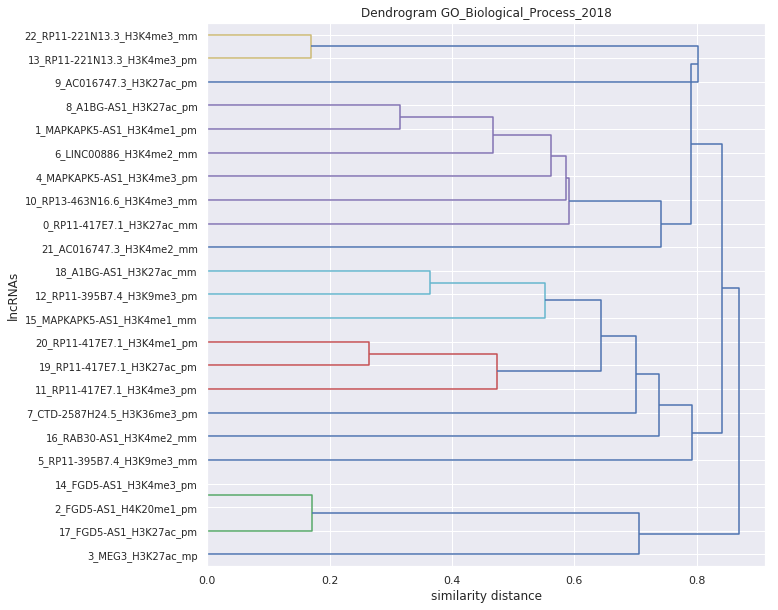

In [725]:
sns.set(color_codes=True)
rcParams['figure.figsize'] = 10,10
rcParams["patch.force_edgecolor"] = True

dendrogram = sch.dendrogram(linkage_matrix, orientation='right', 
                            leaf_label_func=lambda x: str(x) + "_" + points_names[x] if i < len(points_names) else "")
plt.title('Dendrogram GO_Biological_Process_2018')
plt.xlabel('similarity distance')
plt.ylabel('lncRNAs')
plt.show()

In [730]:
clusters = {}
for c in range(1, 16):
    cluster_rna_ids = [i for i, j in enumerate(sch.fcluster(linkage_matrix, t=15, criterion='maxclust')) if j == c]
    cluster_rna_names = [n for i, n in enumerate(points_names) if i in cluster_rna_ids]
    cluster_terms = []
    for i in cluster_rna_ids:
        cluster_terms.extend(points_terms[i])
    
    
    clusters[c] = (cluster_rna_ids, cluster_rna_names, cluster_terms)

In [743]:
for c in range(1, 16):
    try:
        output = subprocess.check_output("go_plot.py " + " ".join(clusters[c][2]) + " --r -o cluster_" + str(c) + ".png", shell=True, stderr=subprocess.STDOUT).decode()
    except subprocess.CalledProcessError as e:
        output = e.output.decode()

    from PIL import Image
    from PIL import ImageFont
    from PIL import ImageDraw
    import sys

    img = Image.open("cluster_" + str(c) + ".png")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf", 20, encoding="unic")
    draw.text((0, 0), "\n".join(clusters[c][1]), (0, 0, 0), font=font)
    img.save("cluster_" + str(c) + ".png")
    print("cluster " + str(c))

cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15


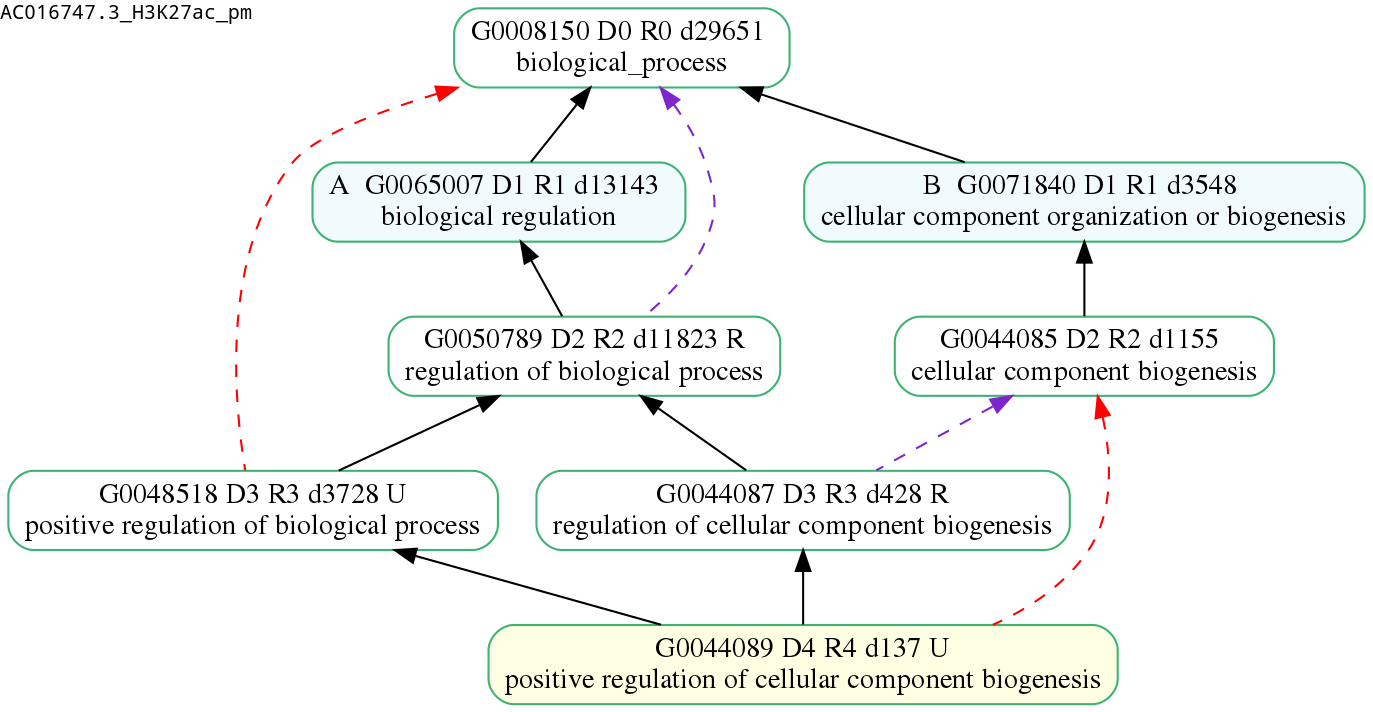

In [753]:
#Достать гены и смотреть на них
#Таблица с термами и их характеристикой(кол-во генов и еще что-нибудь)
#Пересекать, а не объединять списки генов
from IPython.display import Image
Image("cluster_15.png")

In [655]:
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2019-07-01) 47,413 GO Terms


In [658]:
obodag.get("GO:0048527").name

'lateral root development'